<!-- Google Fonts -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 10px; 
        font-size: 36px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        💰 Loan Approval ✅
    </h1>
</div>


# 📂 Overview

* **Background** <br>
  This dataset is part of the Kaggle Playground Series (Season 4, Episode 10). The data is synthetically generated using patterns and relationships from real-world tabular data. It simulates a binary classification problem with a relatively large number of features and no missing values, making it suitable for experimenting with feature selection, dimensionality reduction, and ensemble models.

The data is **clean**, with a balanced mix of categorical and numerical features, making it suitable for EDA, feature engineering, and testing various machine learning models.

* **Goal of the Project** <br>
  Build a machine learning model to **predict whether a loan will be approved** (`Loan_Status`: Y/N) based on applicant information.

**Key Features**

| Feature Name                 | Data Type | Category    | Description                                        |
| ---------------------------- | --------- | ----------- | -------------------------------------------------- |
| `id`                         | int64     | Identifier  | Unique identifier, not used for modeling           |
| `person_age`                 | int64     | Numerical   | Age of the loan applicant                          |
| `person_income`              | int64     | Numerical   | Applicant's income                                 |
| `person_home_ownership`      | object    | Categorical | Type of home ownership (RENT, OWN, MORTGAGE, etc.) |
| `person_emp_length`          | float64   | Numerical   | Length of employment (in years)                    |
| `loan_intent`                | object    | Categorical | Purpose of the loan (EDUCATION, MEDICAL, etc.)     |
| `loan_grade`                 | object    | Categorical | Credit grade (A, B, C, etc.)                       |
| `loan_amnt`                  | int64     | Numerical   | Loan amount                                        |
| `loan_int_rate`              | float64   | Numerical   | Loan interest rate (%)                             |
| `loan_percent_income`        | float64   | Numerical   | Loan amount as a percentage of income              |
| `cb_person_default_on_file`  | object    | Categorical | History of default (Y/N)                           |
| `cb_person_cred_hist_length` | int64     | Numerical   | Credit history length (in years)                   |
| `loan_status`                | int64     | Target      | Target variable (0 = rejected, 1 = approved)       |

**Files Provided**

* `train.csv`: The train dataset.
* `test.csv`: The test dataset (no target).
* `credit_risk_dataset.csv`: The original dataset.
* `sample_submission.csv`: Template file for submitting predictions.

(Source: [Kaggle Dataset s4e10](https://www.kaggle.com/competitions/playground-series-s4e10/data)) <br>
(Source: [Kaggle Dataset – Loan Approval Prediction](https://www.kaggle.com/datasets/chilledwanker/loan-approval-prediction))

**Project Objective**

The goal of this notebook is to **analyze loan applicant features and build a model to predict loan approval**.

Key components of the approach include:

* **Exploratory Data Analysis (EDA):**
  Understand the distribution of key features and how they relate to loan approval status.

* **Feature Engineering:**
  Handle missing values, encode categorical variables, and create derived features if needed (e.g., total income, income-to-loan ratio).

* **Modeling:**
  Train various models like **Logistic Regression**, **Random Forest**, **XGBoost**, and **MLPClassifier**,...

* **Evaluation Framework:**

  * Use **Cross-Validation** to deal with potential class imbalance.
  * Evaluate with metrics: **Accuracy**, **Precision**, **Recall**, **F1-score**, and **ROC-AUC**.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Import Libraries</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Import Libraries
    </h1>
</div>


In [2]:
# Core data manipulation libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# Statistical functions
from scipy.stats import skew

# Display utilities for Jupyter notebooks
from IPython.display import display

# Machine learning preprocessing and modeling
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Metrics
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix, precision_recall_curve, auc

# Statistical
from scipy.stats import chi2_contingency
from scipy.stats import shapiro, probplot
from scipy.stats import mannwhitneyu
from scipy.stats import levene
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import kruskal
from scipy.stats import anderson
from scipy.stats import normaltest
import scikit_posthocs as sp

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 500) # To display all the columns of dataframe
pd.set_option('max_colwidth', None) # To set the width of the column to maximum

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Load Data</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Load Data
    </h1>
</div>


In [ ]:
# Load the datasets
df_train = pd.read_csv("train.csv")
df_origin = pd.read_csv("credit_risk_dataset.csv")
df_test = pd.read_csv("test.csv")

# Verify shapes
print("Train Data Shape:", df_train.shape)
print("\nOrigin Data Shape:", df_origin.shape)
print("\nTest Data Shape:", df_test.shape)

Train Data Shape: (58645, 13)

Origin Data Shape: (32581, 12)

Test Data Shape: (39098, 12)


<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preview and Info</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Preview and Info
    </h1>
</div>


In [4]:
# Display few rows of each dataset
print("Train Data Preview:")
display(df_train.head())

print("\Origin Data Preview:")
display(df_origin.head())

print("\nTest Data Preview:")
display(df_test.head())

Train Data Preview:


id  person_age  person_income person_home_ownership  person_emp_length  \
0   0          37          35000                  RENT                0.0   
1   1          22          56000                   OWN                6.0   
2   2          29          28800                   OWN                8.0   
3   3          30          70000                  RENT               14.0   
4   4          22          60000                  RENT                2.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0   EDUCATION          B       6000          11.49                 0.17   
1     MEDICAL          C       4000          13.35                 0.07   
2    PERSONAL          A       6000           8.90                 0.21   
3     VENTURE          B      12000          11.11                 0.17   
4     MEDICAL          A       6000           6.92                 0.10   

  cb_person_default_on_file  cb_person_cred_hist_length  loan_status  
0                         N                          14            0  
1                         N                           2            0  
2                         N                          10            0  
3                         N                           5            0  
4                         N                           3            0

\Origin Data Preview:


person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  
1                 0.10                         N                           2  
2                 0.57                         N                           3  
3                 0.53                         N                           2  
4                 0.55                         Y                           4


Test Data Preview:


id  person_age  person_income person_home_ownership  person_emp_length  \
0  58645          23          69000                  RENT                3.0   
1  58646          26          96000              MORTGAGE                6.0   
2  58647          26          30000                  RENT                5.0   
3  58648          33          50000                  RENT                4.0   
4  58649          26         102000              MORTGAGE                8.0   

         loan_intent loan_grade  loan_amnt  loan_int_rate  \
0    HOMEIMPROVEMENT          F      25000          15.76   
1           PERSONAL          C      10000          12.68   
2            VENTURE          E       4000          17.19   
3  DEBTCONSOLIDATION          A       7000           8.90   
4    HOMEIMPROVEMENT          D      15000          16.32   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.36                         N                           2  
1                 0.10                         Y                           4  
2                 0.13                         Y                           2  
3                 0.14                         N                           7  
4                 0.15                         Y                           4

In [5]:
# Display information about the DataFrames
print("Train Data Info:")
df_train.info()

print("\Origin Data Info:")
df_origin.info()

print("\nTest Data Info:")
df_test.info()

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3),

## Insights from Initial Data Exploration

**Dataset Size and Structure**  
   - The **training dataset** contains 58645 samples with 13 columns, including the target variable `loan_status`.
   - The **original dataset** has 32581 samples and 12 columns, similar in structure but smaller in size. 
   - The **test dataset** includes 39098 samples with 12 columns (without the target), ready for prediction.

**Feature Overview**  
   - Both datasets include all important attributes:  
     - **Numerical features:** `person_age`, `person_income`, `person_emp_length`, `loan_amnt`, `loan_int_rate`, `loan_percent_income`, `cb_person_cred_hist_length`.
     - **Categorical features:** `person_home_ownership`, `loan_intent`, `loan_grade`, `cb_person_default_on_file`.
   - The target variable is categorical, representing loan status.

**Data Consistency and Completeness**  
   - The datasets have **no missing values**, which simplifies preprocessing and modeling.
   - Data types are appropriate: numerical features are float64 and int64, and categorical features are objects (strings).
   - The column `id` is not meaningful for analysis. So this column is not really a part of the information we should care about. We can drop this column for both train and test data.

**Differences Between Datasets**  
   - The training data has an additional `id` column, which uniquely identifies each sample.  
   - The original dataset excludes the `id` column but contains the same features and target.

In [6]:
df_train.drop("id", axis=1, inplace=True)
list_test_id = df_test["id"].copy().to_list()
df_test.drop("id", axis=1, inplace=True)

In [7]:
print("Train Data describe:")
cm = sns.light_palette("blue", as_cmap=True)
display(df_train.drop(columns="loan_status", axis=1).describe().T.style.background_gradient(cmap=cm))

print("\nOrigin Data describe:")
display(df_origin.drop(columns="loan_status", axis=1).describe().T.style.background_gradient(cmap=cm))

print("\nTest Data describe:")
display(df_test.describe().T.style.background_gradient(cmap=cm))

Train Data describe:



Origin Data describe:



Test Data describe:


## Descriptive Insights from Dataset Statistics

After excluding the `id` column, we examined the summary statistics of numerical features across the **train**, **original**, and **test** datasets. The statistics include count, mean, standard deviation, minimum, quartiles, and maximum values.

**Feature Distribution Consistency**

* Overall, the **train**, **original**, and **test** datasets show **highly consistent distributions** across all numerical features.
* This indicates that the synthetic data (train/test) was generated or sampled in a way that **preserves the statistical integrity** of the original dataset, minimizing any distributional shift or covariate mismatch.

**person_age**

* Mean values across all datasets lie around **27.5 years**, with a similar standard deviation (\~6.0).
* The age ranges from **20** (min) up to **123** in train, **144** in origin, and **94** in test — though extreme values (max) may be outliers or rare cases.
* The interquartile range (IQR) is consistently from **23 to 30 years**, showing stable population age profiles.

**person_income**

* Mean income is approximately **64,000–66,000** across datasets, with train/test slightly lower than origin.
* The **standard deviation** is significantly higher in the original data (**\~61,983**) than in the synthetic train/test (**\~37,900**), implying **greater income variability** in the real data.
* All datasets share a **lower bound** around **4,000–4,200** and upper bounds that reach **1.9 million** (train/test) and **6 million** (origin) — these high values might indicate income outliers.
* Percentiles are closely aligned (e.g., median \~55,000–58,000), suggesting strong central tendency consistency.

**person_emp_length**

* Average employment length hovers around **4.7–4.8 years** across all datasets.
* Standard deviations (\~4.0) and percentiles align closely.
* Max values are capped at **123 years** in all datasets, which could be a data artifact or placeholder.

**loan_amnt**

* Mean loan amount is slightly higher in the original dataset (**\~9,589**) than in train/test (**\~9,217–9,251**).
* The range (500–35,000), IQR (5,000–12,000), and std (\~5,600–6,300) are consistent, indicating stability across samples.
* These distributions imply that the majority of loans are relatively small to moderate in size.

**loan_int_rate**

* The **loan interest rate** averages between **10.66%–11.01%**, with very similar standard deviations across datasets.
* All datasets show a typical IQR from **\~7.9% to 13.5%**, reinforcing the homogeneity of loan terms.

**loan_percent_income**

* This feature shows **near-identical distributions** across all sets, with a mean of **\~0.16–0.17** and std of \~0.09–0.10.
* It reflects a realistic ratio between loan amount and income, where borrowers tend to request loans under 20% of their earnings.

**cb_person_cred_hist_length**

* Credit history lengths are centered around **5.8 years**, with matching standard deviations and percentiles across all datasets.
* The range remains stable (min: 2, max: 30), with an IQR from 3 to 8 years — reflecting a relatively short to medium credit history population.

**Summary**

* **Synthetic train/test data are well-aligned with the original dataset**, indicating that the data generation or sampling process successfully preserved core statistical properties.
* Minor deviations such as:

  * Lower variance in `person_income` in synthetic data,
  * Slightly higher `loan_int_rate` mean in original,

  ...are **acceptable and expected** in realistic settings.
* The datasets can be confidently used for training and evaluation **without significant risk of domain shift** or feature leakage.

In [8]:
print("Train Data describe:")
display(df_train.drop(columns="loan_status", axis=1).describe(include=["category", "object"]).T)

print("Origin Data describe:")
display(df_origin.drop(columns="loan_status", axis=1).describe(include=["category", "object"]).T)

print("Test Data describe:")
display(df_test.describe(include=["category", "object"]).T)

Train Data describe:


count unique        top   freq
person_home_ownership      58645      4       RENT  30594
loan_intent                58645      6  EDUCATION  12271
loan_grade                 58645      7          A  20984
cb_person_default_on_file  58645      2          N  49943

Origin Data describe:


count unique        top   freq
person_home_ownership      32581      4       RENT  16446
loan_intent                32581      6  EDUCATION   6453
loan_grade                 32581      7          A  10777
cb_person_default_on_file  32581      2          N  26836

Test Data describe:


count unique        top   freq
person_home_ownership      39098      4       RENT  20280
loan_intent                39098      6  EDUCATION   8076
loan_grade                 39098      7          A  14005
cb_person_default_on_file  39098      2          N  33227

## Insights on Categorical Features

**Consistency of Categories Across Datasets**

* The four categorical features — **`person_home_ownership`**, **`loan_intent`**, **`loan_grade`**, and **`cb_person_default_on_file`** — show **consistent unique category counts** across the **train**, **original**, and **test** datasets.
* This consistency helps ensure **model stability** during training and inference, with **no unseen categories** likely appearing in the test phase.

**person_home_ownership**

* This feature has **4 unique values**, consistently found across all datasets.
* The dominant category is `RENT`, accounting for:

  * **52.2%** in Train (30,594 / 58,645)
  * **50.5%** in Origin (16,446 / 32,581)
  * **51.8%** in Test (20,280 / 39,098)
* The distributions are quite stable, indicating a realistic synthetic data generation.

**loan_intent**

* Contains **6 unique categories**, such as `EDUCATION`, `MEDICAL`, etc.
* `EDUCATION` is the most frequent intent across all datasets:

  * **20.9%** in Train
  * **19.8%** in Origin
  * **20.7%** in Test
* The slight variation suggests good representativeness of the synthetic data.

**loan_grade**

* There are **7 unique grades** ranging from `A` to `G`, consistently across all datasets.
* Grade `A` appears as the top class:

  * **35.8%** in Train
  * **33.1%** in Origin
  * **35.8%** in Test
* Strong alignment indicates that class distribution is well preserved.


**cb_person_default_on_file**

* Binary feature with values `Y` and `N`.
* `N` dominates significantly:

  * **85.1%** in Train
  * **82.4%** in Origin
  * **85.1%** in Test
* Slight difference in original set may reflect natural data variation, but no structural shift.

**Conclusion**

* All **categorical features** show **excellent alignment** in both structure (number of categories) and **distribution** across synthetic training data, original data, and the test set.
* This alignment significantly reduces the risk of **data drift** and **unseen category issues** during prediction.
* The model can be confidently trained without additional encoding safeguards like `handle_unknown="ignore"` (though still good practice).

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Quality Checks</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Quality Checks
    </h1>
</div>


## Missing Value

In [9]:
def displayNULL(df, dataset_name=None):
    total_rows = len(df)

    missing_df = df.isnull().sum().reset_index()
    missing_df.columns = ["Feature", "Missing_Count"]
    missing_df = missing_df[missing_df["Missing_Count"] > 0]
    missing_df["Missing_%"] = (missing_df["Missing_Count"] / total_rows * 100).round(2)
    missing_df = missing_df.sort_values(by="Missing_Count", ascending=False).reset_index(drop=True)

    total_missing = missing_df["Missing_Count"].sum()

    print("=" * 40)
    if dataset_name:
        print(f"🔎 Missing Value Summary for: {dataset_name}")
    else:
        print("🔎 Missing Value Summary:")
    print("=" * 40)
    
    if total_missing == 0:
        print(f"✅ No missing values detected in {total_rows:,} rows.")
    else:
        try:
            from tabulate import tabulate
            print(tabulate(missing_df, headers="keys", tablefmt="pretty", showindex=False, colalign=("left", "left", "left")))
        except ImportError:
            print(missing_df.to_string(index=False))
        
        print(f"\n⚠️  Total missing values: {total_missing:,} out of {total_rows:,} rows.")


In [10]:
print("Missing value train dataset: ")
displayNULL(df_train, dataset_name="Train Set")

print("Missing value Origin dataset: ")
displayNULL(df_origin, dataset_name="Origin Set")

print("\nMissing value test dataset: ")
displayNULL(df_test, dataset_name="Test Set")

Missing value train dataset: 
🔎 Missing Value Summary for: Train Set
✅ No missing values detected in 58,645 rows.
Missing value Origin dataset: 
🔎 Missing Value Summary for: Origin Set
+-------------------+---------------+-----------+
| Feature           | Missing_Count | Missing_% |
+-------------------+---------------+-----------+
| loan_int_rate     | 3116          | 9.56      |
| person_emp_length | 895           | 2.75      |
+-------------------+---------------+-----------+

⚠️  Total missing values: 4,011 out of 32,581 rows.

Missing value test dataset: 
🔎 Missing Value Summary for: Test Set
✅ No missing values detected in 39,098 rows.


## Checking duplicate Value

In [11]:
def check_duplicates_report(df, dataset_name):
    duplicates_count = df.duplicated().sum()
    total_rows = len(df)
    
    print("=" * 40)
    print(f"🔍 {dataset_name} Duplicate Analysis")
    print("=" * 40)
    
    if duplicates_count == 0:
        print(f"✅ No duplicates found in {total_rows:,} rows")
    else:
        print(f"⚠️  {duplicates_count} duplicates found ({duplicates_count/total_rows:.2%})")
        print(f"    Total rows affected: {duplicates_count:,}/{total_rows:,}")

datasets = {
    "Training Data": df_train,
    "Origin Data":  df_origin,
    "Test Data": df_test
}

duplicate_summary = {}
for name, data in datasets.items():
    check_duplicates_report(data, name)
    duplicate_summary[name] = {
        "duplicates": data.duplicated().sum(),
        "total_rows": len(data)
    }
    print()

🔍 Training Data Duplicate Analysis
✅ No duplicates found in 58,645 rows

🔍 Origin Data Duplicate Analysis
⚠️  165 duplicates found (0.51%)
    Total rows affected: 165/32,581

🔍 Test Data Duplicate Analysis
✅ No duplicates found in 39,098 rows



## Checking Outlier Value

In [12]:
num_features = ["person_age", "person_income", "person_emp_length", "loan_amnt", "loan_int_rate",
                "loan_percent_income", "cb_person_cred_hist_length"]
cat_features = ["person_home_ownership", "loan_intent", "loan_grade", "cb_person_default_on_file"]

In [13]:
def checking_outlier(list_feature, df, dataset_name):
    print("=" * 40)
    print(f"🔍 {dataset_name} Checking outlier")
    print("=" * 40)
    outlier_info = []
    for feature in list_feature:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
        if len(outliers) == 0:
            pass
        else:
            outlier_info.append({
            "Feature": feature,
            "Outlier Count": len(outliers),
            # "Outlier Detail": outliers.tolist()
            })
    return pd.DataFrame(outlier_info)

checking_outlier(list_feature=num_features, df=df_train, dataset_name="Training data")

🔍 Training data Checking outlier


Feature  Outlier Count
0                  person_age           2446
1               person_income           2411
2           person_emp_length           1274
3                   loan_amnt           2045
4               loan_int_rate             34
5         loan_percent_income           1210
6  cb_person_cred_hist_length           1993

In [14]:
checking_outlier(list_feature=num_features, df=df_origin, dataset_name="Origin data")

🔍 Origin data Checking outlier


Feature  Outlier Count
0                  person_age           1494
1               person_income           1484
2           person_emp_length            853
3                   loan_amnt           1689
4               loan_int_rate              6
5         loan_percent_income            651
6  cb_person_cred_hist_length           1142

In [15]:
checking_outlier(list_feature=num_features, df=df_test, dataset_name="Test data")

🔍 Test data Checking outlier


Feature  Outlier Count
0                  person_age           1620
1               person_income           1540
2           person_emp_length            778
3                   loan_amnt           1388
4               loan_int_rate             11
5         loan_percent_income            811
6  cb_person_cred_hist_length           1436

#### Data Quality Insights: Missing Values, Duplicates and Outliers.

**Missing Values Analysis**

* We conducted a thorough examination for missing values across the **train**, **test**, and **original** datasets.

* **Training Data (58,645 rows)**:

  * **No missing values** were detected — ensuring clean synthetic data for model training.

* **Original Data (32,581 rows)**:

  * Missing values were found in **2 features**:

    * `loan_int_rate`: 3,116 missing (**9.56%**)
    * `person_emp_length`: 895 missing (**2.75%**)
  * Total: **4,011 missing values** (\~**12.31% of rows** affected)
  * These will need careful imputation or exclusion during model training/validation using this dataset.

* **Test Data (39,098 rows)**:

  * **No missing values** detected — ideal for unbiased model evaluation.

**Duplicate Records Analysis**

* We performed a check for exact duplicate rows that could artificially inflate performance or introduce bias.

* **Training Data**:

  * **0 duplicate rows** found in 58,645 records.

* **Original Data**:

  * **165 duplicates** detected (**0.51%** of 32,581 rows).
  * These may have originated from data entry errors or system duplication and should be **deduplicated** prior to model usage.

* **Test Data**:

  * **No duplicates** detected in 39,098 rows — ensuring test predictions are made on unique samples.

**Outlier Analysis**

* We also examined the datasets for checking outliers.
* **The outliers** were found in dataset at features. But we can not remove them since these outliers reflect reality.
* Both **train**, **origin** and **test** datasets contain **notable outliers** in `person_age`, `person_income`, `person_emp_length`, `loan_amnt`, `loan_int_rate`, `loan_percent_income`, `cb_person_cred_hist_length`.

**Conclusion**

* The **synthetic training** and **test datasets** exhibit excellent data quality with **no missing or duplicate entries**.
* The **original dataset** contains moderate **missing values** and minor **duplication**, which should be **addressed before inclusion** in training or validation.
* The outlier value exist across the **train**, **test**, and **original** datasets.
* Overall, data readiness is high and preprocessing complexity is minimal.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Exploratory Data Analysis</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Exploratory Data Analysis
    </h1>
</div>


**Statistical**

✅ Are the Assumptions of T-Test and ANOVA the Same?
Yes — T-Test and ANOVA share very similar assumptions, as both are parametric tests used to compare group means. However, there are slight differences due to their intended use.

✅ Common Assumptions for Both T-Test and ANOVA

| **Assumption**                 | **T-Test**                                        | **ANOVA**                             |
| ------------------------------ | ------------------------------------------------- | ------------------------------------- |
| **1. Dependent variable**      | Continuous                                        | Continuous                            |
| **2. Grouping variable**       | Categorical with **2 groups**                     | Categorical with **3 or more groups** |
| **3. Normality**               | Data in each group should be normally distributed | Same as T-Test                        |
| **4. Homogeneity of variance** | Equal variances across groups (`equal_var=True`)  | Same as T-Test                        |
| **5. Independence**            | Observations must be independent                  | Same as T-Test                        |

🔄 Key Differences Between T-Test and ANOVA

| **Criterion**           | **T-Test**                   | **ANOVA**                                       |
| ----------------------- | ---------------------------- | ----------------------------------------------- |
| Number of groups        | Compares **2 groups**        | Compares **3 or more groups**                   |
| Post-hoc tests required | Not required                 | Required if significant (e.g., **Tukey’s HSD**) |
| Types of tests          | Independent or Paired T-Test | One-Way or Repeated Measures ANOVA              |

📌 Alternatives When Assumptions Are Violated

| **Violation**           | **T-Test Alternative**  | **ANOVA Alternative**   |
| ----------------------- | ----------------------- | ----------------------- |
| Non-normal distribution | **Mann–Whitney U Test** | **Kruskal–Wallis Test** |
| Unequal variances       | **Welch’s T-Test**      | **Welch’s ANOVA**       |

In [16]:
def color(n_colors=2):
    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
    positions = np.linspace(0, 1, n_colors)
    colors = [cmap(p) for p in positions]
    return colors

In [17]:
def cal_ChiSquare(cat_feature, target_feature, df, show_expected=False, show_residuals=False):
    """
    Perform a Chi-Square test of independence to evaluate whether two categorical variables 
    are statistically associated (i.e., dependent) or independent from each other.

    This function tests the null hypothesis that the two categorical variables are independent.
    It prints the test statistic, degrees of freedom, p-value, and an interpretation based on the p-value.
    Optionally, it displays the expected frequency table under independence, and standardized residuals 
    (including a heatmap) which help to identify specific group-level deviations.

    Parameters
    ----------
    cat_feature : str
        Name of the first categorical variable (typically the feature).
    
    target_feature : str
        Name of the second categorical variable (typically the target label).
    
    df : pd.DataFrame
        The input DataFrame containing the data.
    
    show_expected : bool, default=False
        If True, prints the expected frequencies under the assumption of independence.
    
    show_residuals : bool, default=False
        If True, prints the standardized residuals and shows them as a heatmap 
        to identify where the strongest associations/deviations occur.

    Returns
    -------
    None
        Prints the Chi-Square test result, including statistical significance interpretation.
        Optionally prints expected values and standardized residuals.

    Notes
    -----
    - Hypotheses:
        H₀ (Null):     The two variables are independent (no association).
        H₁ (Alt.):      There is a dependency or association between the variables.
    
    - Interpretation:
        If p-value < 0.05 → Reject H₀ → Conclude that the variables are significantly associated.
        If p-value ≥ 0.05 → Fail to reject H₀ → No statistically significant association found.

    - Standardized residuals:
        - Values > +2 or < -2 indicate strong deviation from expected frequency (local dependency).
        - Useful for identifying specific group-level contributions to the overall Chi-Square result.

    References
    ----------
    - https://en.wikipedia.org/wiki/Chi-squared_test
    - https://www.scribbr.com/statistics/chi-square-test-of-independence/
    """
    print(f"\n🔍 Chi-Square Test of Independence: '{cat_feature}' vs. '{target_feature}'")

    # Contingency table
    crosstab = pd.crosstab(df[cat_feature], df[target_feature])
    chi2, p, dof, expected = chi2_contingency(crosstab)

    print(f"Chi-squared statistic: {chi2:.3f}")
    print(f"Degrees of freedom: {dof}")
    print(f"p-value: {p:.6f}")

    if p < 0.05:
        print("✅ Result: p-value < 0.05 → Reject H₀")
        print(f"→ There is a **statistically significant association** between '{cat_feature}' and '{target_feature}'.")
    else:
        print("❎ Result: p-value ≥ 0.05 → Fail to reject H₀")
        print(f"→ No statistically significant association between '{cat_feature}' and '{target_feature}'.")

    # Optional: show expected frequencies
    if show_expected:
        print("\n📊 Expected Frequencies:")
        print(pd.DataFrame(expected, index=crosstab.index, columns=crosstab.columns))
    else:
        pass

    # Optional: show standardized residuals
    if show_residuals:
        cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
        residuals = (crosstab - expected) / np.sqrt(expected)
        print("\nStandardized Residuals:")
        print(round(residuals, 2))

        # Heatmap of residuals
        plt.figure(figsize=(6, 4))
        sns.heatmap(residuals, annot=True, cmap=cmap, center=0, fmt=".2f", linewidths=0.5)
        plt.title(f"Standardized Residuals Heatmap: {cat_feature} vs {target_feature}")
        plt.ylabel(cat_feature)
        plt.xlabel(target_feature)
        plt.tight_layout()
        plt.show()
    else:
        pass

def cal_shapiro(cat_feature, num_feature, df, plot_result=False):
    """
    Perform the Shapiro–Wilk test to assess normality of a numerical feature 
    within each group defined by a categorical feature.

    This function iterates through all unique, non-null values of a categorical variable,
    and applies the Shapiro–Wilk test to the corresponding subgroup of the numeric variable.
    Optionally, it displays a Q-Q plot to visually assess the distribution.

    Parameters
    ----------
    cat_feature : str
        The name of the categorical column that defines the groups.

    num_feature : str
        The name of the numerical column to test for normality.

    df : pd.DataFrame
        The input DataFrame containing the data.

    plot_result : bool, optional (default=False)
        If True, displays a Q-Q plot for each group to visually assess normality.

    Returns
    -------
    None
        Prints the Shapiro–Wilk test statistic and p-value for each group,
        and optionally shows a Q-Q plot.

    Notes
    -----
    - H₀ (null hypothesis): The data is normally distributed.
    - H₁ (alternative): The data is not normally distributed.
    - If p > 0.05 → fail to reject H₀ → data appears normal.
    - If p ≤ 0.05 → reject H₀ → data likely not normal.
    - The test is not reliable for n > 5000 (as per scipy recommendation).
    - Requires at least 3 non-null values per group.

    References
    ----------
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html
    - https://www.statskingdom.com/shapiro-wilk-test.html
    """

    print(f"🔎 Shapiro-Wilk Normality Test for {num_feature} across {cat_feature} groups")

    for group in df[cat_feature].dropna().unique():
        data = df[df[cat_feature] == group][num_feature].dropna()
        n = len(data)

        if n < 3:
            print(f"⚠️ Group {group} has too few values ({n}) to perform Shapiro-Wilk test.")
        elif n > 5000:
            print(f"⚠️ Group {group} has {n} samples. Shapiro-Wilk may not be reliable for n > 5000.")
        else:
            stat, p = shapiro(data)
            print(f"Group: {group}")
            print(f"  Shapiro-Wilk statistic: {stat:.3f}")
            print(f"  p-value: {p}")
            if p > 0.05:
                print(f" 🟢 Group '{group}' appears to follow a normal distribution.\n")
            else:
                print(f" ⚪ Group '{group}' does not appear to follow a normal distribution.\n")

            if plot_result:
                probplot(data, dist="norm", plot=plt)
                plt.title(f"QQ Plot - {group}")
                plt.show()
            else:
                pass

def cal_levene(dataframe, categorical_feature, num_feature, center="mean"):
    """
    Perform Levene’s test to assess the equality (homogeneity) of variances 
    for a numeric feature across two or more groups defined by a categorical feature.

    Levene's test is used to verify the assumption of equal variances 
    (homoscedasticity), which is important for parametric tests such as the 
    independent t-test and ANOVA.

    Parameters
    ----------
    dataframe : pd.DataFrame
        The input DataFrame containing the features to test.

    categorical_feature : str
        The name of the categorical column that defines the grouping.

    num_feature : str
        The name of the numerical column whose variance is being compared across groups.

    center : str, optional (default="mean")
        Specifies the measure of central tendency to use when calculating deviations:
        - "mean": classic Levene's test (sensitive to non-normal data)
        - "median": more robust to non-normal distributions (Brown–Forsythe test)

    Returns
    -------
    None
        Prints the Levene test statistic, p-value, and an interpretation of whether 
        the variances are equal or significantly different.

    Notes
    -----
    - H₀ (Null Hypothesis): All groups have equal variances.
    - H₁ (Alternative Hypothesis): At least one group has different variance.
    - If p > 0.05 → Fail to reject H₀ → Variances are approximately equal.
    - If p ≤ 0.05 → Reject H₀ → Variances are significantly different (heteroscedasticity).

    References
    ----------
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html
    - https://www.geeksforgeeks.org/levenes-test-in-python/
    """

    print(f"🔍 Levene’s test: {num_feature} ~ {categorical_feature}")
    # Extract unique group labels
    groups = dataframe[categorical_feature].unique()    
    # Create a list of values for each group
    data_groups = [dataframe[dataframe[categorical_feature] == g][num_feature] for g in groups]    
    # Perform Levene’s test
    stat, p = levene(*data_groups, center=center)
    
    print(f"Levene statistic: {stat:.3f}")
    print(f"p-value: {p}")
    if p > 0.05:
        print("🟢 Variances are approximately equal across groups.")
    else:
        print("⚪ Variances are significantly different across groups.")

def cal_mannwhitneyu(dataframe, categorical_feature, num_feature):
    """
    Perform the Mann–Whitney U test (Wilcoxon rank-sum test) to assess whether there 
    is a statistically significant difference in the distribution of a numerical feature 
    between two independent groups defined by a binary categorical feature.

    The function also compares medians, calculates the effect size (r), provides interpretation,

    Parameters
    ----------
    dataframe : pd.DataFrame
        The input DataFrame containing the data.

    categorical_feature : str
        Column name of the categorical feature (must contain exactly 2 unique values).

    num_feature : str
        Column name of the numerical feature to compare.

    Returns
    -------
    None
        Prints the U statistic, p-value, medians, Z-score, effect size r, and interpretation.

    Notes
    -----
    - H₀ (Null Hypothesis): The two groups have the same distribution.
    - H₁ (Alternative Hypothesis): The distributions are different.
    - If p ≤ 0.05 → reject H₀ → significant difference.
    - Effect size r helps interpret how strong the difference is:
        * Small ~0.1, Medium ~0.3, Large ≥0.5
    """

    groups = dataframe[categorical_feature].dropna().unique()

    if len(groups) != 2:
        print(f"❌ Error: Mann-Whitney U test requires exactly 2 groups, but found {len(groups)}.")
        return

    print(f"🔍 Mann–Whitney U Test for '{num_feature}' by '{categorical_feature}'\n")
    print("H₀: The distributions of the two groups are equal.")
    print("H₁: The distributions are different.\n")

    group1 = dataframe[dataframe[categorical_feature] == groups[0]][num_feature].dropna()
    group2 = dataframe[dataframe[categorical_feature] == groups[1]][num_feature].dropna()

    stat, p = mannwhitneyu(group1, group2, alternative="two-sided")

    print(f"U statistic : {stat}")
    print(f"p-value     : {p}")

    # Interpretation
    if p <= 0.05:
        print("\n✅ Result: Statistically significant difference between the two groups (Reject H₀).")
        median1 = group1.median()
        median2 = group2.median()
        if median1 > median2:
            print(f" Interpretation: Group '{groups[0]}' has a higher median '{num_feature}' than Group '{groups[1]}'.")
        elif median1 < median2:
            print(f" Interpretation: Group '{groups[1]}' has a higher median '{num_feature}' than Group '{groups[0]}'.")
        else:
            print(" Interpretation: The medians are equal, but distributions may still differ.")
    else:
        print("\n⚪ Result: No statistically significant difference between the two groups (Fail to reject H₀).")


def t_test_with_cohens_d(data, categorical_feature, num_feature, equal_var = False):
    """
    Perform an Independent Two-Sample T-Test and compute Cohen's d to evaluate 
    the difference between two independent groups on a numeric variable.

    This function tests whether the means of two independent groups are statistically different,
    and also calculates the magnitude of the difference (effect size) using Cohen's d.

    Parameters
    ----------
    data : pd.DataFrame
        The input DataFrame containing the categorical and numerical features.

    categorical_feature : str
        The name of the categorical column used to define the two groups (must have exactly 2 unique values).

    num_feature : str
        The name of the numerical feature to compare between the two groups.

    equal_var : bool, optional (default=False)
        Assumes equal population variance if True (Student’s t-test). If False (default), performs Welch’s t-test.

    Returns
    -------
    None
        Prints the t-statistic, p-value, Cohen’s d, and interpretation of the effect size.

    Notes
    -----
    - H₀ (null hypothesis): The two groups have equal means.
    - H₁ (alternative): The means are significantly different.
    - Cohen's d interpretation:
        - 0.2  → small effect
        - 0.5  → medium effect
        - 0.8+ → large effect
    - Welch’s t-test is recommended when group variances are unequal (default setting).

    References
    ----------
    - https://www.scribbr.com/statistics/t-test/
    - https://en.wikipedia.org/wiki/Cohen%27s_d
    """

    # Extract unique groups
    groups = data[categorical_feature].dropna().unique()

    if len(groups) > 2:
        print(f"❌ Error: Independent T-Test requires 2 groups.")
        return
    else:
        print(f"🔍 Independent T-Test: {num_feature} ~ {categorical_feature}")
        # Extract values
        x1 = data[data[categorical_feature] == groups[0]][num_feature].dropna()
        x2 = data[data[categorical_feature] == groups[1]][num_feature].dropna()

        # T-test (independent)
        t_stat, p_value = ttest_ind(x1, x2, equal_var=equal_var)  # Welch’s t-test if variances may differ

        # Calculate Cohen’s d
        nx1, nx2 = len(x1), len(x2)
        pooled_std = np.sqrt(((nx1 - 1)*np.var(x1, ddof=1) + (nx2 - 1)*np.var(x2, ddof=1)) / (nx1 + nx2 - 2))
        cohens_d = (np.mean(x1) - np.mean(x2)) / pooled_std

        # Output
        print(f"\n🔍 T-Test between group'{groups[0]}' and group '{groups[1]}':")
        print(f"t-statistic: {t_stat:.3f}")
        print(f"p-value: {p_value:.6f}")

        if p_value < 0.05:
            print("\n✅ Significant difference found (p < 0.05)")
            print(f"\n📏 Cohen's d: {cohens_d:.3f}")            
            # Interpretation of Cohen's d
            if abs(cohens_d) < 0.2:
                size = "small"
            elif abs(cohens_d) < 0.5:
                size = "medium"
            else:
                size = "large"
            print(f"🧠 Effect size interpretation: {size} effect")
        else:
            print("\nℹ️ No significant difference found (p >= 0.05)")

def perform_anova_with_tukey(df, numeric_feature, categorical_feature, typ=2):
    """
    Perform a One-Way ANOVA test to determine whether there are statistically 
    significant differences between the means of three or more independent groups. 

    If the ANOVA test is significant (p < 0.05), Tukey's HSD post-hoc test is performed
    to identify which specific pairs of groups differ from each other.

    Parameters
    ----------
    df : pd.DataFrame
        The input dataset containing the numeric and categorical features.

    numeric_feature : str
        The name of the numerical (continuous) response variable.

    categorical_feature : str
        The name of the categorical (independent) variable used to group the data.

    typ : int, optional (default=2)
        The type of sum of squares to use in the ANOVA test:
        - Type I (1): Sequential.
        - Type II (2): Default and commonly used for balanced designs.
        - Type III (3): Use when model includes interaction terms or unbalanced data.

    Returns
    -------
    None
        Prints the ANOVA table, p-value, interpretation, and (if significant) the Tukey HSD test summary.

    Notes
    -----
    - H₀ (null hypothesis): All group means are equal.
    - H₁ (alternative hypothesis): At least one group mean is different.
    - If p < 0.05 → reject H₀ → perform Tukey’s HSD to find which groups differ.
    - Assumptions:
        1. Independence of observations
        2. Normally distributed groups (Shapiro or Anderson test can check this)
        3. Homogeneity of variances (Levene's test)

    References
    ----------
    - https://www.scribbr.com/statistics/one-way-anova/
    - https://en.wikipedia.org/wiki/Analysis_of_variance
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.tukey_hsd.html
    """

    # Extract unique groups
    groups = df[categorical_feature].dropna().unique()
    
    if len(groups) < 3:
        print(f"❌ Error: ANOVA requires 3 or more groups.")
        return
    else:
        print(f"\n🔍 ANOVA Test: {numeric_feature} ~ {categorical_feature} (Type {typ})")

        # Fit OLS model
        model = ols(f"{numeric_feature} ~ C({categorical_feature})", data=df).fit()

        # Perform ANOVA
        anova_table = anova_lm(model, typ=typ)
        print("\n📊 ANOVA Table:")
        print(anova_table)

        # Extract p-value
        p_value = anova_table["PR(>F)"].iloc[0]

        if p_value < 0.05:
            print("\n✅ Significant difference found (p < 0.05)")
            print("➡️ Performing Tukey's HSD post-hoc test:")

            tukey = pairwise_tukeyhsd(df[numeric_feature], df[categorical_feature])
            print(tukey.summary())
        else:
            print("\nℹ️ No significant difference found (p >= 0.05)")

def perform_kruskal_test(df, categorical_feature, numeric_feature):
    """
    Perform the Kruskal-Wallis H-test to determine whether there are statistically 
    significant differences in the distribution of a numeric variable across 
    three or more independent groups.

    If the result is significant (p < 0.05), Dunn's post-hoc test with Bonferroni correction 
    is performed to identify which group pairs differ.

    Parameters
    ----------
    df : pd.DataFrame
        The input dataset containing the categorical and numerical variables.

    categorical_feature : str
        The name of the categorical feature that defines the groups.

    numeric_feature : str
        The name of the numeric feature to be compared across groups.

    Returns
    -------
    None
        Prints the Kruskal-Wallis H-statistic, p-value, interpretation, and 
        optionally the results of Dunn's post-hoc test.

    Notes
    -----
    - H₀ (null hypothesis): The distribution of the numeric variable is the same across all groups.
    - H₁ (alternative hypothesis): At least one group has a different distribution.
    - If p < 0.05 → reject H₀ → use Dunn’s test to explore specific group differences.
    - Kruskal-Wallis is a non-parametric alternative to one-way ANOVA.
    - It does not assume normality, but assumes:
        1. Independent samples
        2. Ordinal or continuous response variable
        3. Similar shapes of distributions

    Requirements
    ------------
    - `scipy.stats.kruskal`
    - `scikit-posthocs` package for Dunn’s test (`import scikit_posthocs as sp`)

    References
    ----------
    - https://www.geeksforgeeks.org/kruskal-wallis-test/
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html
    - https://scikit-posthocs.readthedocs.io/en/latest/index.html
    """

    # Extract values
    groups = df[categorical_feature].dropna().unique()
    if len(groups) < 3:
        print(f"❌ Error: Kruskal-Wallis H-test requires 3 or more groups.")
        return
    else:
        print(f"\n🔍 Kruskal-Wallis Test: {numeric_feature} ~ {categorical_feature}")
        data_groups = [df[df[categorical_feature] == g][numeric_feature].dropna() for g in groups]

        # Perform kruskal
        stat, p = kruskal(*data_groups)

        print(f"Kruskal-Wallis H-statistic: {stat:.3f}")
        print(f"p-value: {p}")
        
        if p < 0.05:
            print("🟢 Significant difference found. Running Dunn's Post-Hoc Test...")
            dunn_result = sp.posthoc_dunn(df, val_col=numeric_feature, group_col=categorical_feature, p_adjust="bonferroni")
            print(dunn_result)
        else:
            print("\nℹ️ No significant difference found (p >= 0.05)")

def cal_Anderson(df, numerical_col, group_col):
    """
    Perform the Anderson–Darling test to assess whether the data within each group 
    follows a normal distribution.

    This function applies the Anderson-Darling normality test for each subgroup 
    defined by a categorical column, and optionally plots KDE distributions.

    Parameters
    ----------
    df : pd.DataFrame
        The input dataset.

    numerical_col : str
        The name of the numeric column to test for normality.

    group_col : str
        The name of the categorical column defining the groups to be tested separately.

    Returns
    -------
    None
        Prints the Anderson–Darling test statistic, critical values, and interpretation
        for each group. Optionally displays a KDE plot for visual comparison.

    Notes
    -----
    - H₀ (null hypothesis): The data follows a normal distribution.
    - If test statistic > critical value → ❌ Reject H₀ → Data is not normally distributed.
    - If test statistic ≤ critical value → ✅ Fail to reject H₀ → Data may be normal.
    - The test is more sensitive to deviations in the tails of the distribution than other tests like Shapiro-Wilk.

    Limitations
    ----------
    - Not recommended for very small sample sizes (< 8).
    - Not reliable for very large sample sizes where even small deviations may be flagged.

    References
    ----------
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html
    - https://www.itl.nist.gov/div898/handbook/eda/section3/eda35e.htm
    - https://en.wikipedia.org/wiki/Anderson–Darling_test
    """

    groups = df[group_col].dropna().unique()
    
    print(f"📊 Checking normality of '{numerical_col}' across groups of '{group_col}' using Anderson-Darling Test:\n")
    print("ℹ️  H₀: The data follows a normal distribution.")
    print("ℹ️  If test statistic > critical value → ❌ Reject H₀ → Not normally distributed.\n")

    for group in groups:
        data = df[df[group_col] == group][numerical_col].dropna()
        result = anderson(data, dist="norm")
        
        print(f"Group = {group}")
        print(f"  - Sample size: {len(data)}")
        print(f"  - Test statistic: {result.statistic:.4f}")
        
        for sl, cv in zip(result.significance_level, result.critical_values):
            verdict = "❌ Reject H₀ → Not normal" if result.statistic > cv else "✅ Fail to reject H₀ → Possibly normal"
            print(f"    - α = {sl}% | CV = {cv:.4f} → {verdict}")
        print()


def cal_normaltest(cat_feature, num_feature, df):
    """
    Perform D’Agostino and Pearson’s normality test on a numerical feature 
    across groups defined by a categorical feature.

    Parameters
    ----------
    cat_feature : str
        The name of the categorical column that defines the groups.

    num_feature : str
        The name of the numerical column to test for normality.

    df : pd.DataFrame
        The input DataFrame containing the data.

    Returns
    -------
    None
        Prints the test statistic and p-value for each group.

    Notes
    -----
    - H₀ (null hypothesis): The data is normally distributed.
    - H₁ (alternative): The data is not normally distributed.
    - If p > 0.05 → fail to reject H₀ → data appears normal.
    - If p ≤ 0.05 → reject H₀ → data likely not normal.
    - Recommended for n ≥ 20, especially reliable for n > 50.
    - Requires at least 8 non-null values per group (as per scipy recommendation).
    """
    
    print(f"🔎 D’Agostino and Pearson Normality Test for '{num_feature}' across '{cat_feature}' groups\n")

    for group in df[cat_feature].dropna().unique():
        data = df[df[cat_feature] == group][num_feature].dropna()
        n = len(data)

        print(f" Group: {group} (n = {n})")
        
        if n < 8:
            print(f"⚠️ Too few observations (< 8) to perform the test.\n")
            continue

        stat, p = normaltest(data)

        print(f"  Statistic : {stat:.3f}")
        print(f"  p-value   : {p:.5f}")
        
        if p > 0.05:
            print(f"  🟢 Interpretation: Data appears to follow a normal distribution.\n")
        else:
            print(f"  🔴 Interpretation: Data does not appear to follow a normal distribution.\n")

##  Loan Status Distribution

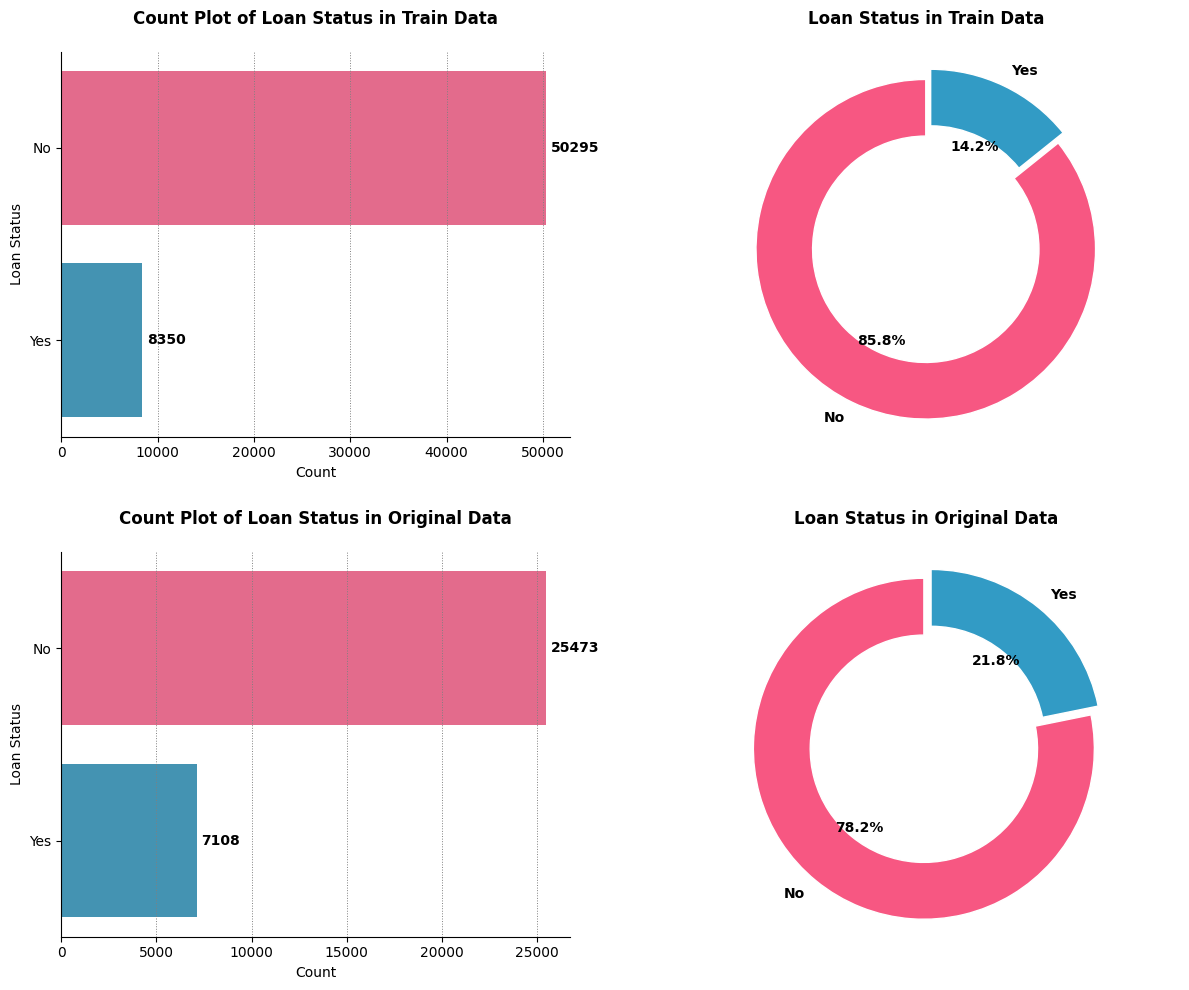

In [18]:
# Set target variable
target_variable = "loan_status"

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
datasets = [("Train Data", df_train), ("Original Data", df_origin)]

for i, (title, data) in enumerate(datasets):
    ax = axes[i, 0]
    sns.countplot(y=target_variable, data=data, ax=ax, palette=color(n_colors=2))
    ax.set_title(f"Count Plot of Loan Status in {title}", pad=20, weight="bold")
    ax.set_ylabel("Loan Status")
    ax.set_xlabel("Count")
    ax.set_yticks([0, 1], ["No", "Yes"])
    ax.grid(axis="x", color="gray", linestyle=":", linewidth=0.7)

    sns.despine(ax=ax, top=True, right=True, left=False, bottom=False)

    for p in ax.patches:
        width = p.get_width()
        y = p.get_y() + p.get_height() / 2
        ax.text(width + max(data[target_variable].value_counts())*0.01, y,
                f"{int(width)}", 
                ha="left", va="center", fontsize=10, fontweight="bold", color="black")

    loan_counts = data[target_variable].value_counts().sort_index()
    wedges, texts, autotexts = axes[i, 1].pie(
        loan_counts,
        labels=["No", "Yes"],
        autopct="%1.1f%%",
        startangle=90,
        colors=color(n_colors=2),
        wedgeprops=dict(width=0.4, edgecolor="w"),
        radius=1.2,
        explode = (0, 0.08)
    )
    
    for text in texts + autotexts:
        text.set_fontsize(10)
        text.set_fontweight("bold")
    
    centre_circle = plt.Circle((0, 0), 0.70, fc="white")
    axes[i, 1].add_artist(centre_circle)
    axes[i, 1].set_title(f"Loan Status in {title}", pad=20, weight="bold")
    axes[i, 1].axis("equal") 

plt.tight_layout()
plt.subplots_adjust(hspace=0.3, wspace=0.2)
plt.show()

### **Distribution Analysis of Loan Status**

**1. Overview of Class Distribution**

The two sets of visualizations provide an in-depth comparison of `loan_status` distribution in both the **Training Data** and **Original Data**. Each includes:

* A **count plot** (absolute values)
* A **donut chart** (percentage proportions)

**A. Training Data**

* `No` (Loan Not Approved): **50,295 instances**
* `Yes` (Loan Approved): **8,350 instances**

**Percentage Distribution**

* `No`: **85.8%**
* `Yes`: **14.2%**

> **Insight**:
> The training dataset is **highly imbalanced**, with the "No" class dominating significantly. Only \~1 in 7 instances belong to the "Yes" class.

**B. Original Data**

**Count Statistics**

* `No`: **25,473 instances**
* `Yes`: **7,108 instances**

**Percentage Distribution**

* `No`: **78.2%**
* `Yes`: **21.8%**

> **Insight**:
> The original dataset still shows class imbalance, but the gap is **less severe** compared to the training data. About 1 in 5 loans are approved (`Yes`), which is a more moderate imbalance.

**3. Key Observations & Implications**

| Aspect                   | Training Data | Original Data | Observation                                            |
| ------------------------ | ------------- | ------------- | ------------------------------------------------------ |
| Majority Class           | `No` (85.8%)  | `No` (78.2%)  | Both datasets are skewed toward the “No” class         |
| Minority Class           | `Yes` (14.2%) | `Yes` (21.8%) | More severely underrepresented in the training data    |
| Class Imbalance Severity | **High**      | **High**  | Indicates potential bias during model training         |
| Risk of Bias             |  Yes         |  Yes     | Models may overpredict the "No" class unless addressed |

**Conclusion**

The data reveals a clear imbalance in `loan_status`, particularly in the training set. This imbalance can **skew model learning** and produce misleadingly high accuracy while failing to detect true positives (`Yes`). Addressing this imbalance through appropriate techniques is **crucial for building fair and effective models**.

## Numerical Feature Distributions

In [19]:
num_features

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

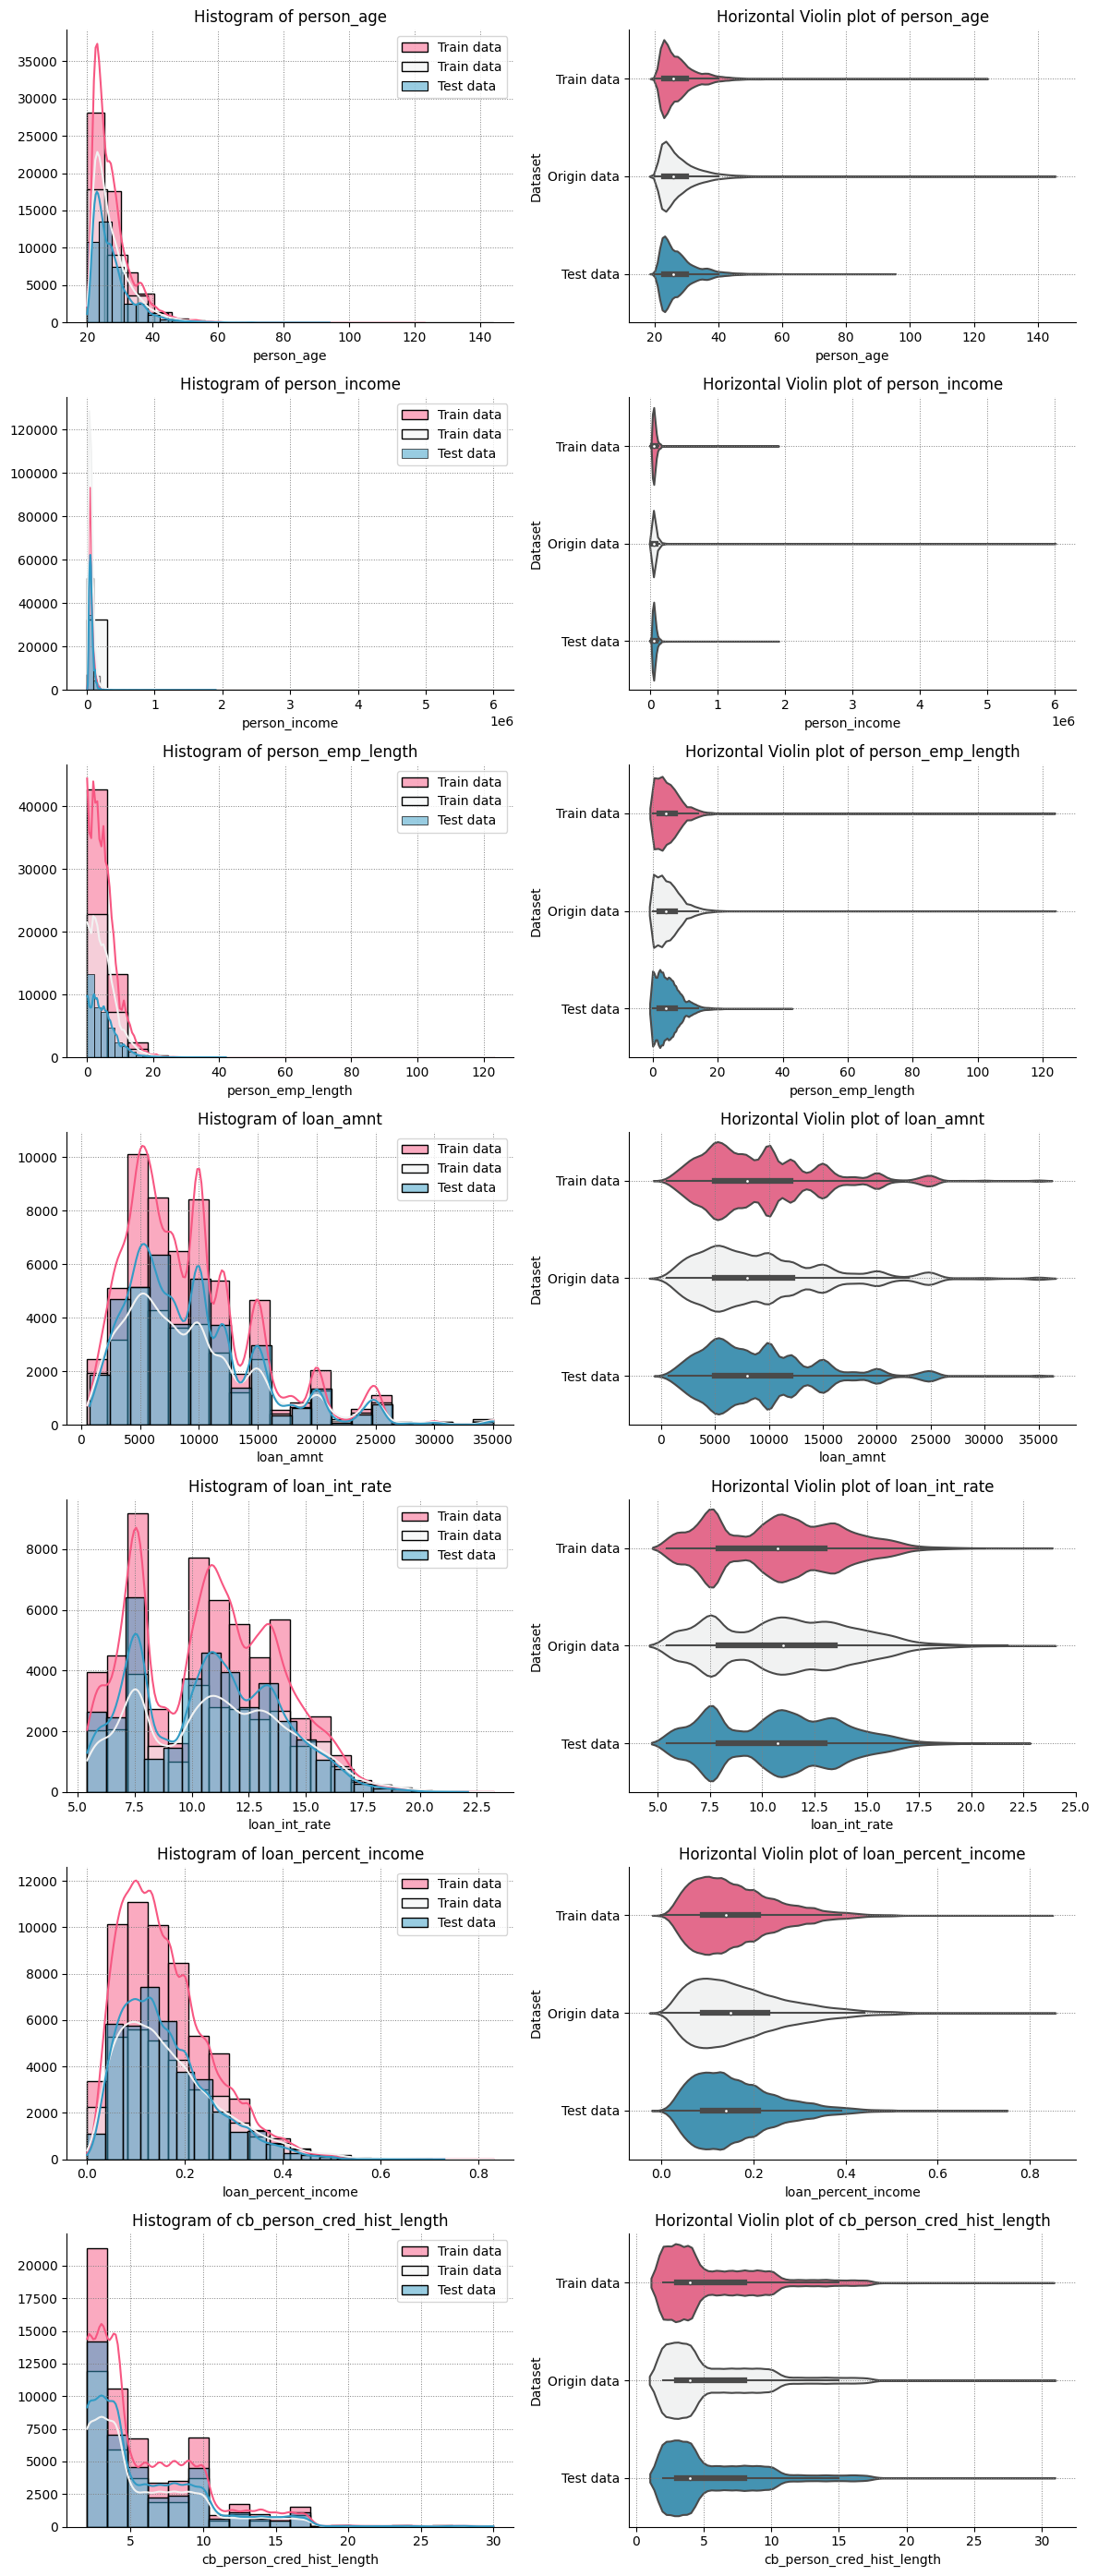

In [20]:
def plot_numerical_features(df_train, df_test, df_origin, num_features):
    colors = color(n_colors=3)
    n = len(num_features)

    fig, axes = plt.subplots(n, 2, figsize=(12, n * 4))
    axes = np.array(axes).reshape(n, 2)

    for i, feature in enumerate(num_features):
        sns.histplot(data=df_train[feature], color=colors[0], bins=20, kde=True, ax=axes[i, 0], label="Train data")
        sns.histplot(data=df_origin[feature], color=colors[1], bins=20, kde=True, ax=axes[i, 0], label="Train data")
        sns.histplot(data=df_test[feature], color=colors[2], bins=20, kde=True, ax=axes[i, 0], label="Test data")
        axes[i, 0].set_title(f"Histogram of {feature}")
        axes[i, 0].legend()
        # axes[i, 0].set_facecolor("lightgray")
        axes[i, 0].set_ylabel("")
        axes[i, 0].grid(color="gray", linestyle=":", linewidth=0.7)
        # axes[i, 0].axvline(df_train[feature].median(), color="green", linestyle="--", label="Median Train")
        # axes[i, 0].axvline(df_origin[feature].median(), color="red", linestyle="--", label="Median Origin")
        # axes[i, 0].axvline(df_test[feature].median(), color="orange", linestyle="--", label="Median Test")
        sns.despine(left=False, bottom=False, ax=axes[i, 0])

        df_plot = pd.concat([
            pd.DataFrame({"Dataset": "Train data", feature: df_train[feature]}),
            pd.DataFrame({"Dataset": "Origin data", feature: df_origin[feature]}),
            pd.DataFrame({"Dataset": "Test data", feature: df_test[feature]})
        ]).reset_index(drop=True)

        sns.violinplot(
            data=df_plot,
            x=feature,
            y="Dataset",
            palette=colors,
            orient="h",
            ax=axes[i, 1]
        )
        axes[i, 1].set_title(f"Horizontal Violin plot of {feature}")
        # axes[i, 1].set_facecolor("lightgray")
        axes[i, 1].grid(color="gray", linestyle=":", linewidth=0.7)
        sns.despine(left=False, bottom=False, ax=axes[i, 1])

    plt.tight_layout()
    plt.show()

plot_numerical_features(df_train = df_train, df_test = df_test, df_origin = df_origin, num_features=num_features)

In [21]:
def check_skewness(data, dataset_name, numerical_features = num_features, highlight=True, sort=True):
    skewness_dict = {}
    skew_feature = []
    for feature in numerical_features:
        skew = data[feature].skew(skipna=True)
        skewness_dict[feature] = skew

    skew_df = pd.DataFrame.from_dict(skewness_dict, orient="index", columns=["Skewness"])
    if sort:
        skew_df = skew_df.reindex(skew_df["Skewness"].abs().sort_values(ascending=False).index)
    else:
        pass
    
    print(f"\n🔍 Skewness for {dataset_name}:")
    print("-"*70)
    print(f"{'Feature':<30} | {'Skewness':<9} | {'Remark'}")
    print("-"*70)
    for feature, row in skew_df.iterrows():
        skew = row["Skewness"]
        abs_skew = abs(skew)
        if abs_skew > 1:
            remark = "Highly skewed"
            color = "\033[91m"  
        elif abs_skew > 0.5:
            remark = "Moderately skewed"
            color = "\033[93m"  
        else:
            remark = "Approximately symmetric"
            color = ""
        endc = "\033[0m" if color else ""
        if highlight and color:
            print(f"{color}{feature:<30} | {skew:>+9.4f} | {remark}{endc}")
            skew_feature.append(feature)
        else:
            print(f"{feature:<30} | {skew:>+9.4f} | {remark}")
    print("-"*70)
    return skew_feature, skew_df

skew_feature_origin, skew_origin_df = check_skewness(df_origin, "Original Data")
skew_feature_train, skew_train_df = check_skewness(df_train, "Train Data")
skew_feature_test, skew_test_df = check_skewness(df_test, "Test Data")


🔍 Skewness for Original Data:
----------------------------------------------------------------------
Feature                        | Skewness  | Remark
----------------------------------------------------------------------
person_income                  |  +32.8653 | Highly skewed
person_emp_length              |   +2.6145 | Highly skewed
person_age                     |   +2.5814 | Highly skewed
cb_person_cred_hist_length     |   +1.6618 | Highly skewed
loan_amnt                      |   +1.1925 | Highly skewed
loan_percent_income            |   +1.0647 | Highly skewed
loan_int_rate                  |   +0.2086 | Approximately symmetric
----------------------------------------------------------------------

🔍 Skewness for Train Data:
----------------------------------------------------------------------
Feature                        | Skewness  | Remark
----------------------------------------------------------------------
person_income                  |  +10.4577 | Highly skewed


### Insights on Numerical Feature Distributions

**Distribution Consistency Across Datasets**

- **Histograms** and **violin plots** of numerical features (`person_age`, `person_income`, `person_emp_length`, `loan_amnt`, `loan_int_rate`, `loan_percent_income`, `cb_person_cred_hist_length`) show that the **train**, **test**, and **original** datasets share very similar distributions.
- This consistency suggests that the synthetic data generation process closely mirrors the original data, minimizing the risk of distributional shift and enhancing model generalization.

**Shape and Spread of Distributions**

- **Histograms** reveal that some variables have long tails or multimodal shapes (e.g., `loan_amnt`, `loan_int_rate`), indicating the presence of subgroups or varied interest rate levels.
- **Violin plots** offer deeper insights into distribution density, confirming the consistency of location and spread across all datasets.

**Skewness Analysis**

- Certain features like `person_age`, `person_emp_length`, `cb_person_cred_hist_length`, `loan_amnt`, `loan_percent_income` and `person_income` exhibit notable skewness (|skewness| > 0.5), meaning their distributions are **asymmetric** and may benefit from transformations such as **log** or **Box-Cox** normalization or **Yeo-Johnson**.
- Addressing skewness is important since it can impact the performance of some machine learning algorithms, making preprocessing a necessary step.

**Feature-Specific Observations**

- **Person Age, Income, Employment Length:**  
  - Age and income tend to concentrate at lower ranges with a few extreme values causing skewed distributions. Employment length spans a wide range but features long tails for high-experience groups.
- **Loan Amount, Interest Rate, Percent Income, Credit History Length:**  
  - Loan-related variables show multimodal or skewed distributions, suggesting diversity in loan products and borrower credit profiles.

## Correlation Analysis of Numerical Features

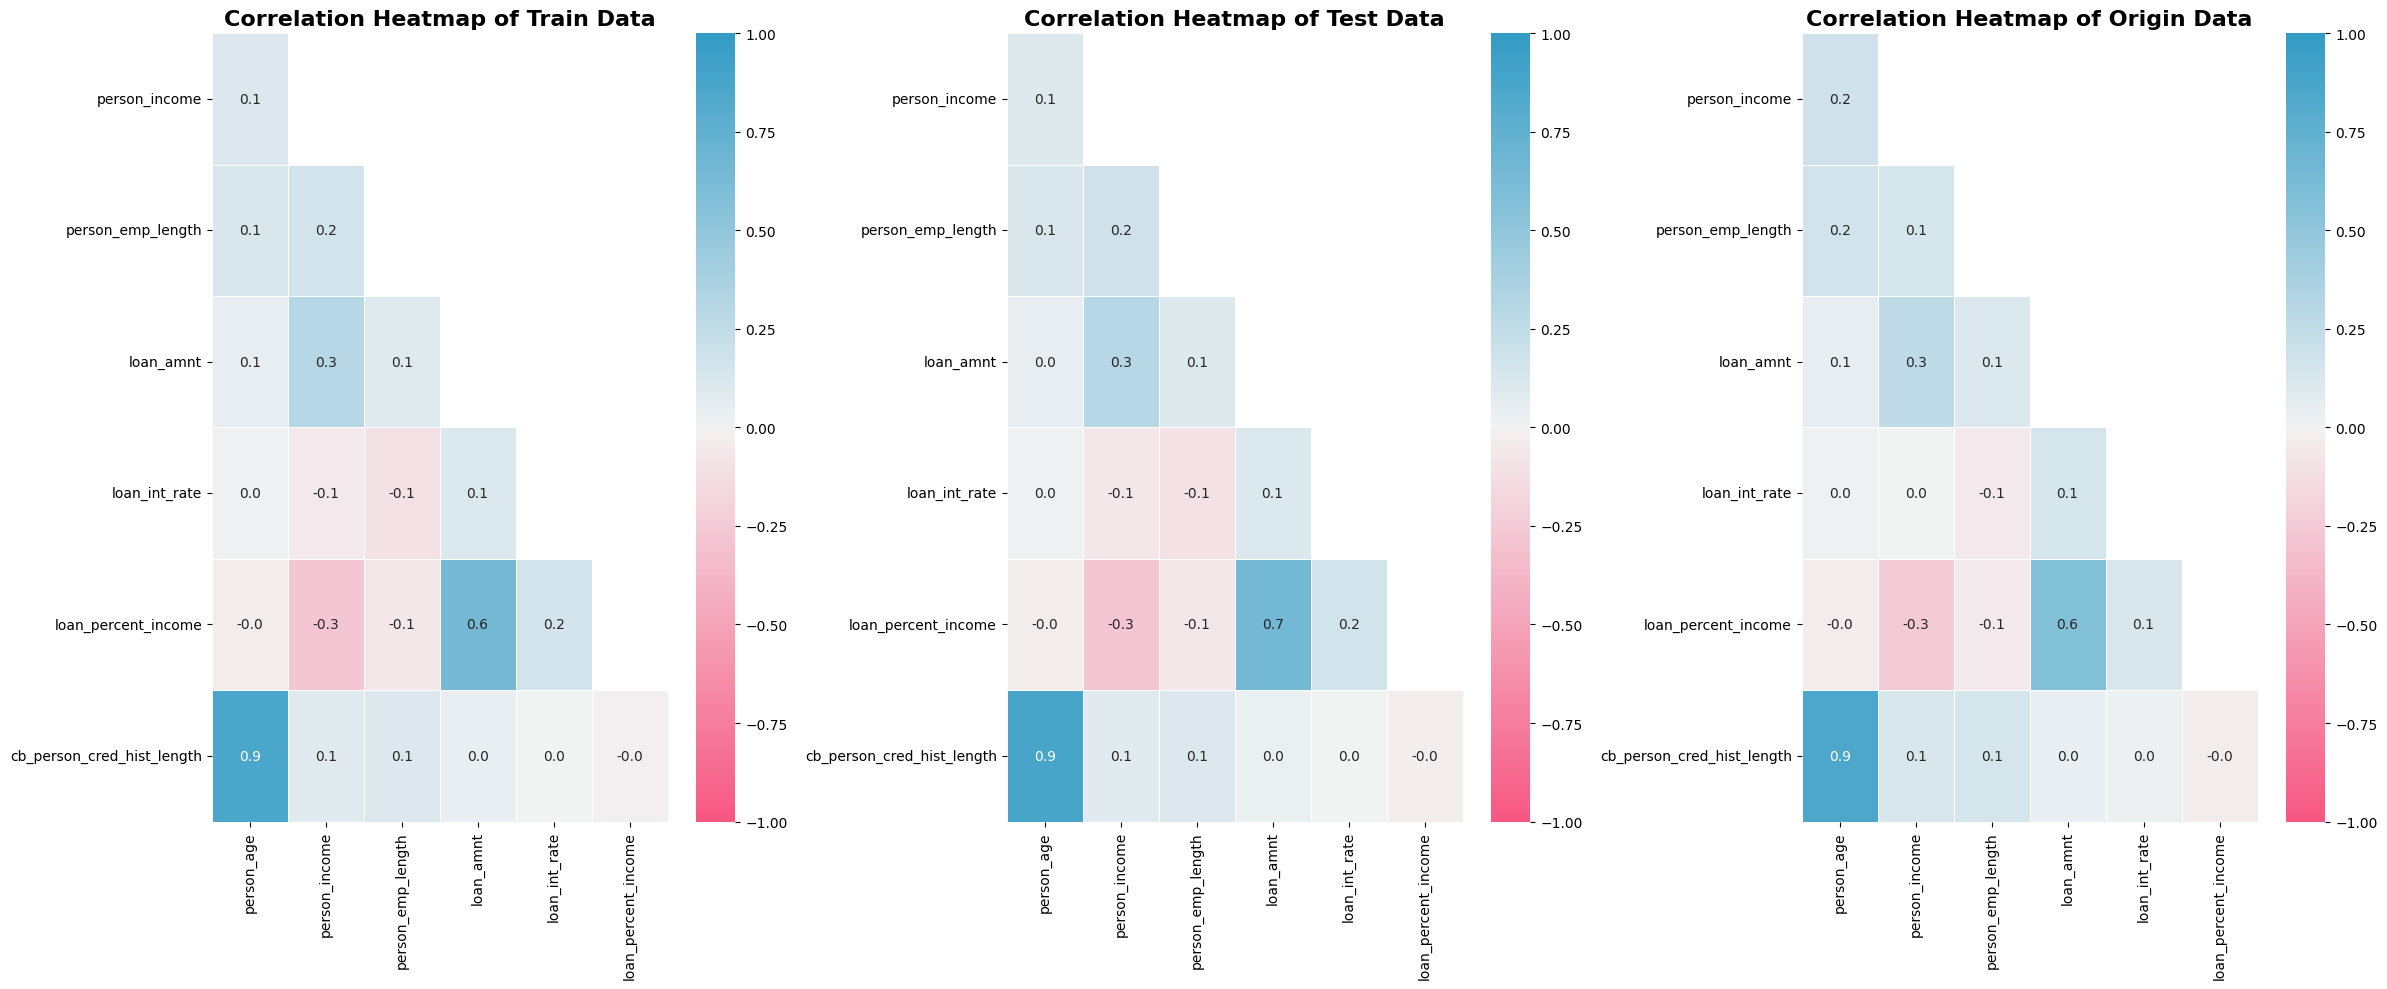

In [22]:
def plot_correlation(df_train, df_origin, df_test, origin_name="Origin Data", train_name="Train Data", test_name="Test Data"):
    corr_train = df_train.corr(numeric_only=True)
    corr_origin = df_origin.corr(numeric_only=True)
    corr_test = df_test.corr(numeric_only=True)

    mask_train = np.triu(np.ones_like(corr_train, dtype=bool))
    adjusted_mask_train = mask_train[1:, :-1]
    adjusted_cereal_corr_train = corr_train.iloc[1:, :-1]

    mask_origin = np.triu(np.ones_like(corr_origin, dtype=bool))
    adjusted_mask_origin = mask_origin[1:, :-1]
    adjusted_cereal_corr_origin = corr_origin.iloc[1:, :-1]

    mask_test = np.triu(np.ones_like(corr_test, dtype=bool))
    adjusted_mask_test = mask_test[1:, :-1]
    adjusted_cereal_corr_test = corr_test.iloc[1:, :-1]

    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
    fig, ax = plt.subplots(1, 3, figsize=(24, 10))

    sns.heatmap(data=adjusted_cereal_corr_train, mask=adjusted_mask_train,
                annot=True, fmt=".1f", cmap=cmap,
                vmin=-1, vmax=1, linecolor="white", linewidths=0.5, ax=ax[0])
    ax[0].set_title(f"Correlation Heatmap of {train_name}", fontsize=16, weight="bold")

    sns.heatmap(data=adjusted_cereal_corr_test, mask=adjusted_mask_test,
                annot=True, fmt=".1f", cmap=cmap,
                vmin=-1, vmax=1, linecolor="white", linewidths=0.5, ax=ax[1])
    ax[1].set_title(f"Correlation Heatmap of {test_name}", fontsize=16, weight="bold")

    sns.heatmap(data=adjusted_cereal_corr_origin, mask=adjusted_mask_origin,
                annot=True, fmt=".1f", cmap=cmap,
                vmin=-1, vmax=1, linecolor="white", linewidths=0.5, ax=ax[2])
    ax[2].set_title(f"Correlation Heatmap of {origin_name}", fontsize=16, weight="bold")

    plt.tight_layout()
    plt.show()

plot_correlation(df_train=df_train.drop(columns="loan_status", axis=1),
                 df_origin=df_origin.drop(columns="loan_status", axis=1),
                 df_test=df_test)

### Insights from Correlation Analysis of Numerical Features

**Observation on Correlation Heatmaps:**

* The **correlation structure between the origin, training, and test datasets is remarkably stable**, indicating no data drift across datasets. This strengthens confidence in model consistency.
* **Several feature pairs display strong correlations in all datasets:**
  - `person_age` and `cb_person_cred_hist_length` have a high positive correlation (+0.9), suggesting older individuals typically possess longer credit histories.
  - `loan_percent_income` and `loan_amnt` are positively correlated (+0.6), indicating that larger loan amounts tend to consume a greater portion of a person's income.
  - `person_emp_length` and `person_income` share a moderate positive correlation (+0.2), hinting that longer employment tenure is associated with higher earnings.

**Implication – Potential Multicollinearity:**

* The presence of strong relationships among variables—especially between `person_age`, `loan_percent_income`, and `loan_amnt`—may suggest **multicollinearity**.
* This is crucial when applying **linear models (e.g., Logistic Regression)**, as multicollinearity can:
  * Lead to unstable or misleading coefficient estimates.
  * Complicate the interpretation of model results.
  * Increase the variance of predictions, reducing model robustness.

## Categorical Feature Distributions

In [23]:
def plot_categorical_distribution(cat_features, df_train, df_test, df_origin, order=None):
    for feature in cat_features:
        fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(25, 10))

        # Determine order dynamically if not provided
        if order is None:
            unique_vals = sorted(df_train[feature].dropna().unique())
        else:
            unique_vals = order

        # COUNT PLOT – TRAIN
        sns.countplot(data=df_train, x=feature, ax=ax[0, 0],
                      palette=color(n_colors=len(unique_vals)), order=unique_vals)
        ax[0, 0].set_title(f"[Train] Count plot of {feature}", fontsize=13, pad=12)
        ax[0, 0].grid(axis="y", linestyle=":", linewidth=0.7)
        sns.despine(ax=ax[0, 0], left=False, bottom=False)
        for container in ax[0, 0].containers:
            ax[0, 0].bar_label(container, fmt='%d', label_type="edge", fontsize=10, weight="bold")

        # COUNT PLOT – ORIGIN
        sns.countplot(data=df_origin, x=feature, ax=ax[0, 1],
                      palette=color(n_colors=len(unique_vals)), order=unique_vals)
        ax[0, 1].set_title(f"[Origin] Count plot of {feature}", fontsize=13, pad=12)
        ax[0, 1].grid(axis="y", linestyle=":", linewidth=0.7)
        sns.despine(ax=ax[0, 1], left=False, bottom=False)
        for container in ax[0, 1].containers:
            ax[0, 1].bar_label(container, fmt='%d', label_type="edge", fontsize=10, weight="bold")

        # COUNT PLOT – TEST
        sns.countplot(data=df_test, x=feature, ax=ax[0, 2], 
                      palette=color(n_colors=len(unique_vals)), order=unique_vals)
        ax[0, 2].set_title(f"[Test] Count plot of {feature}", fontsize=13, pad=12)
        ax[0, 2].grid(axis="y", linestyle=":", linewidth=0.7)
        sns.despine(ax=ax[0, 2], left=False, bottom=False)
        for container in ax[0, 2].containers:
            ax[0, 2].bar_label(container, fmt='%d', label_type="edge", fontsize=10, weight="bold")

        # PERCENTAGE BARPLOT – TRAIN
        train_percent = df_train[feature].value_counts(normalize=True) * 100
        train_percent = train_percent.reindex(unique_vals).fillna(0)
        sns.barplot(x=train_percent.index, y=train_percent.values, ax=ax[1, 0],
                    palette=color(n_colors=len(unique_vals)))
        ax[1, 0].set_title(f"[Train] Percentage Distribution of {feature}", pad=10)
        ax[1, 0].set_ylabel("Percentage (%)")
        ax[1, 0].set_xlabel(feature)
        ax[1, 0].grid(axis="y", linestyle=":", linewidth=0.7)
        for i, v in enumerate(train_percent.values):
            ax[1, 0].text(i, v + 0.5, f"{v:.1f}%", ha='center', fontsize=10, weight="bold")

        # PERCENTAGE BARPLOT – ORIGIN
        origin_percent = df_origin[feature].value_counts(normalize=True) * 100
        origin_percent = origin_percent.reindex(unique_vals).fillna(0)
        sns.barplot(x=origin_percent.index, y=origin_percent.values, ax=ax[1, 1],
                    palette=color(n_colors=len(unique_vals)))
        ax[1, 1].set_title(f"[Origin] Percentage Distribution of {feature}", pad=10)
        ax[1, 1].set_ylabel("Percentage (%)")
        ax[1, 1].set_xlabel(feature)
        ax[1, 1].grid(axis="y", linestyle=":", linewidth=0.7)
        for i, v in enumerate(origin_percent.values):
            ax[1, 1].text(i, v + 0.5, f"{v:.1f}%", ha='center', fontsize=10, weight="bold")

        # PERCENTAGE BARPLOT – TEST
        test_percent = df_test[feature].value_counts(normalize=True) * 100
        test_percent = test_percent.reindex(unique_vals).fillna(0)
        sns.barplot(x=test_percent.index, y=test_percent.values, ax=ax[1, 2],
                    palette=color(n_colors=len(unique_vals)))
        ax[1, 2].set_title(f"[Test] Percentage Distribution of {feature}", pad=10)
        ax[1, 2].set_ylabel("Percentage (%)")
        ax[1, 2].set_xlabel(feature)
        ax[1, 2].grid(axis="y", linestyle=":", linewidth=0.7)
        for i, v in enumerate(test_percent.values):
            ax[1, 2].text(i, v + 0.5, f"{v:.1f}%", ha='center', fontsize=10, weight="bold")

        plt.tight_layout()
        plt.show()


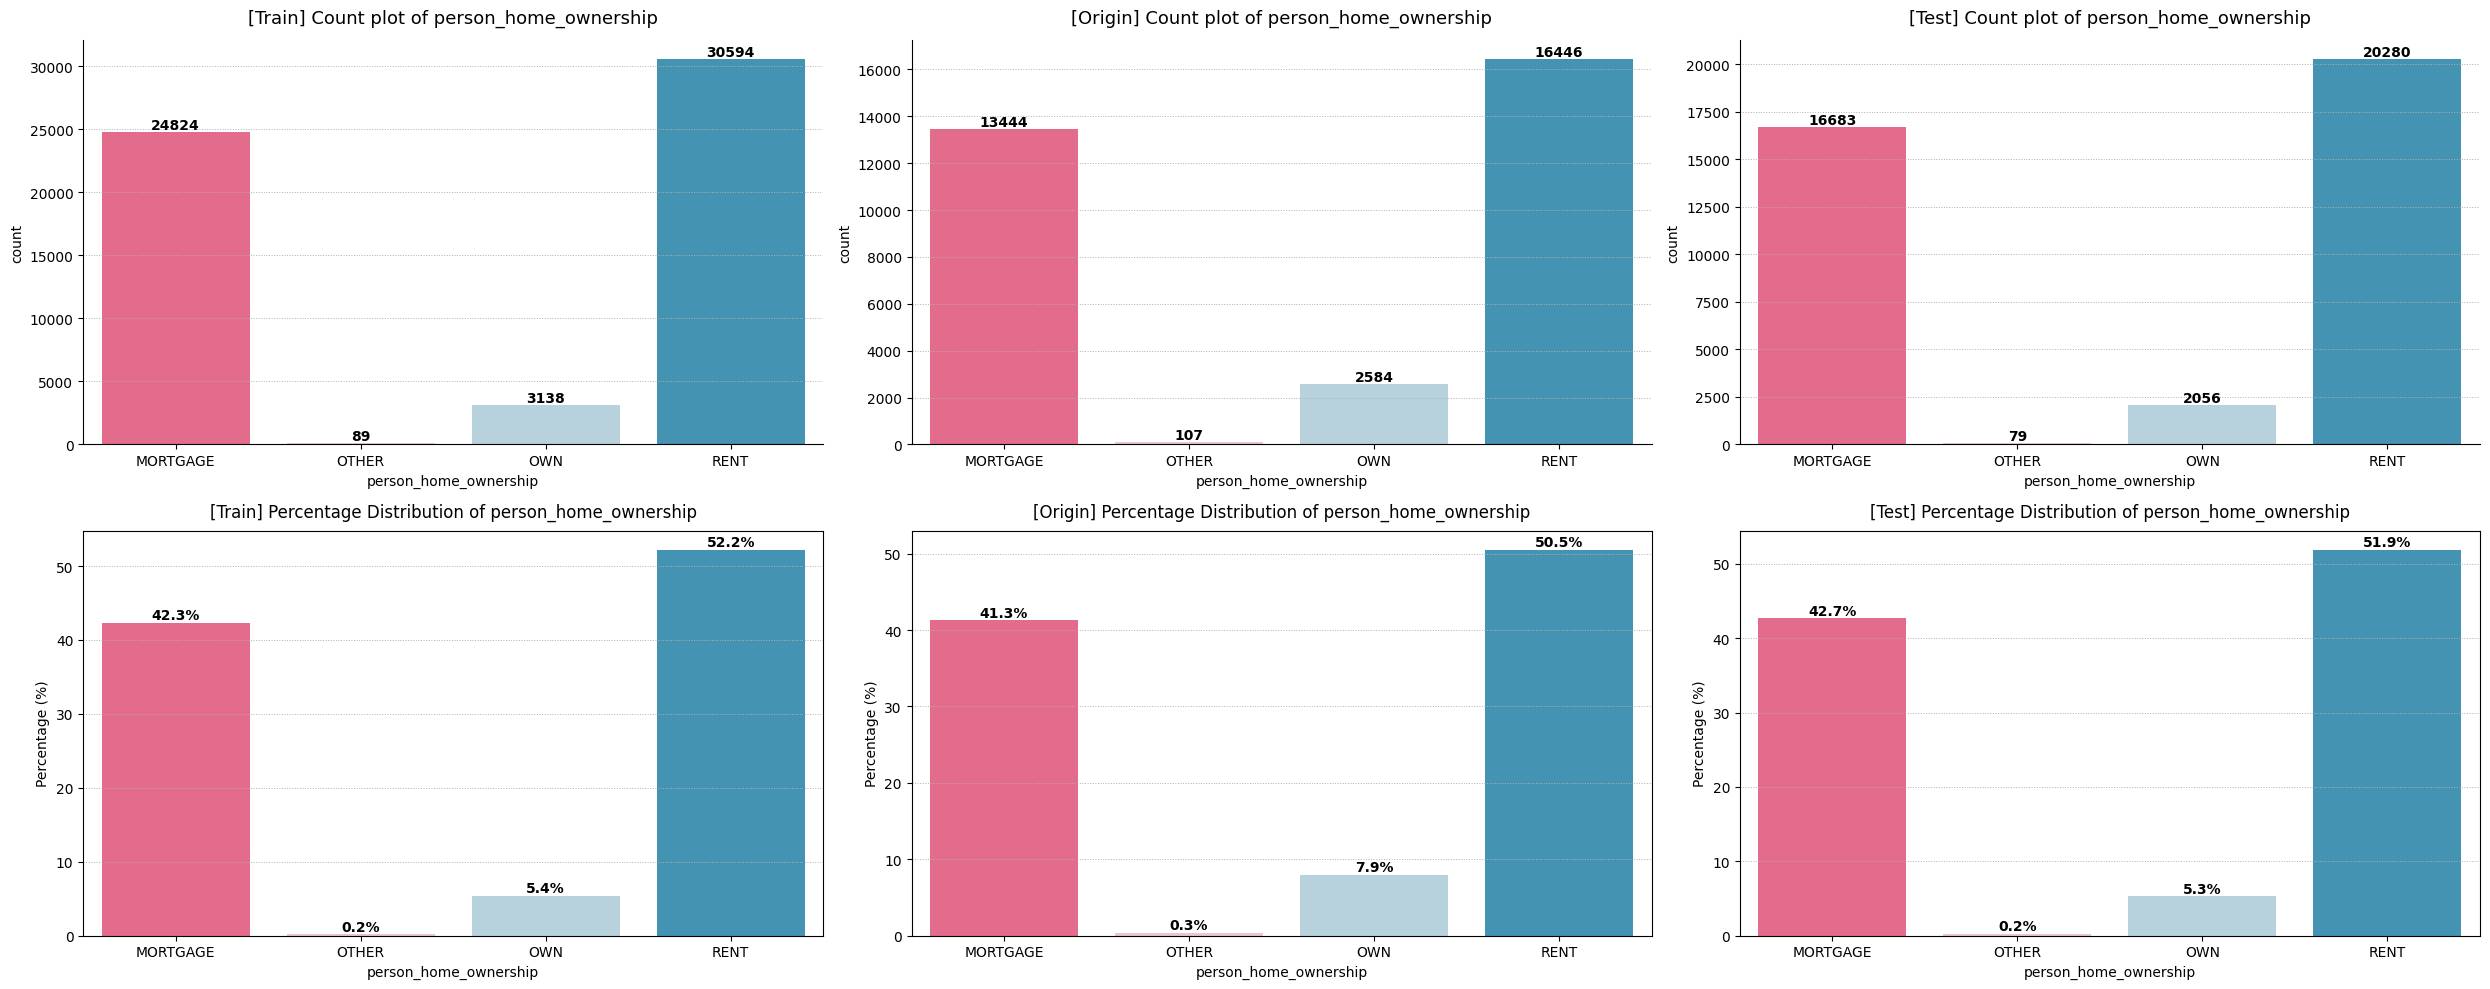

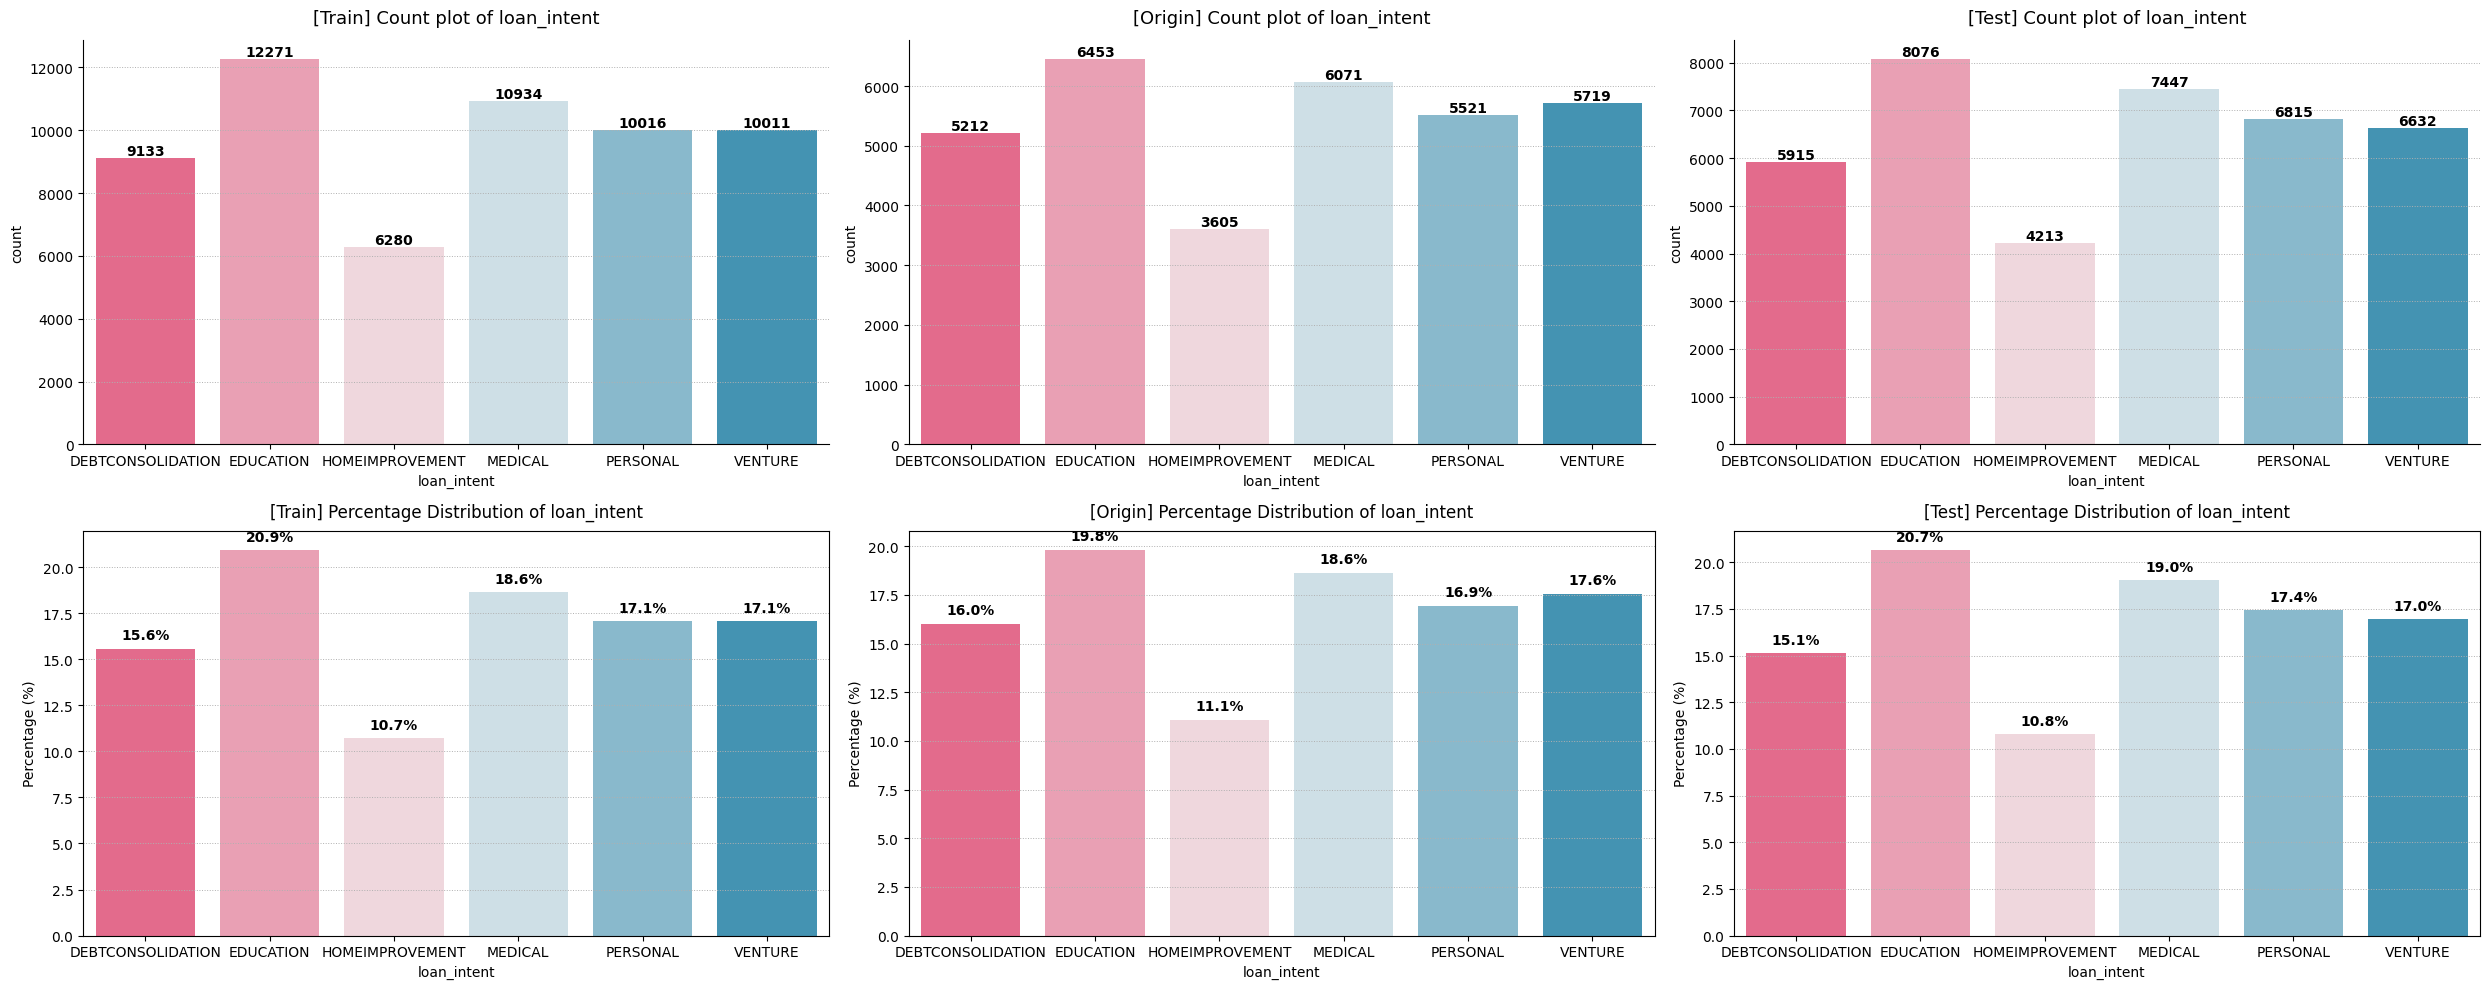

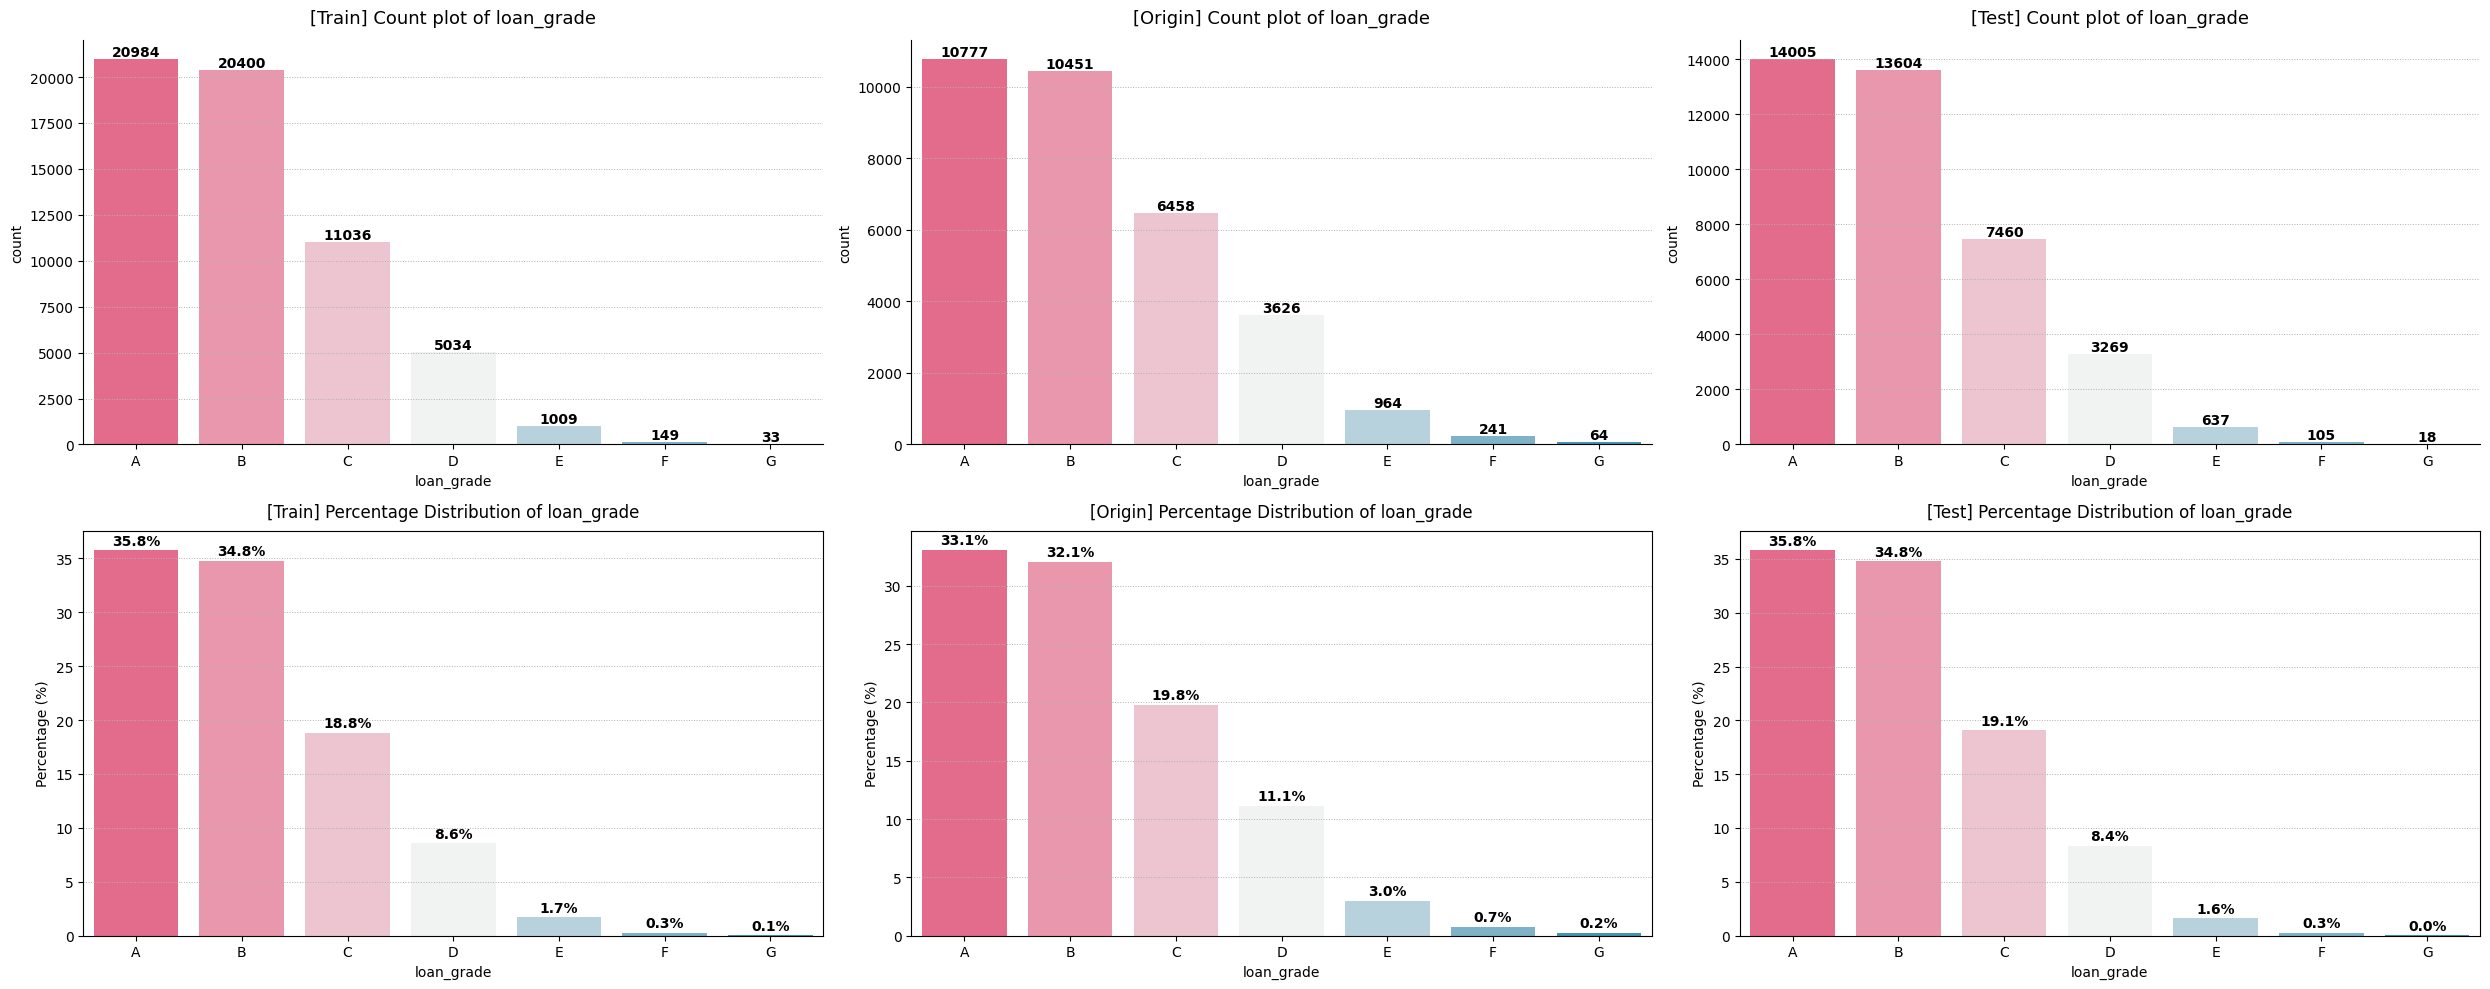

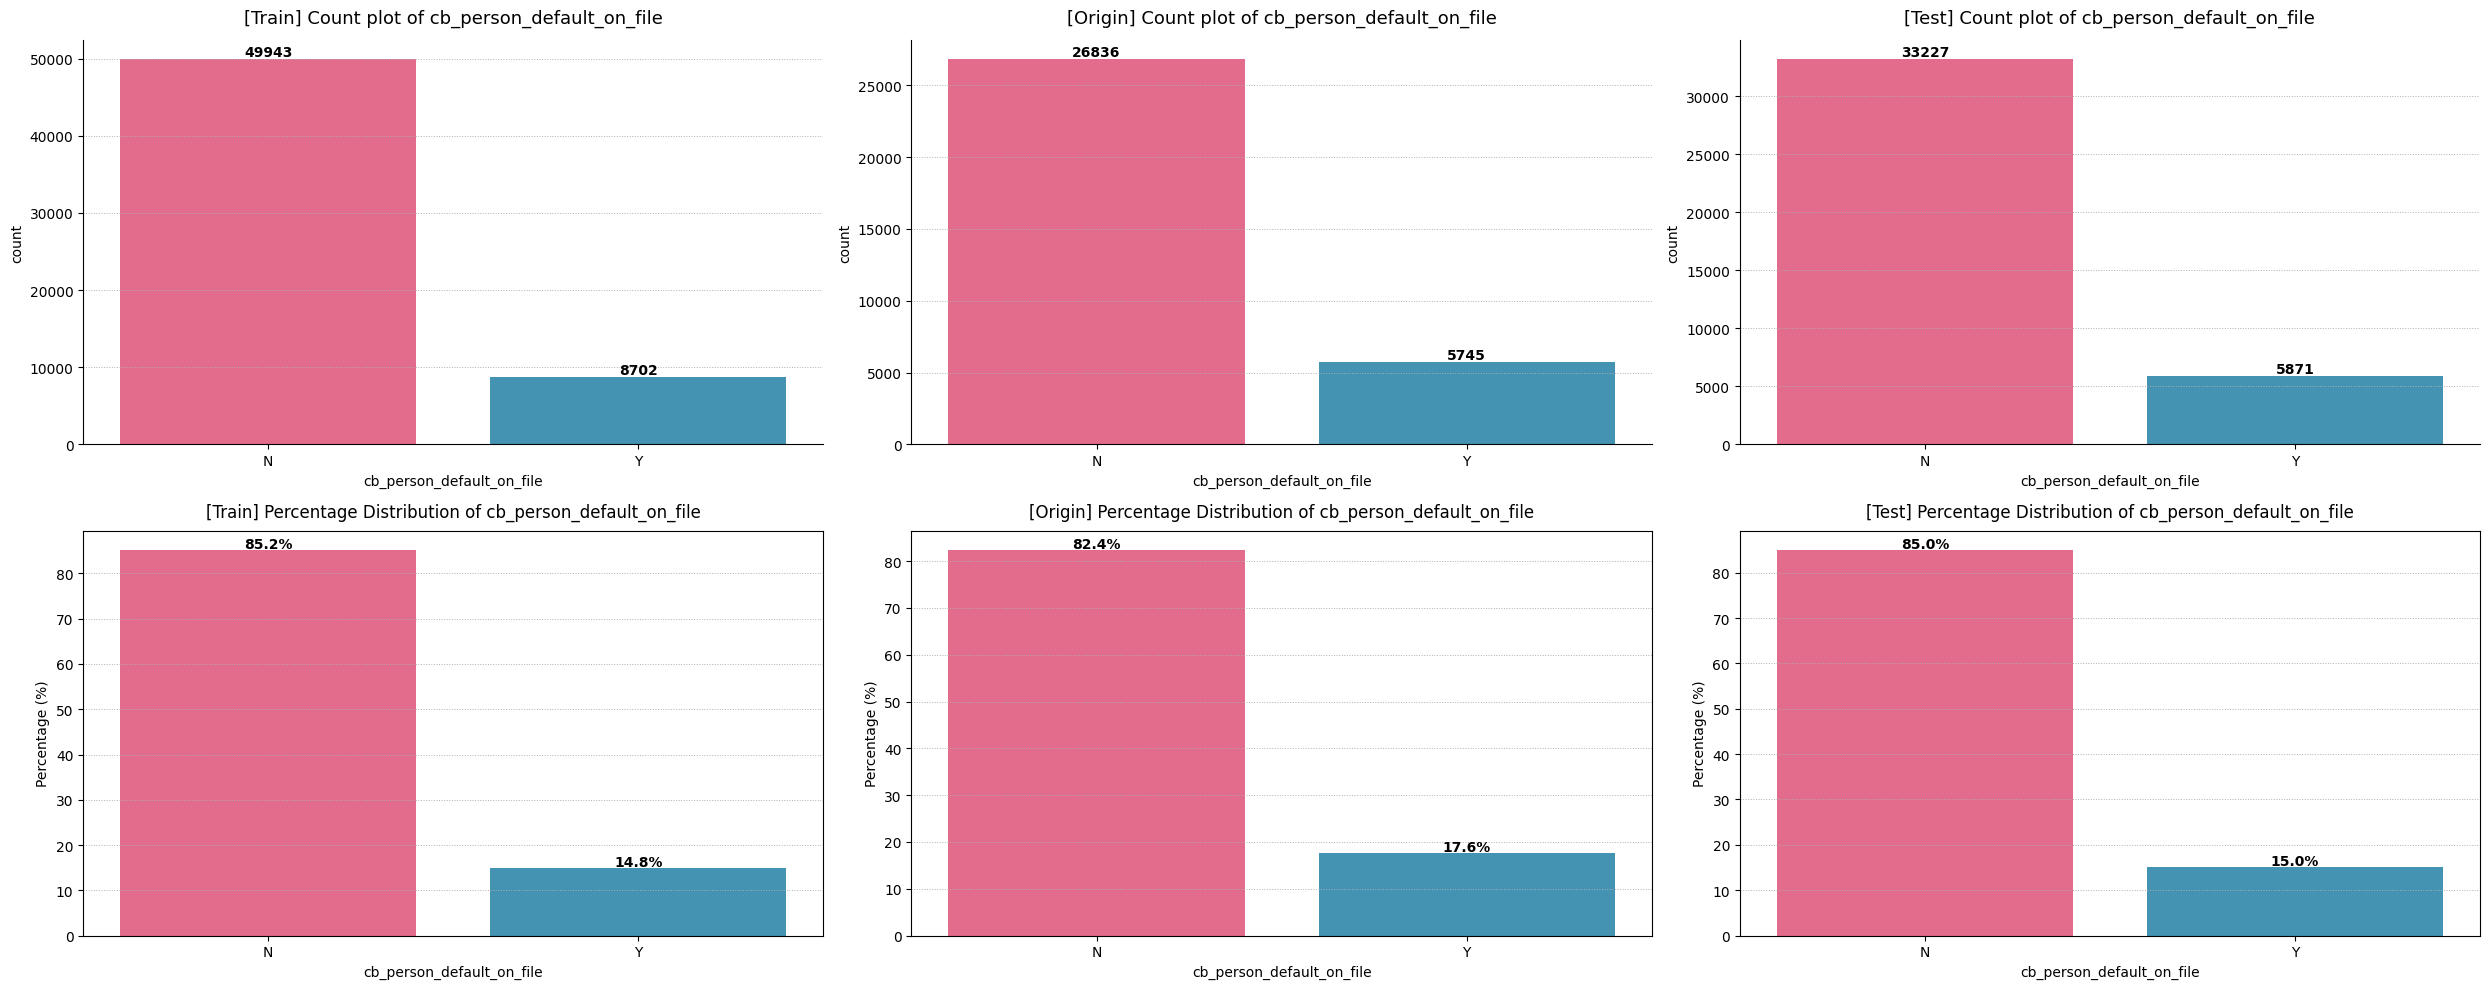

In [24]:
plot_categorical_distribution(cat_features=cat_features, df_train = df_train, df_test = df_test, df_origin=df_origin)

In [25]:
def top_ratio(df_test = df_test, df_train = df_train, df_origin=df_origin, cat_features = cat_features):
    dataset_names = ["Train", "Test", "Origin"]
    datasets = [df_train, df_origin, df_test]
    for i, (data, name) in enumerate(zip(datasets, dataset_names)):
        print(f"{name} Data")
        flagged = False
        for feature in cat_features:
            freq = data[feature].value_counts(normalize=True)
            top_ratio = freq.iloc[0]
            if top_ratio > 0.99:
                flagged = True
                print(f"⚠️  {feature}: {top_ratio:.1%} là '{freq.index[0]}'")
        if not flagged:
            print("✅ No feature has a category that makes up more than 99% of its values.")
        print("*" * 50)
top_ratio()

Train Data
✅ No feature has a category that makes up more than 99% of its values.
**************************************************
Test Data
✅ No feature has a category that makes up more than 99% of its values.
**************************************************
Origin Data
✅ No feature has a category that makes up more than 99% of its values.
**************************************************


### Insights on Categorical Feature Distributions

**Loan Grade Distribution**

The `loan_grade` feature is a categorical variable with 7 levels ranging from **A** to **G**.
The distribution is **highly imbalanced**, with grades **A, B, and C** making up the majority, while the remaining grades appear far less frequently.

**Interpretation:**
This reflects the real-world trend where most borrowers have higher credit ratings, while lower-grade borrowers are relatively rare in the dataset.

>**Implication:**
> When using this feature for analysis or modeling, it’s important to account for this imbalance, as it may impact model learning if the feature proves influential.

**Loan Intent Distribution**

The `loan_intent` feature includes 6 categories representing different loan purposes.
Its values are **fairly evenly distributed** across all groups.

**Interpretation:**
This suggests a **diverse dataset** in terms of loan purposes, capturing a wide range of real-world borrowing scenarios.

> **Implication:**
> This diversity allows the model to learn credit behavior patterns across various loan intents, potentially improving generalization and robustness.

**Home Ownership Distribution**

The `person_home_ownership` feature is **heavily concentrated in two categories**: **RENT** and **MORTGAGE**, with the remaining categories being minimal.

**Interpretation:**
This reflects a realistic societal trend in home ownership among borrowers, where most either rent or have a mortgage.

**cb_person_default_on_file Distribution**

The `cb_person_default_on_file` feature is a binary categorical variable with values **N** (no previous default) and **Y** (previous default on file).

- Across all datasets (Train, Original, Test), the distribution is **heavily skewed** toward the **N** category:
  - **N** accounts for ~85% of samples in Train and Test, and ~82% in the Original dataset.
  - **Y** makes up only ~15–18% of the data.
- This pattern reflects the real-world scenario where most loan applicants do **not** have a history of default.

**Interpretation:**  
>The dominance of the "N" category indicates that the majority of applicants have a clean credit history, while a smaller portion have previous defaults. This feature provides important context about applicant risk profiles and can be valuable for downstream modeling.

**Summary of Categorical Feature Analysis**

**Distributions are realistic and aligned with real-world patterns**

* Most borrowers have **good credit ratings** (grades A–C)
* Majority either **rent** or have a **mortgage**
* Most applicants have **no previous defaults**

**Some features are clearly imbalanced**

* `loan_grade` and `cb_person_default_on_file` show **strong skewness**
* Important to address **class imbalance** during model training

**Diverse loan purposes in data**

* `loan_intent` is **evenly distributed**, supporting robust learning

**Implications for modeling**

* Careful selection of **categorical encoding techniques** is crucial
* Important to **analyze minority groups** – they often drive predictive performance.

## Bivariate Analysis

🔎 D’Agostino and Pearson Normality Test for 'person_age' across 'loan_status' groups

 Group: 0 (n = 50295)
  Statistic : 21049.669
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 1 (n = 8350)
  Statistic : 3578.170
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'person_age' by 'loan_status'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 215003351.0
p-value     : 0.0004346322893304376

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: The medians are equal, but distributions may still differ.


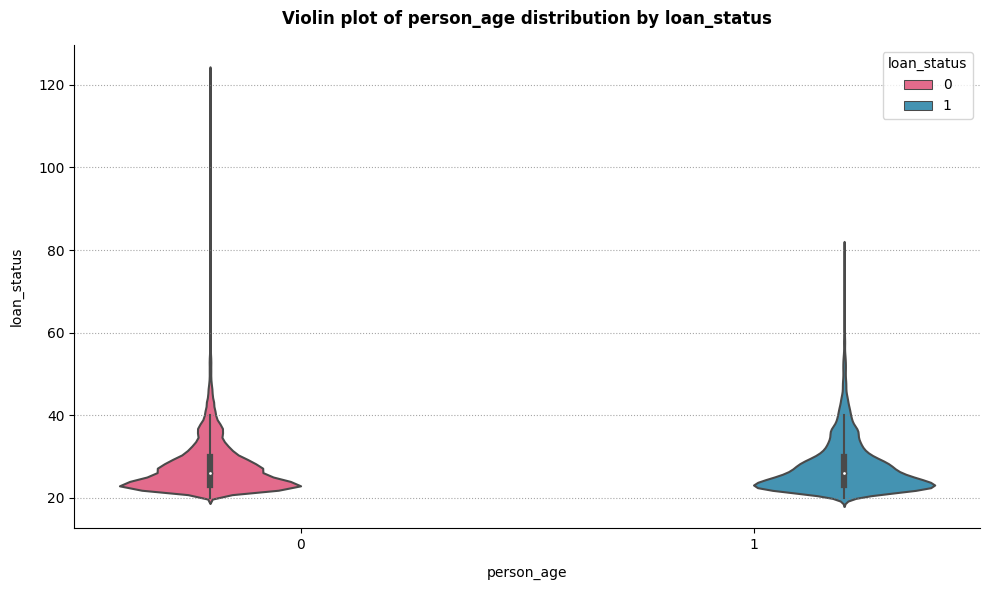

🔎 D’Agostino and Pearson Normality Test for 'person_income' across 'loan_status' groups

 Group: 0 (n = 50295)
  Statistic : 83758.608
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 1 (n = 8350)
  Statistic : 4632.612
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'person_income' by 'loan_status'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 291664984.5
p-value     : 0.0

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group '0' has a higher median 'person_income' than Group '1'.


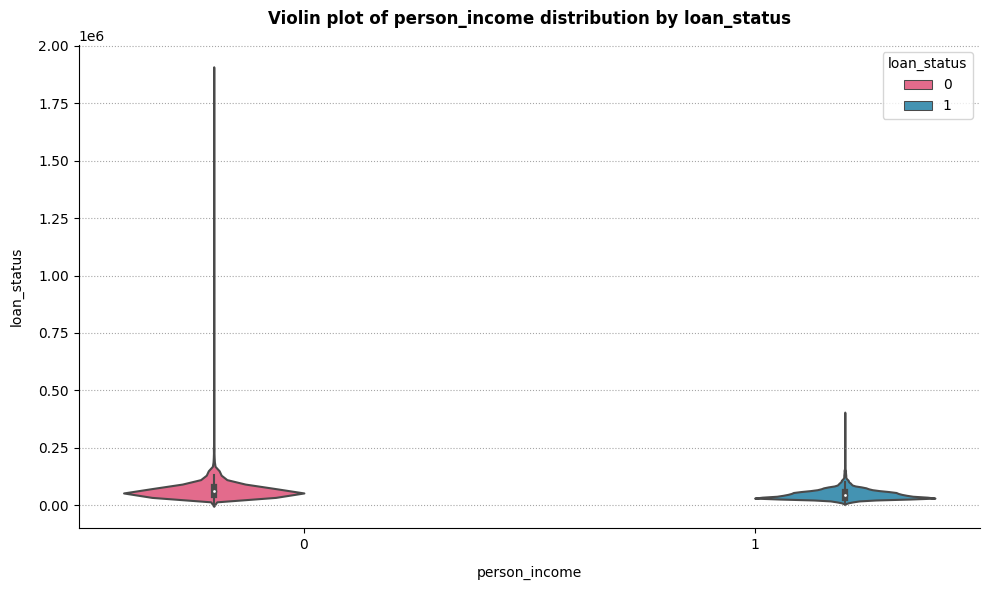

🔎 D’Agostino and Pearson Normality Test for 'person_emp_length' across 'loan_status' groups

 Group: 0 (n = 50295)
  Statistic : 23396.001
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 1 (n = 8350)
  Statistic : 9082.749
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'person_emp_length' by 'loan_status'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 250880635.0
p-value     : 6.954920610402159e-181

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group '0' has a higher median 'person_emp_length' than Group '1'.


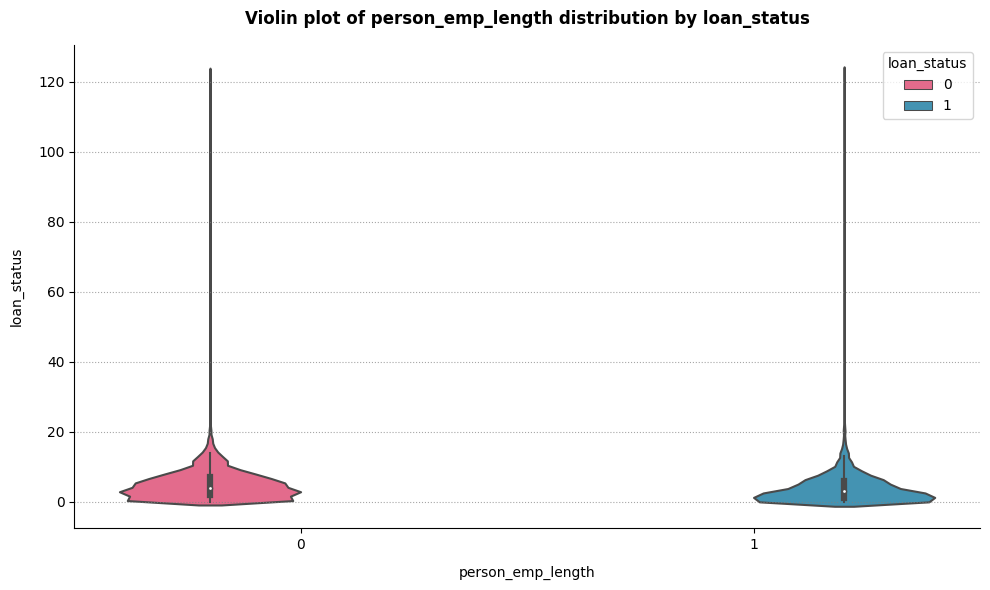

🔎 D’Agostino and Pearson Normality Test for 'loan_amnt' across 'loan_status' groups

 Group: 0 (n = 50295)
  Statistic : 10510.527
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 1 (n = 8350)
  Statistic : 732.626
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'loan_amnt' by 'loan_status'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 165402469.5
p-value     : 2.030036814268422e-213

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group '1' has a higher median 'loan_amnt' than Group '0'.


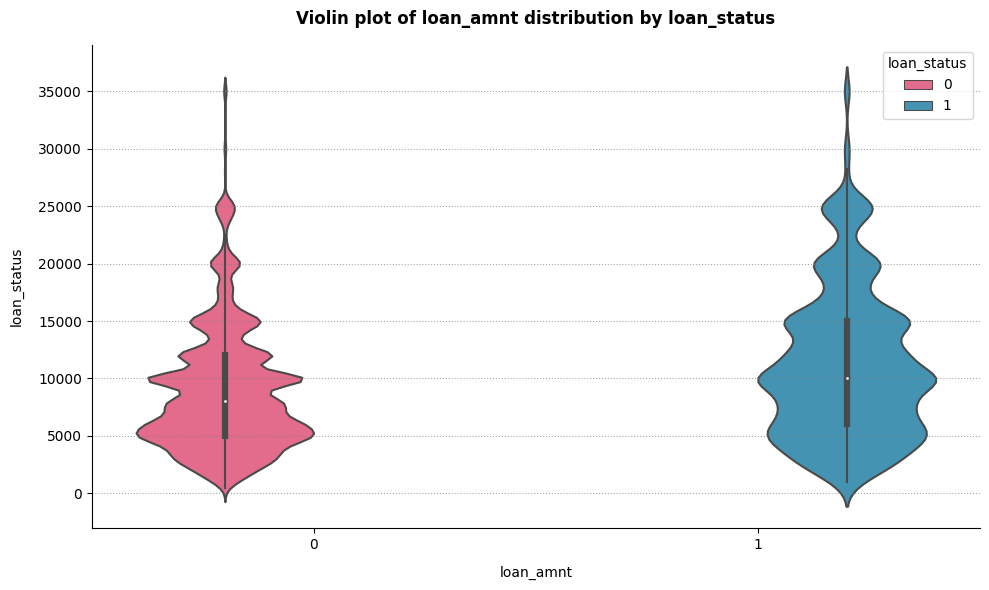

🔎 D’Agostino and Pearson Normality Test for 'loan_int_rate' across 'loan_status' groups

 Group: 0 (n = 50295)
  Statistic : 3636.765
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 1 (n = 8350)
  Statistic : 308.566
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'loan_int_rate' by 'loan_status'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 99760863.5
p-value     : 0.0

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group '1' has a higher median 'loan_int_rate' than Group '0'.


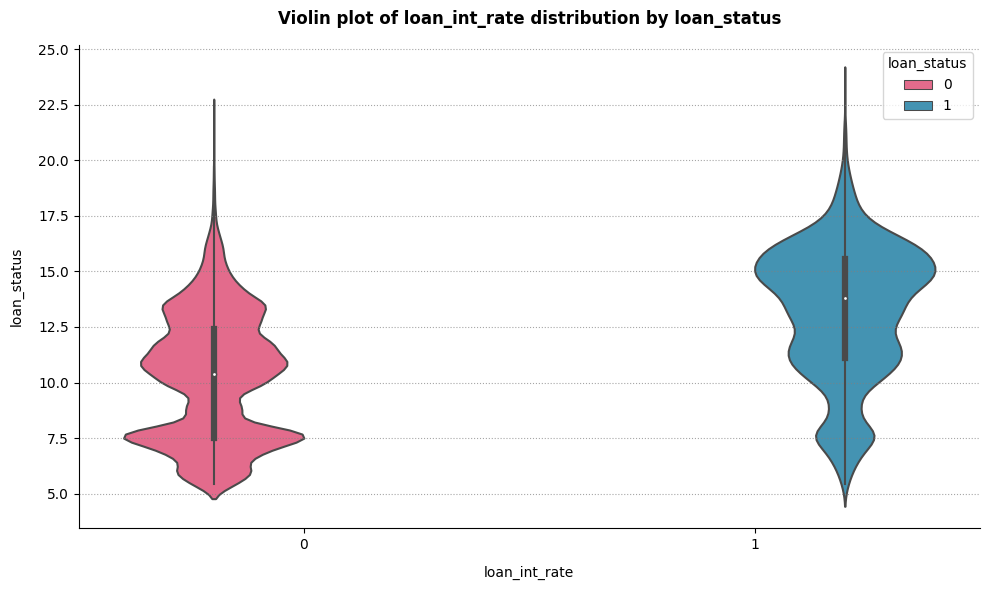

🔎 D’Agostino and Pearson Normality Test for 'loan_percent_income' across 'loan_status' groups

 Group: 0 (n = 50295)
  Statistic : 4624.027
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 1 (n = 8350)
  Statistic : 1713.587
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'loan_percent_income' by 'loan_status'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 108182276.5
p-value     : 0.0

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group '1' has a higher median 'loan_percent_income' than Group '0'.


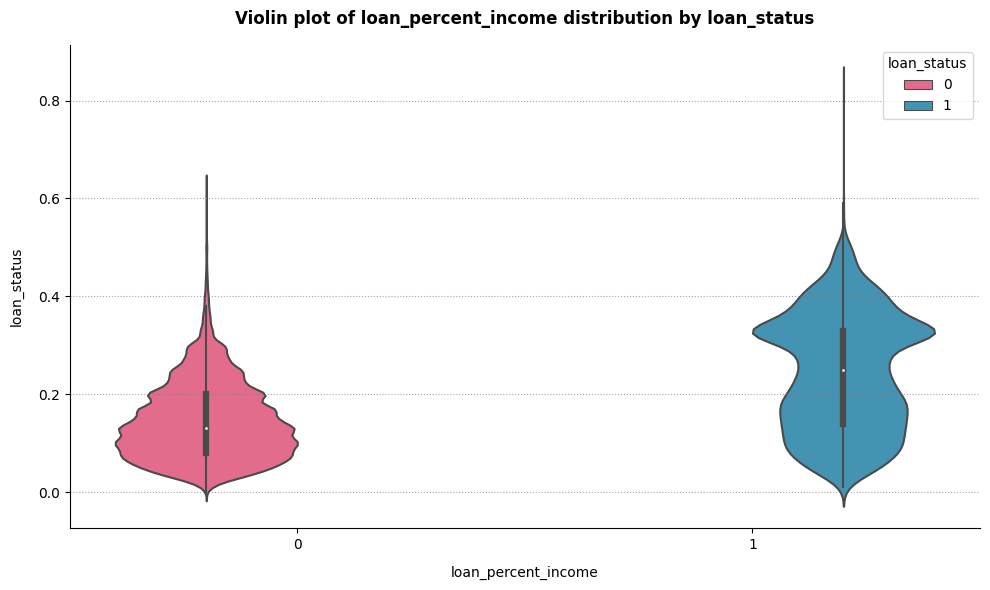

🔎 D’Agostino and Pearson Normality Test for 'cb_person_cred_hist_length' across 'loan_status' groups

 Group: 0 (n = 50295)
  Statistic : 15313.298
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 1 (n = 8350)
  Statistic : 2838.306
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'cb_person_cred_hist_length' by 'loan_status'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 214358311.5
p-value     : 0.002037850386034325

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: The medians are equal, but distributions may still differ.


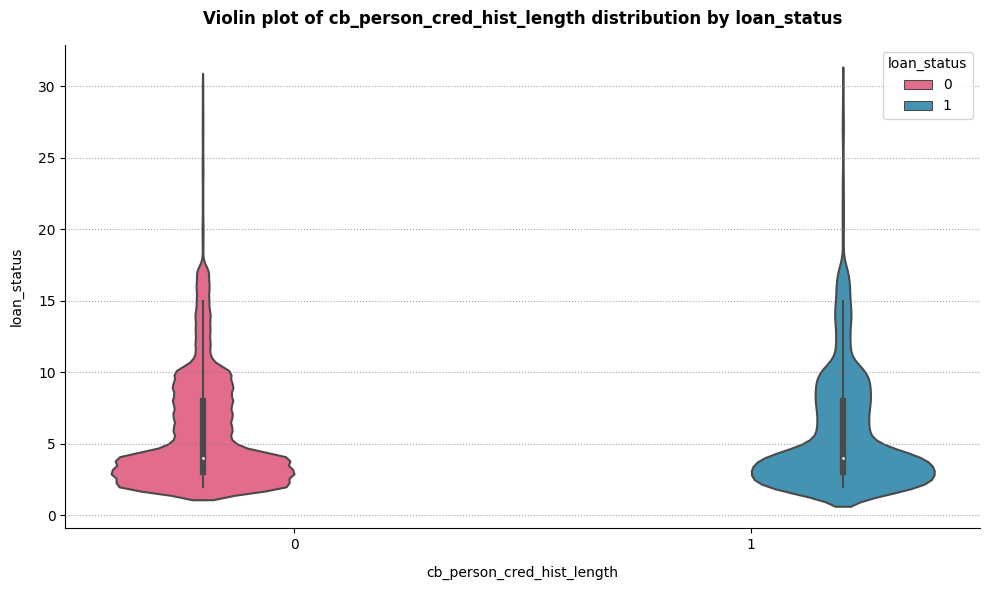

In [26]:
from IPython.core.display import HTML
def perform_statical_testing(feature, df_train = df_train, total_categories = 2, target_feature = "loan_status"):
    cal_normaltest(cat_feature=target_feature, num_feature=feature, df=df_train)
    if total_categories == 2:
        cal_mannwhitneyu(dataframe=df_train, categorical_feature=target_feature, num_feature=feature)
    else:
        pass

def plot_numerical_distribution_by_loan_status(feature, df_train = df_train, target_feature = "loan_status", order = None):
    """
    Performs statical testing for each groups (distribution by target_feature) by ANOVA, T-test, Mann-Whitney U test,... <br>
    Draw violinplot and histogram to display the distribution for each groups of feature.
    Parameters:
        feature (str): The name of the column representing the numerical variable.
        df_train (pd.DataFrame): The input dataset.
        target_feature (str): The name of the column representing the target feature.
        order (list): Order items in plot.

    Returns:
        None
    """

    # Summary information
    df_summary_feature = df_train.groupby(by = target_feature, as_index= False)\
    .agg (
        Count = (feature, "count"),
        Mean = (feature, "mean"),
        Median = (feature, "median"),
        Std = (feature, "std")
    )
    df_summary_feature = df_summary_feature.sort_values(by="Mean", ascending=False)    

    summary_data = [
        ("Overall Mean", f"{df_train[feature].mean():.2f}"),
        ("Overall Median", f"{df_train[feature].median()}"),
        ("Overall Std", f"{df_train[feature].std():.2f}")
    ]
    summary_html = "<ul>" + "".join([f"<li><b>{k}:</b> {v}</li>" for k, v in summary_data]) + "</ul>"
    display(HTML(summary_html))
    display(df_summary_feature.style.background_gradient(cmap=cm).set_table_attributes('style="width:75%; margin:auto;"'))

    perform_statical_testing(feature=feature, target_feature=target_feature)

    # Plot distribution
    fig, ax = plt.subplots(figsize=(10, 6))
    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
    colors = [cmap(0.0), cmap(1.0)]
    sns.violinplot(x=target_feature, y=feature, data=df_train, hue=target_feature, palette=colors, ax=ax)
    ax.set_title(f"Violin plot of {feature} distribution by {target_feature}", pad=15, weight = "bold")
    ax.set_xlabel(feature, labelpad=10)
    ax.set_ylabel(target_feature, labelpad=10)
    plt.grid(axis="y", color="gray", linestyle=":", alpha=0.7)
    sns.despine(left=False, bottom=False, ax=ax)
    plt.tight_layout()
    plt.show()

for feature in num_features:
    display(HTML(f"<h2 style='text-align:center; font-size:22px; color:blue;'><b>Distribution of {feature} by loan_status</b></h2>"))
    plot_numerical_distribution_by_loan_status(feature=feature)

### Insight Numerical Features vs loan_status

Based on the results from **Mann–Whitney U Test**. All numerical features have statistically significant associations with `loan_status` (p-value < 0.05)

`person_age`

* **Younger individuals** tend to be **more likely to get loan approval**.
* **Older applicants** (especially very old) may be considered higher risk (due to repayment ability, income stability, etc.), leading to higher rejection rates.
* This reflects real-world practice where credit institutions often prefer applicants within a stable working-age range to minimize risk.

`person_income`

* **Contrary to common expectations**: Higher-income individuals are **more likely to be rejected**.
* This may be due to other factors such as:

  * High loan-to-income ratio (even with high income, borrowing too much).
  * Poor credit history or other risk indicators unrelated to income.
* **High income alone does not guarantee loan approval** if other risk factors are present.

`person_emp_length`

* **Contrary to common expectations**: Applicants with longer employment histories are **more likely to be rejected**.
* Possible reasons:

  * This group may consist of older individuals, who could be considered higher risk in terms of repayment ability.
  * Other factors such as credit history, loan-to-income ratio, or loan intent may carry more weight than employment length.
* **Long employment history does not guarantee loan approval** if other risk-related factors are unfavorable.

`loan_amnt`

* **Approved applicants tend to borrow higher loan amounts** compared to rejected applicants.
* This may be because they have strong credit profiles, stable income, or meet other criteria, making them eligible for larger loans.
* On the other hand, **rejected applicants mostly apply for smaller loans**, but still fail to meet the approval conditions.

`loan_int_rate`

* **Approved applicants tend to receive loans with higher interest rates** than those who are rejected.
* This could be due to:

  * Applicants in this group accepting higher interest rates to secure approval, or
  * High-risk loans being approved if the applicant meets other key conditions.
* On the other hand, applicants in the rejected group may apply for low-interest loans but still fail to meet eligibility criteria.

`loan_percent_income`

* **Approved applicants tend to have a higher loan-to-income ratio** than rejected applicants.
* This may suggest that these applicants meet other important criteria (such as good credit history, stable income, valid loan purpose, etc.), making them eligible even with a high loan-to-income ratio.
* Conversely, rejected applicants may have a low ratio but still fail to meet other approval requirements.

`cb_person_cred_hist_length`

* **Applicants who are rejected often have longer credit histories** than those who are approved.
* In contrast, approved applicants may be younger with shorter credit histories but meet other approval criteria.

In [27]:
# defining function for plotting
def bivariate_percent_plot(cat, df, figsize=(15, 6), order = None, rot = 0):
    
    display(HTML(f"<h2 style='text-align:center; font-size:22px; color:blue;'><b>Distribution of {cat} by loan_status</b></h2>"))
    fig, ax = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=figsize)
    # Plot 1
    # Calculate the total number of each "cat" by loan_status
    grouped = df.groupby([cat, "loan_status"]).size().unstack(fill_value=0)
    # Calculate the percentages
    percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100
    if order is not None:
        percentages = percentages.loc[order]
    
    # That method uses HUSL colors, so you need hue, saturation, and lightness. 
    # I used hsluv.org to select the colors of this chart.
    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
    # Draw stacked bar plot
    ax[0] = percentages.plot(kind="bar", stacked=True, cmap=cmap, ax = ax[0], use_index=True)
    for container in ax[0].containers:
        ax[0].bar_label(container, fmt='%1.2f%%', label_type="center", weight="bold", fontsize=9)

    ax[0].set_title(f"Percentage of loan_status by {cat}", fontsize=14, weight="bold")
    ax[0].set_xlabel(f"{cat}", fontsize=12)
    ax[0].set_ylabel("% loan_status Rate", fontsize=12)
    ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=rot)
    ax[0].legend_.remove()
    # ax[0].grid(color="gray", linestyle=":", linewidth=0.7)
    sns.despine(left=False, bottom=False, ax=ax[0])

    # Plot 2
    sns.countplot(data=df, hue = "loan_status", x = cat,
                palette=color(n_colors=2), ax=ax[1], order=percentages.index, hue_order = [0, 1])
    # Show value for each bar.
    for container in ax[1].containers:
        ax[1].bar_label(container, fmt='%d', label_type="edge", fontsize=9, weight="bold")

    ax[1].set_title(f"loan_status by {cat}", fontsize=14, weight="bold")
    ax[1].set_xlabel(f"{cat}", fontsize=12)
    ax[1].set_ylabel("Number of Customer", fontsize=12)
    ax[1].legend(title="loan_status", bbox_to_anchor=(1.05, 1), loc="upper left")
    ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=rot)
    # ax[1].grid(color="gray", linestyle=":", linewidth=0.7)
    sns.despine(left=False, bottom=False, ax=ax[1])
    plt.tight_layout()
    plt.show()

    cal_ChiSquare(cat_feature=cat, target_feature="loan_status", df=df, show_residuals=True)

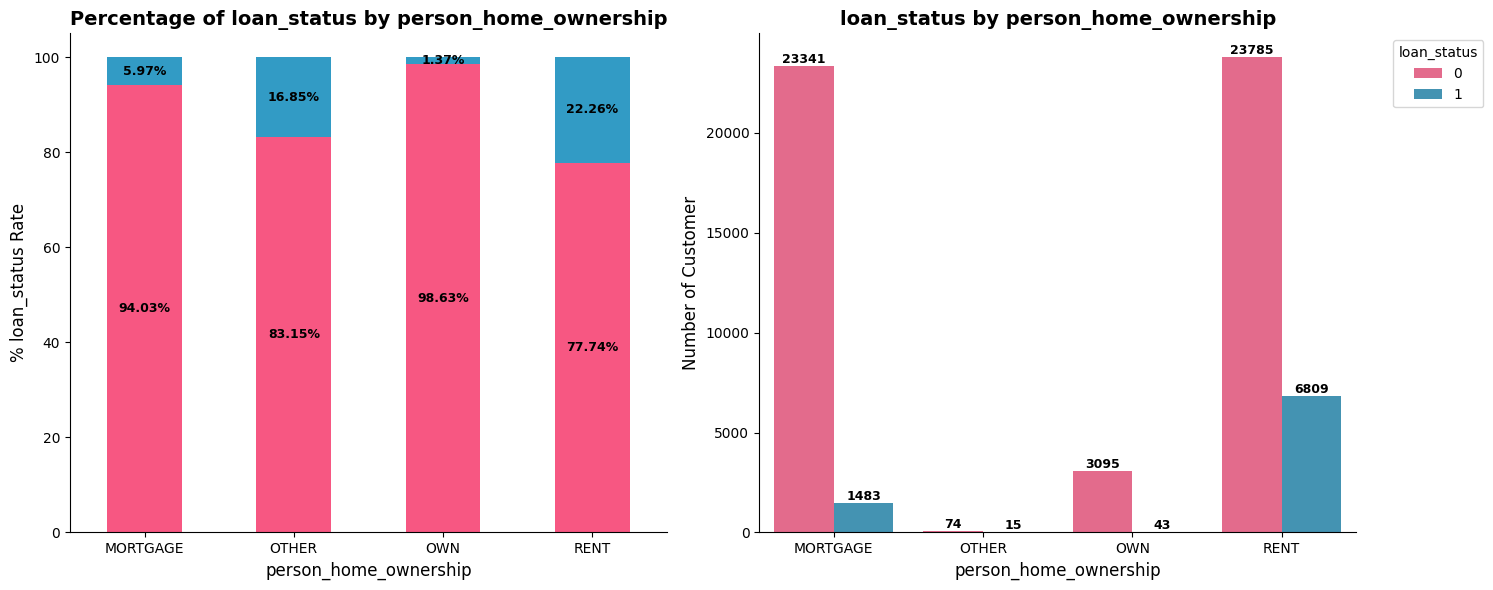


🔍 Chi-Square Test of Independence: 'person_home_ownership' vs. 'loan_status'
Chi-squared statistic: 3425.064
Degrees of freedom: 3
p-value: 0.000000
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'person_home_ownership' and 'loan_status'.

Standardized Residuals:
loan_status                0      1
person_home_ownership              
MORTGAGE               14.06 -34.51
OTHER                  -0.27   0.65
OWN                     7.78 -19.10
RENT                  -15.14  37.17


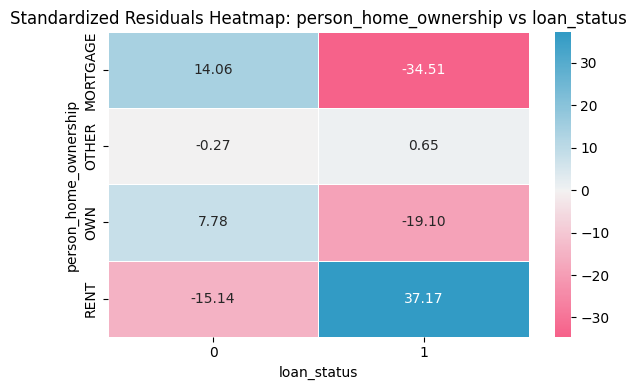

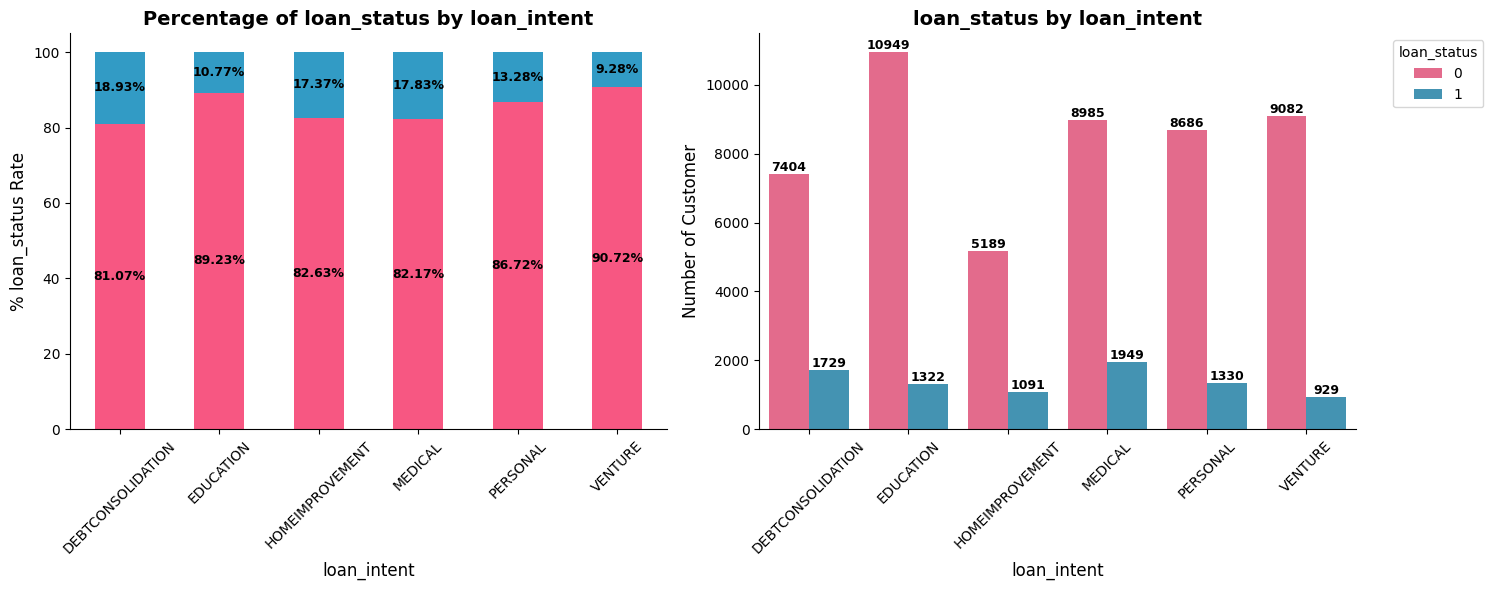


🔍 Chi-Square Test of Independence: 'loan_intent' vs. 'loan_status'
Chi-squared statistic: 660.226
Degrees of freedom: 5
p-value: 0.000000
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'loan_intent' and 'loan_status'.

Standardized Residuals:
loan_status           0      1
loan_intent                   
DEBTCONSOLIDATION -4.84  11.89
EDUCATION          4.14 -10.17
HOMEIMPROVEMENT   -2.68   6.58
MEDICAL           -4.05   9.94
PERSONAL           1.04  -2.54
VENTURE            5.36 -13.15


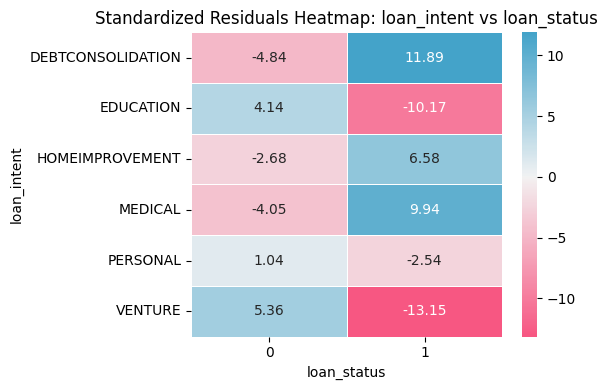

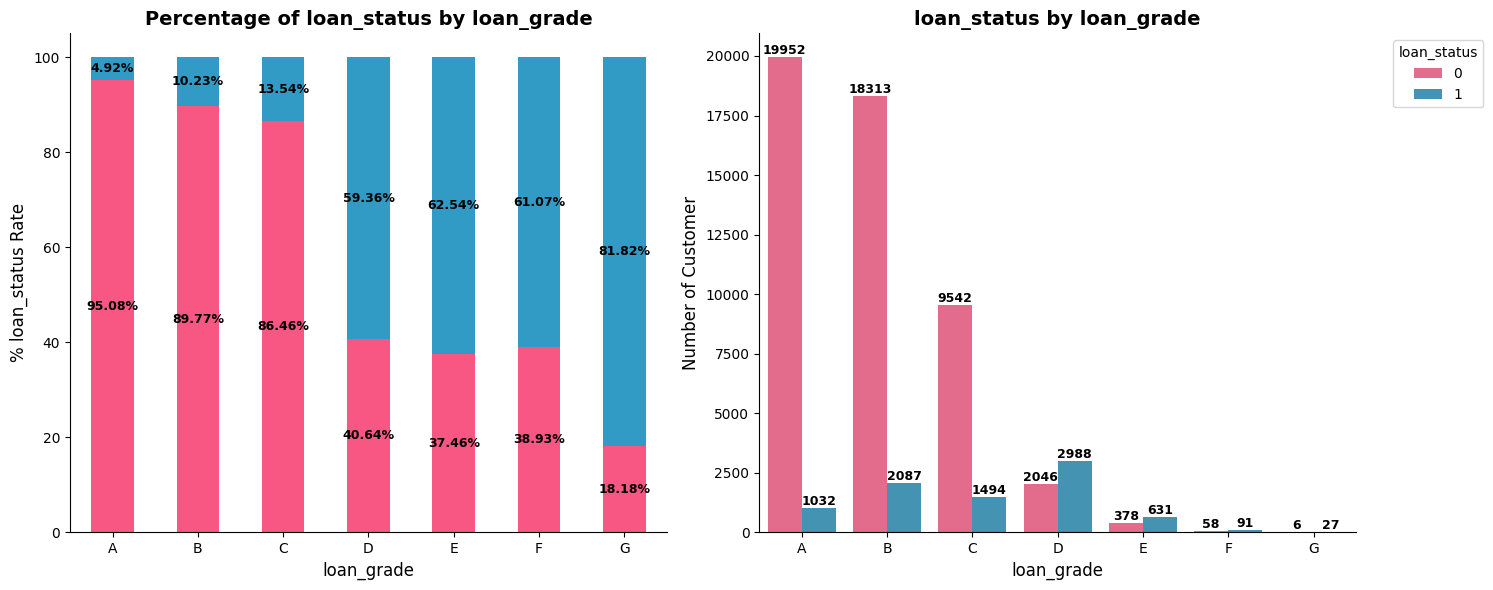


🔍 Chi-Square Test of Independence: 'loan_grade' vs. 'loan_status'
Chi-squared statistic: 12476.250
Degrees of freedom: 6
p-value: 0.000000
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'loan_grade' and 'loan_status'.

Standardized Residuals:
loan_status      0      1
loan_grade               
A            14.58 -35.78
B             6.18 -15.17
C             0.79  -1.95
D           -34.57  84.84
E           -16.57  40.66
F            -6.17  15.15
G            -4.19  10.29


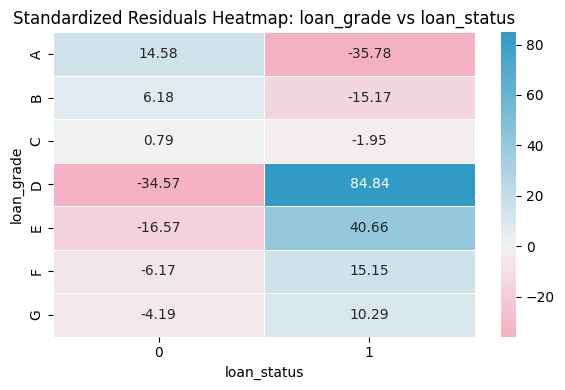

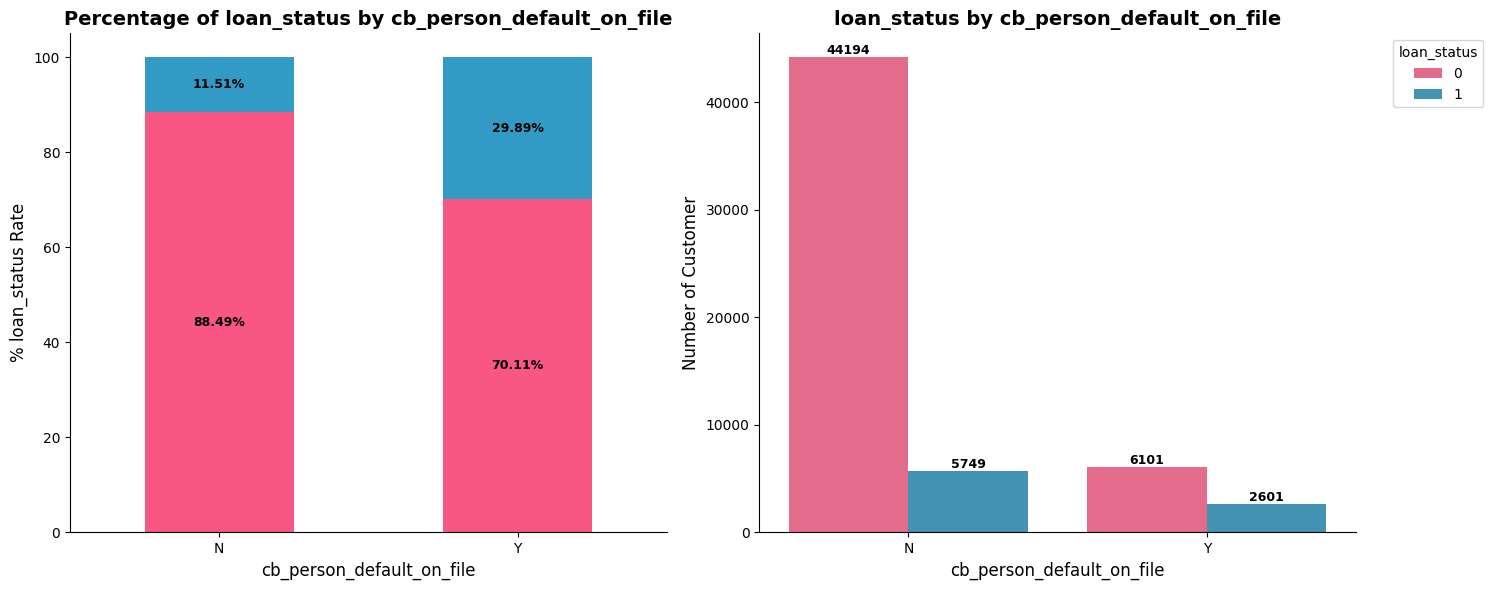


🔍 Chi-Square Test of Independence: 'cb_person_default_on_file' vs. 'loan_status'
Chi-squared statistic: 2048.412
Degrees of freedom: 1
p-value: 0.000000
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'cb_person_default_on_file' and 'loan_status'.

Standardized Residuals:
loan_status                    0      1
cb_person_default_on_file              
N                           6.58 -16.15
Y                         -15.77  38.69


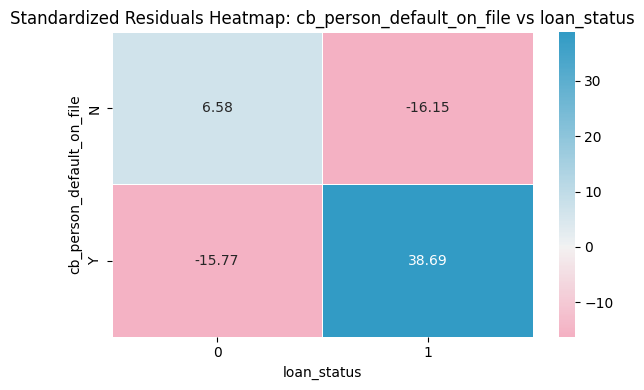

In [28]:
for feature in cat_features:
    if feature == "loan_intent":
        bivariate_percent_plot(cat=feature, df= df_train, rot=45)
    else:
        bivariate_percent_plot(cat=feature, df= df_train)

### Insight for Categorical Features vs loan_status

`person_home_ownership`

> People who rent their homes are more likely to be approved for loans.
> In contrast, those who own their homes or have a mortgage tend to be rejected more often.
> ⇒ This association is statistically significant (p-value < 0.05).

`loan_intent`

> **Loans for debt consolidation, home improvement, or medical reasons tend to be more likely to be approved.**
> In contrast, loans for **education, venture purposes, and even personal reasons** are often **rejected more than expected**.

`loan_grade`

> While intuition suggests that applicants with high loan grades (A/B) should be more likely to get approved, the data reveals that lower-grade loans (D–G) are actually approved more often than expected. This may indicate a policy that targets riskier loans with higher interest rates or a practical approval pattern that differs from traditional assumptions.

`cb_person_default_on_file`
>Although having previously defaulted is usually a negative factor, this group actually has a higher probability of loan approval.

## Multivariate Analysis

### Why do high-income individuals tend to be denied loans?

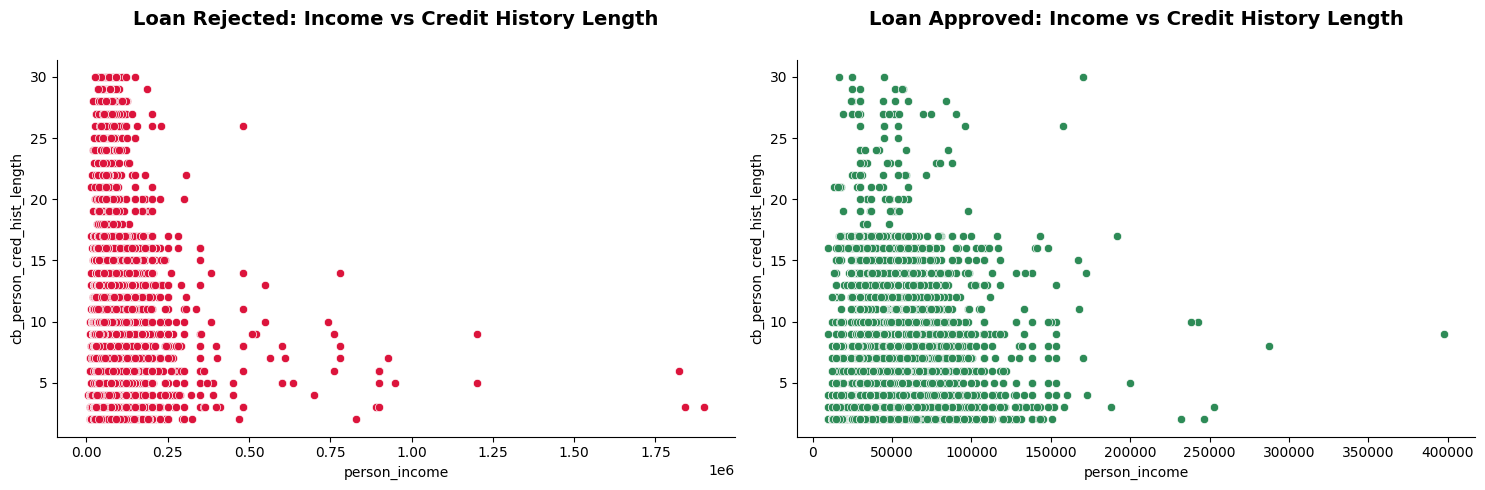

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(15, 5))
# ax[0]
sns.scatterplot(data=df_train[df_train["loan_status"] == 0], x="person_income",
                y="cb_person_cred_hist_length", ax=ax[0], color="crimson")
ax[0].set_title("Loan Rejected: Income vs Credit History Length",
                weight="bold", fontsize=14, pad=25)
sns.despine(ax=ax[0], top=True, right=True, left=False, bottom=False)

# ax[1]
sns.scatterplot(data=df_train[df_train["loan_status"] == 1], x="person_income",
                y="cb_person_cred_hist_length", ax=ax[1], color="seagreen")
ax[1].set_title("Loan Approved: Income vs Credit History Length",
                weight="bold", fontsize=14, pad=25)
sns.despine(ax=ax[1], top=True, right=True, left=False, bottom=False)

plt.tight_layout()
plt.show()

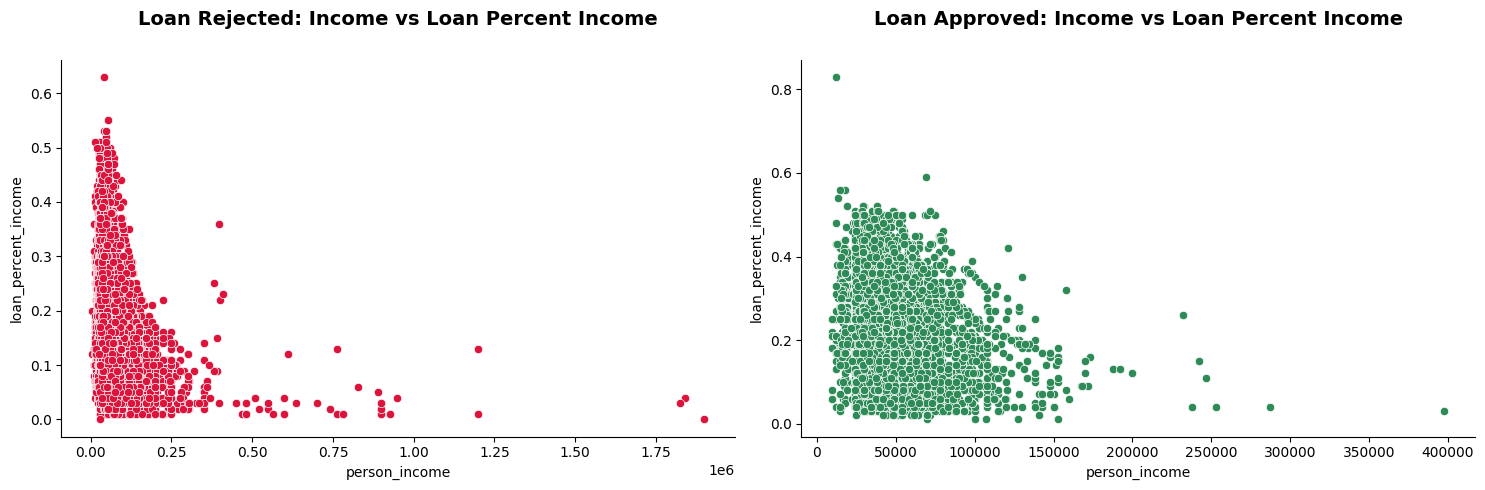

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(15, 5))
# ax[0]
sns.scatterplot(data=df_train[df_train["loan_status"] == 0], x="person_income",
                y="loan_percent_income", ax=ax[0], color="crimson")
ax[0].set_title("Loan Rejected: Income vs Loan Percent Income",
                weight="bold", fontsize=14, pad=25)
sns.despine(ax=ax[0], top=True, right=True, left=False, bottom=False)

# ax[1]
sns.scatterplot(data=df_train[df_train["loan_status"] == 1], x="person_income",
                y="loan_percent_income", ax=ax[1], color="seagreen")
ax[1].set_title("Loan Approved: Income vs Loan Percent Income",
                weight="bold", fontsize=14, pad=25)
sns.despine(ax=ax[1], top=True, right=True, left=False, bottom=False)

plt.tight_layout()
plt.show()

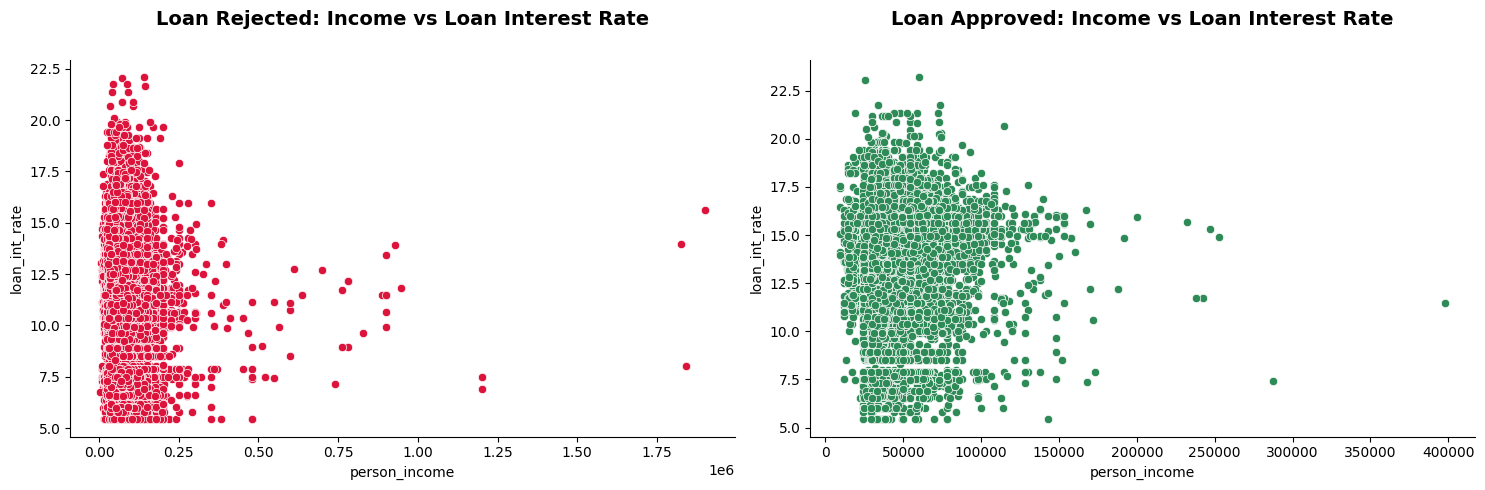

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(15, 5))
# ax[0]
sns.scatterplot(data=df_train[df_train["loan_status"] == 0], x="person_income",
                y="loan_int_rate", ax=ax[0], color="crimson")
ax[0].set_title("Loan Rejected: Income vs Loan Interest Rate",
                weight="bold", fontsize=14, pad=25)
sns.despine(ax=ax[0], top=True, right=True, left=False, bottom=False)

# ax[1]
sns.scatterplot(data=df_train[df_train["loan_status"] == 1], x="person_income",
                y="loan_int_rate", ax=ax[1], color="seagreen")
ax[1].set_title("Loan Approved: Income vs Loan Interest Rate",
                weight="bold", fontsize=14, pad=25)
sns.despine(ax=ax[1], top=True, right=True, left=False, bottom=False)

plt.tight_layout()
plt.show()

**Key Findings: High-Income Applicants and Loan Approval**

Despite having high income levels, some applicants still face loan rejection. Upon closer analysis, these individuals exhibit the following characteristics:

1. **Longer Credit History**
   High-income individuals tend to have **longer credit histories** compared to low-income applicants. This suggests they are more experienced with credit usage and have a longer financial track record.

2. **Lower Loan-to-Income Ratio**
   These applicants usually request loans that are **less than 20% of their income**, indicating a **conservative borrowing behavior**. The majority have a `loan_percent_income` well below 0.2.

3. **Lower Interest Rates**
   Approved high-income applicants often receive loans with **lower interest rates**, while low-income applicants tend to fall within higher interest brackets (e.g., 15–20%).

### Why do individuals with a history of bankruptcy tend to get approved more often?

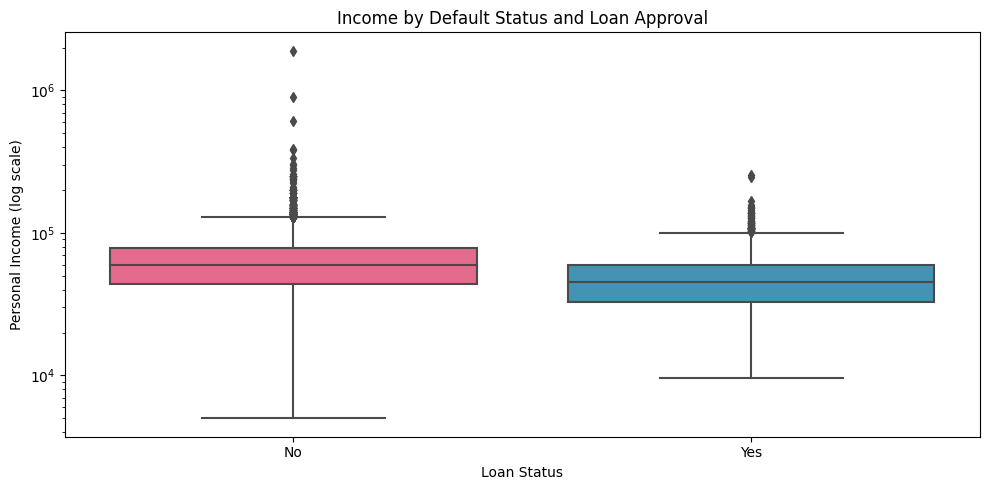

In [32]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_train[df_train["cb_person_default_on_file"] == "Y"],x="loan_status",
               y="person_income", palette=color(n_colors=2))

plt.yscale("log")  # Use log scale to handle income outliers
plt.title("Income by Default Status and Loan Approval")
plt.xlabel("Loan Status")
plt.ylabel("Personal Income (log scale)")
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.tight_layout()
plt.show()

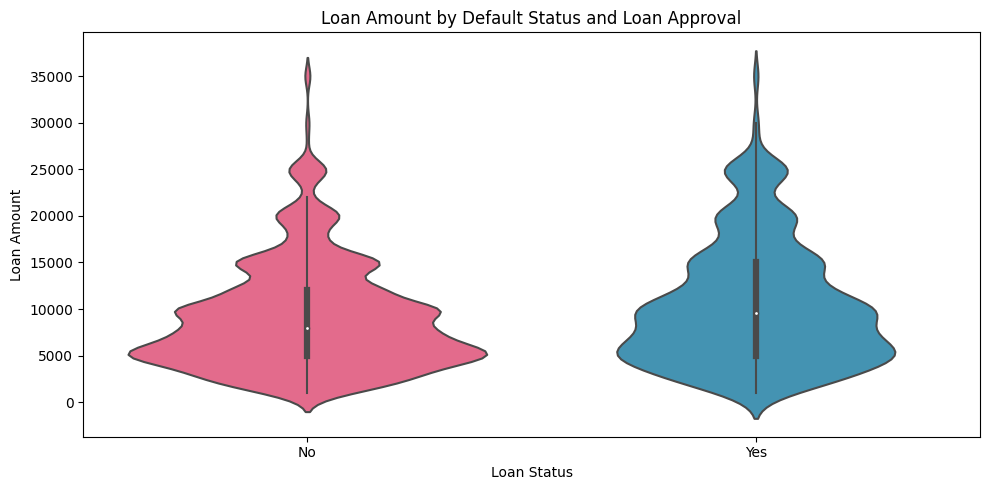

In [33]:
plt.figure(figsize=(10, 5))
sns.violinplot(data=df_train[df_train["cb_person_default_on_file"] == "Y"], x="loan_status",
            y="loan_amnt", palette=color(n_colors=2))
plt.title("Loan Amount by Default Status and Loan Approval")
plt.xlabel("Loan Status")
plt.ylabel("Loan Amount")
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.tight_layout()
plt.show()


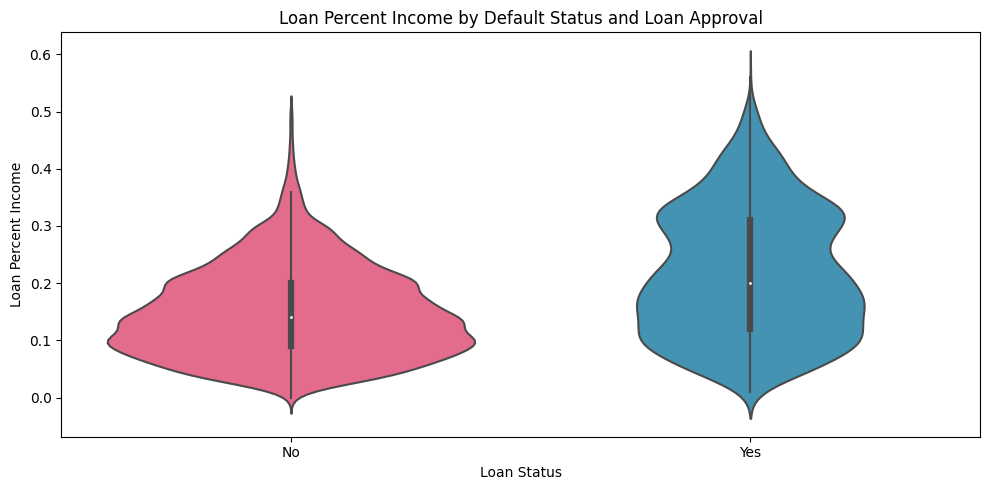

In [34]:
plt.figure(figsize=(10, 5))
sns.violinplot(data=df_train[df_train["cb_person_default_on_file"] == "Y"],
            y="loan_percent_income", x="loan_status", palette=color(n_colors=2))
plt.title("Loan Percent Income by Default Status and Loan Approval")
plt.xlabel("Loan Status")
plt.ylabel("Loan Percent Income")
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.tight_layout()
plt.show()


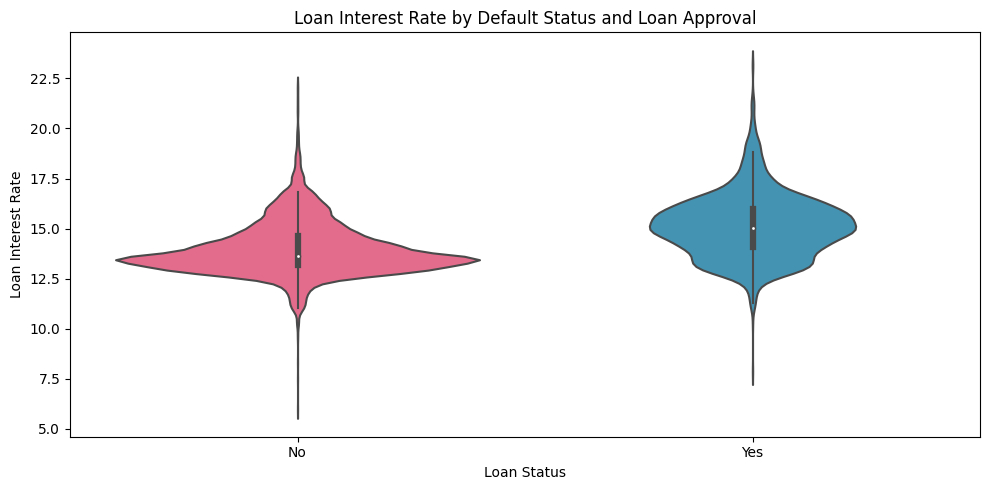

In [35]:
plt.figure(figsize=(10, 5))
sns.violinplot(data=df_train[df_train["cb_person_default_on_file"] == "Y"],
            y="loan_int_rate", x="loan_status", palette=color(n_colors=2))
plt.title("Loan Interest Rate by Default Status and Loan Approval")
plt.xlabel("Loan Status")
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.ylabel("Loan Interest Rate")
plt.tight_layout()
plt.show()


**Key Findings**

Among applicants who have previously defaulted (`cb_person_default_on_file = "Y"`), those who still get approved exhibit the following characteristics:

1. **Lower Personal Income**
   Their income is generally **lower than those who are rejected**, despite having a history of default.

2. **Higher Loan Amounts**
   These approved applicants tend to **borrow larger amounts** compared to those who are rejected.

3. **Higher Loan-to-Income Ratio**
   Rejected applicants in this group often request **smaller loans relative to their income**, while approved applicants accept **higher loan burdens**.

4. **Higher Interest Rates**
   Approved individuals also tend to receive loans with **higher interest rates**, possibly as a trade-off for their risk profile.

### Why do individuals who rent or have a mortgage tend to get approved for loans more often?

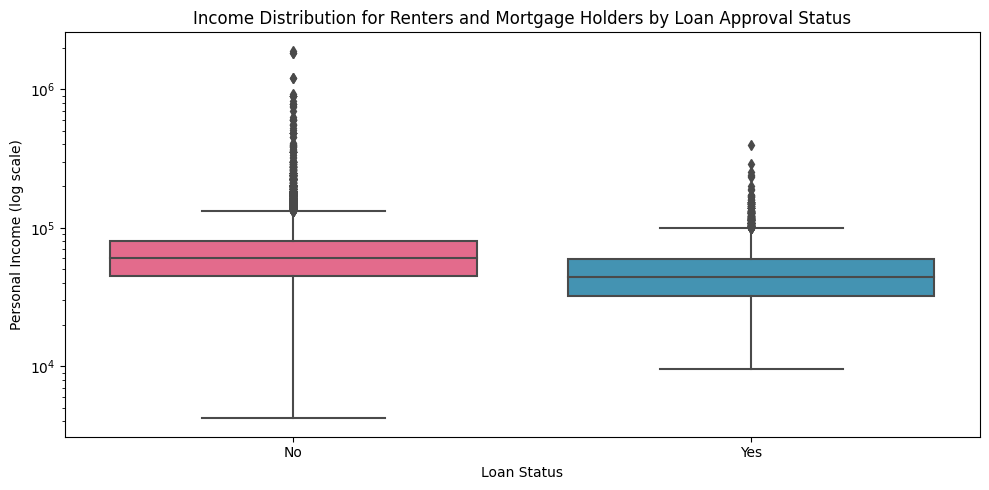

In [36]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=df_train[(df_train["person_home_ownership"] == "RENT") | 
                  (df_train["person_home_ownership"] == "MORTGAGE")],
    y="person_income", 
    x="loan_status", 
    palette=color(n_colors=2)
)
plt.yscale("log")  # Use log scale to handle income outliers
plt.title("Income Distribution for Renters and Mortgage Holders by Loan Approval Status")
plt.xlabel("Loan Status")
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.ylabel("Personal Income (log scale)")
plt.tight_layout()
plt.show()

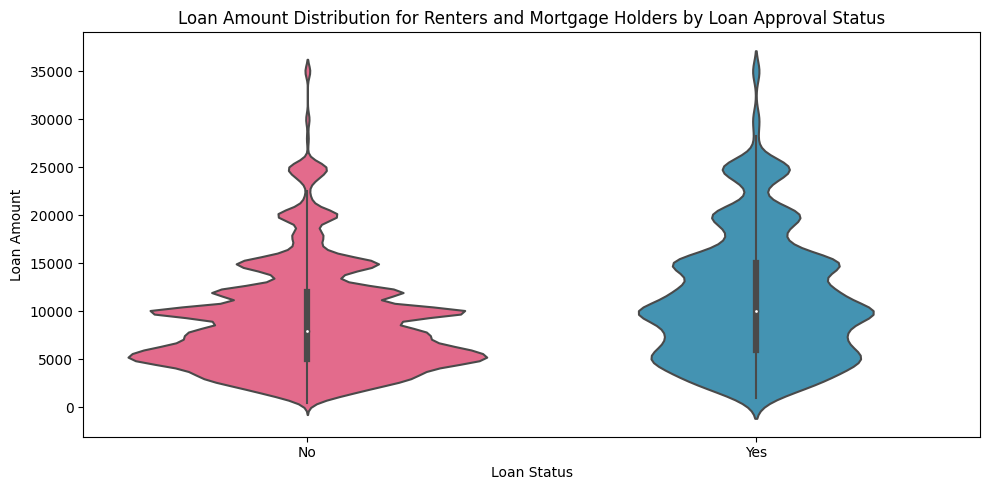

In [37]:
plt.figure(figsize=(10, 5))
sns.violinplot(
    data=df_train[(df_train["person_home_ownership"] == "RENT") | 
                  (df_train["person_home_ownership"] == "MORTGAGE")],
    y="loan_amnt", 
    x="loan_status", 
    palette=color(n_colors=2)
)
plt.title("Loan Amount Distribution for Renters and Mortgage Holders by Loan Approval Status")
plt.ylabel("Loan Amount")
plt.xlabel("Loan Status")
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.tight_layout()
plt.show()

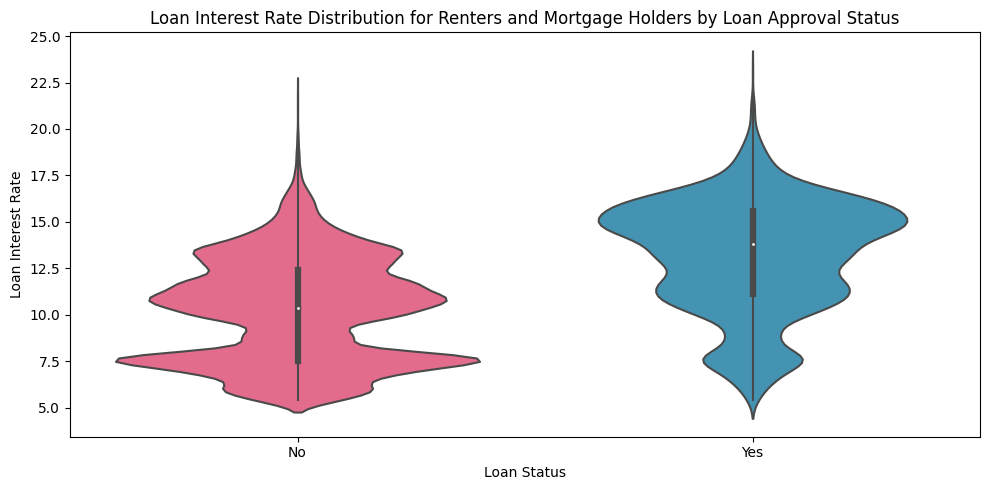

In [38]:
plt.figure(figsize=(10, 5))
sns.violinplot(
    data=df_train[(df_train["person_home_ownership"] == "RENT") | 
                  (df_train["person_home_ownership"] == "MORTGAGE")],
    y="loan_int_rate", 
    x="loan_status", 
    palette=color(n_colors=2)
)
plt.title("Loan Interest Rate Distribution for Renters and Mortgage Holders by Loan Approval Status")
plt.xlabel("Loan Status")
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.ylabel("Loan Interest Rate")
plt.tight_layout()
plt.show()

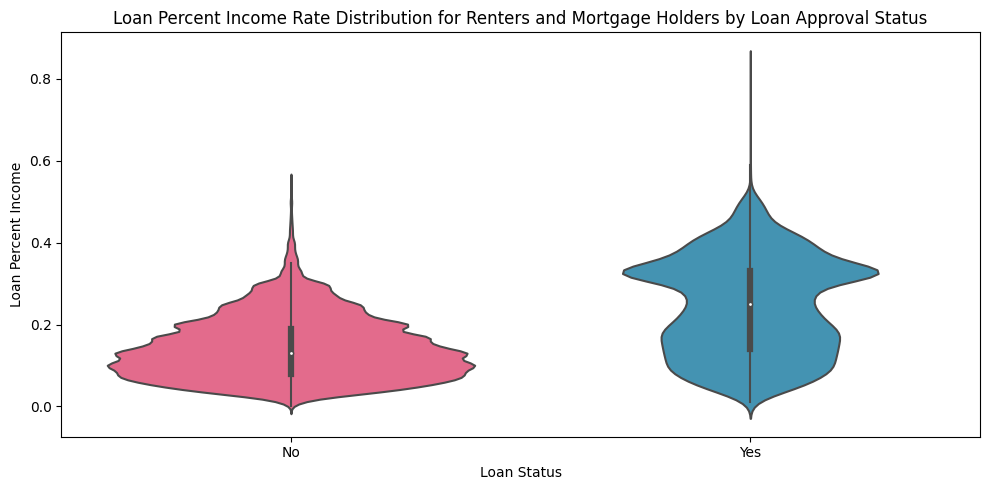

In [39]:
plt.figure(figsize=(10, 5))
sns.violinplot(
    data=df_train[(df_train["person_home_ownership"] == "RENT") | 
                  (df_train["person_home_ownership"] == "MORTGAGE")],
    y="loan_percent_income", 
    x="loan_status", 
    palette=color(n_colors=2)
)
plt.title("Loan Percent Income Rate Distribution for Renters and Mortgage Holders by Loan Approval Status")
plt.xlabel("Loan Status")
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.ylabel("Loan Percent Income")
plt.tight_layout()
plt.show()

**Key Findings**

**Applicants who rent or have a mortgage tend to be approved for loans more often, and they share the following characteristics:**

1. Their **personal income is lower** compared to those who are not approved.
2. They **borrow larger loan amounts** than rejected applicants.
3. They are offered **higher loan interest rates**.
4. Rejected applicants tend to **request smaller loans relative to their income** (lower **loan_percent_income**).

### Why do applicants with good loan grades tend to be rejected for loans?

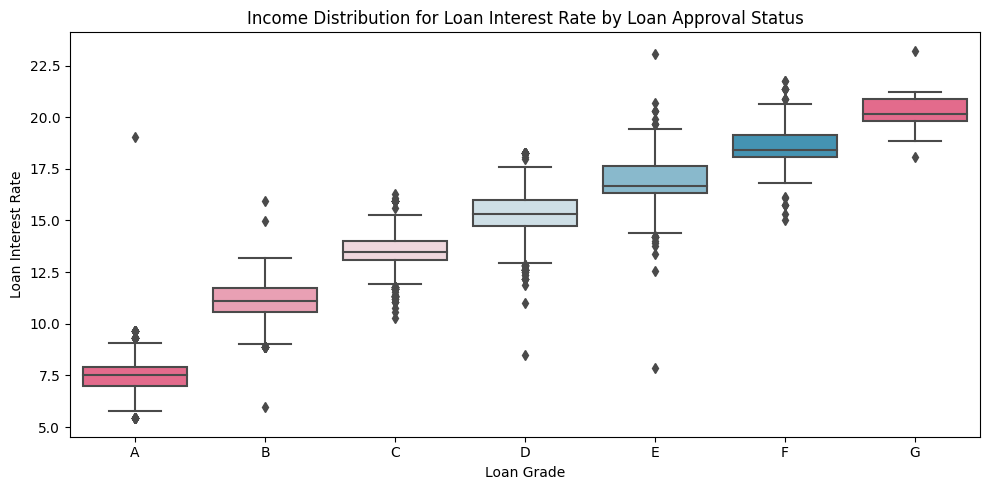

In [40]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=df_train[df_train["loan_status"] == 1],
    x = "loan_grade",
    y="loan_int_rate",
    order=["A", "B", "C", "D", "E", "F", "G"],
    palette=color(n_colors=df_train["loan_intent"].nunique())
)
plt.title("Income Distribution for Loan Interest Rate by Loan Approval Status")
plt.xlabel("Loan Grade")
plt.ylabel("Loan Interest Rate")
plt.tight_layout()
plt.show()

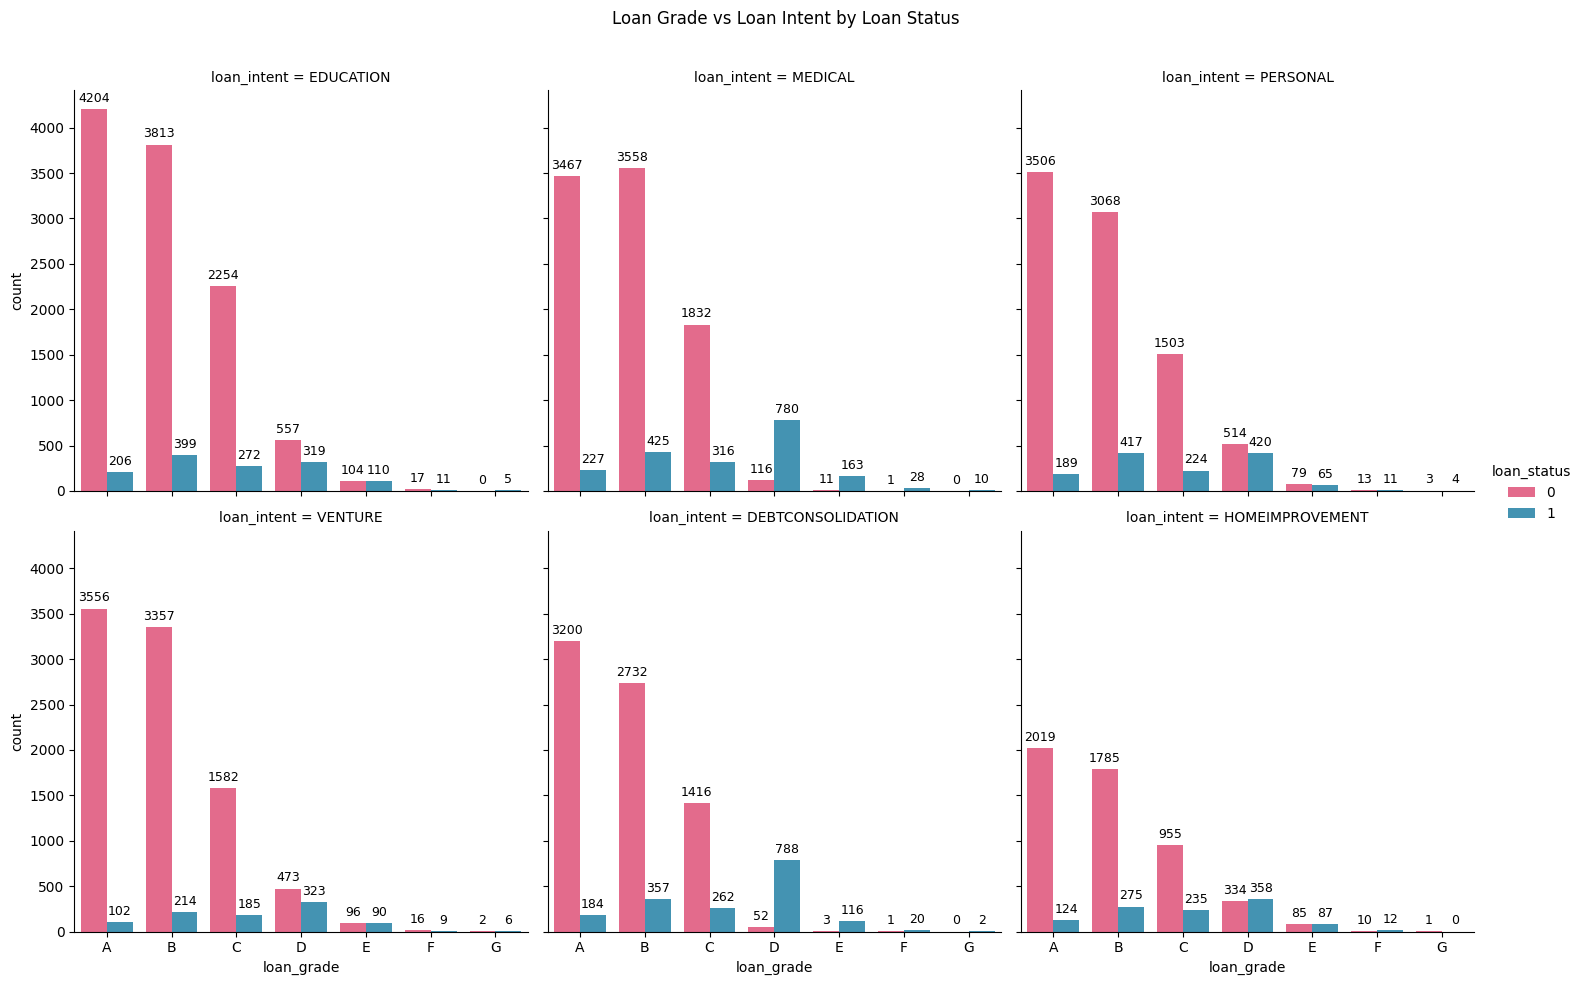

In [41]:
g = sns.catplot(
    data=df_train,
    x="loan_grade",
    hue="loan_status",
    col="loan_intent",
    kind="count",
    col_wrap=3,
    palette=color(n_colors=2),
    order=sorted(df_train["loan_grade"].unique())
)

# Thêm tiêu đề chính
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Loan Grade vs Loan Intent by Loan Status")

# Thêm số đếm trên từng cột
for ax in g.axes.flatten():
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=9)

**Key Findings**

**Applicants with lower creditworthiness (Loan Grades D–G) who are more likely to get their loans approved tend to share the following characteristics:**

1. **They are offered higher loan interest rates**, reflecting their higher credit risk.
2. **Their loan intents are primarily for MEDICAL, HOME IMPROVEMENT, or DEBT CONSOLIDATION purposes**, which may indicate essential or urgent financial needs.

### Loan applications citing purposes like MEDICAL, HOME IMPROVEMENT, or DEBT CONSOLIDATION are more likely to be approved.

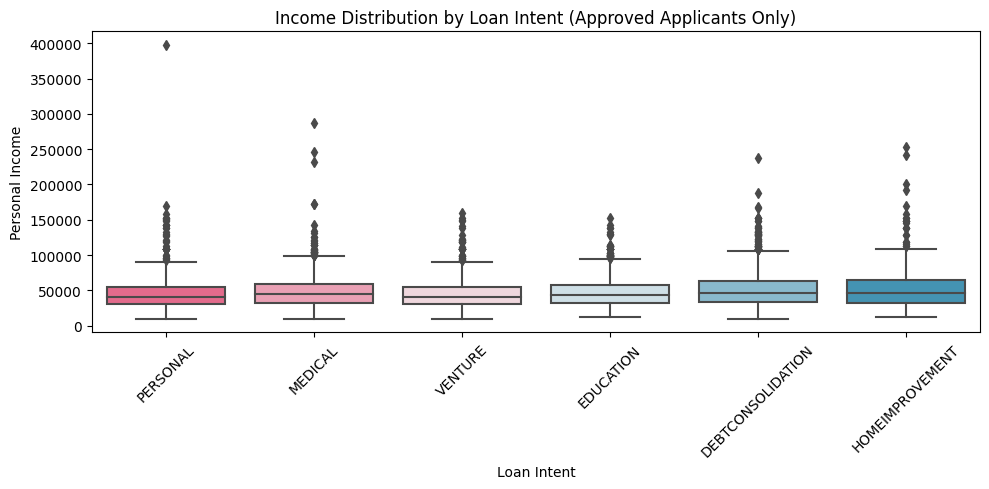

In [42]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=df_train[df_train["loan_status"] == 1],
    x="loan_intent",
    y="person_income",
    palette=color(n_colors=df_train["loan_intent"].nunique()))

plt.title("Income Distribution by Loan Intent (Approved Applicants Only)")
plt.xlabel("Loan Intent")
plt.ylabel("Personal Income")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

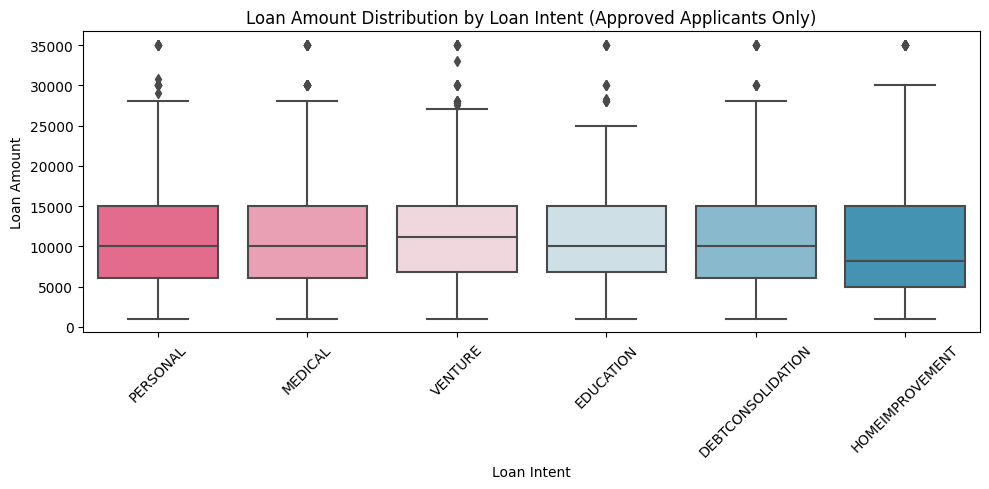

In [43]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=df_train[df_train["loan_status"] == 1],
    x="loan_intent",
    y="loan_amnt",
    palette=color(n_colors=df_train["loan_intent"].nunique()))

plt.title("Loan Amount Distribution by Loan Intent (Approved Applicants Only)")
plt.xlabel("Loan Intent")
plt.ylabel("Loan Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

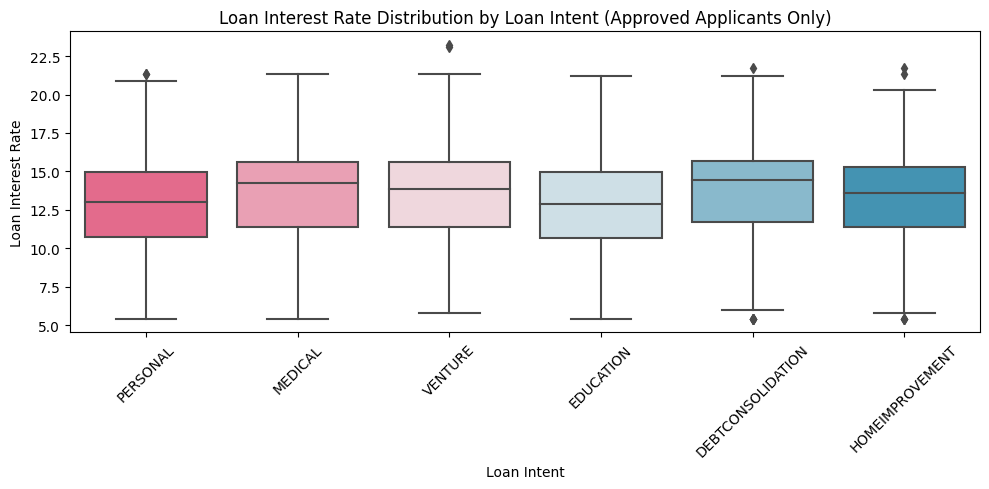

In [44]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=df_train[df_train["loan_status"] == 1],
    x="loan_intent",
    y="loan_int_rate",
    palette=color(n_colors=df_train["loan_intent"].nunique()))

plt.title("Loan Interest Rate Distribution by Loan Intent (Approved Applicants Only)")
plt.xlabel("Loan Intent")
plt.ylabel("Loan Interest Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Key finding:**

**Borrowers with loan purposes such as MEDICAL, HOME IMPROVEMENT, or DEBT CONSOLIDATION tend to have characteristics that increase their chances of loan approval:**

1. Their **personal incomes** are generally **higher** than those of other loan intent groups.
2. The **loan amounts** for these borrowers are also **higher** compared to other groups.
3. They are typically subject to **higher interest rates**.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preprocessing</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Preprocessing
    </h1>
</div>


## Handling Missing Value

In [45]:
displayNULL(df=df_origin, dataset_name="Origin Data")

🔎 Missing Value Summary for: Origin Data
+-------------------+---------------+-----------+
| Feature           | Missing_Count | Missing_% |
+-------------------+---------------+-----------+
| loan_int_rate     | 3116          | 9.56      |
| person_emp_length | 895           | 2.75      |
+-------------------+---------------+-----------+

⚠️  Total missing values: 4,011 out of 32,581 rows.


**Reasons to impute using **median** instead of dropping:**

* The missing rate is **not too high** (less than 10% for both columns).
* Dropping rows would result in the loss of over **4,000 rows (\~12%)** of the dataset.
* Both columns are **numerical features**, so using the **median** is safer as it reduces the impact of **outliers**.

In [46]:
df_origin["loan_int_rate"].fillna(df_origin["loan_int_rate"].median(), inplace=True)
df_origin["person_emp_length"].fillna(df_origin["person_emp_length"].median(), inplace=True)

In [47]:
print("Missing value train dataset: ")
displayNULL(df_train, dataset_name="Train Set")

print("Missing value Origin dataset: ")
displayNULL(df_origin, dataset_name="Origin Set")

print("\nMissing value test dataset: ")
displayNULL(df_test, dataset_name="Test Set")

Missing value train dataset: 
🔎 Missing Value Summary for: Train Set
✅ No missing values detected in 58,645 rows.
Missing value Origin dataset: 
🔎 Missing Value Summary for: Origin Set
✅ No missing values detected in 32,581 rows.

Missing value test dataset: 
🔎 Missing Value Summary for: Test Set
✅ No missing values detected in 39,098 rows.


In [48]:
df_combined = pd.concat([df_train, df_origin], axis=0, ignore_index=True)
datasets = {
    "Combined Data": df_combined
}

duplicate_summary = {}
for name, data in datasets.items():
    check_duplicates_report(data, name)
    duplicate_summary[name] = {
        "duplicates": data.duplicated().sum(),
        "total_rows": len(data)
    }
    print()

🔍 Combined Data Duplicate Analysis
⚠️  166 duplicates found (0.18%)
    Total rows affected: 166/91,226



In [49]:
# Remove dupplicate
df_combined = df_combined.drop_duplicates()
print(f"Combined dataset shape: {df_combined.shape}")

Combined dataset shape: (91060, 12)


- To leverage all available information, the synthetic **training data** and the **original dataset** were combined after aligning their columns by dropping the `id` column from the training data.  
- This resulted in a comprehensive dataset of **91060 samples and 12 features**, enhancing data volume.

### Handling Skewness

In [50]:
skew_feature_combined, skew_combined_df = check_skewness(data=df_combined, dataset_name="Combined Data",
                                                   numerical_features=num_features)


🔍 Skewness for Combined Data:
----------------------------------------------------------------------
Feature                        | Skewness  | Remark
----------------------------------------------------------------------
person_income                  |  +28.7944 | Highly skewed
person_emp_length              |   +2.2881 | Highly skewed
person_age                     |   +2.2104 | Highly skewed
cb_person_cred_hist_length     |   +1.6332 | Highly skewed
loan_amnt                      |   +1.2071 | Highly skewed
loan_percent_income            |   +1.0144 | Highly skewed
loan_int_rate                  |   +0.2091 | Approximately symmetric
----------------------------------------------------------------------


In [51]:
skew_feature_test, skew_test_df = check_skewness(data=df_test, dataset_name="Test Data",
                                                 numerical_features=num_features)


🔍 Skewness for Test Data:
----------------------------------------------------------------------
Feature                        | Skewness  | Remark
----------------------------------------------------------------------
person_income                  |  +10.4465 | Highly skewed
person_age                     |   +1.9425 | Highly skewed
cb_person_cred_hist_length     |   +1.6541 | Highly skewed
loan_amnt                      |   +1.2044 | Highly skewed
person_emp_length              |   +1.1638 | Highly skewed
loan_percent_income            |   +0.9391 | Moderately skewed
loan_int_rate                  |   +0.1853 | Approximately symmetric
----------------------------------------------------------------------


In [52]:
from sklearn.preprocessing import PowerTransformer

def handle_skewed_features(
    df,
    zero_threshold=0.9,
    skew_threshold=0.5,
    num_features=None,
    exclude_cols=None
    
):
    """
    Handle skewed numerical features by applying appropriate transformations,
    *forcing* certain columns to be transformed even if they don't exceed skew_threshold.

    Parameters:
    - df: pandas.DataFrame
    - zero_threshold: float (default=0.9)
    - skew_threshold: float (default=0.5)
    - num_features: list of numerical columns to consider
    - exclude_cols: list of columns to skip entirely
    - dataset: Name of dataset

    Returns:
    - df: transformed DataFrame
    - transformed_cols: list of new feature names
    - high_zero_cols: list of sparse features (> zero_threshold)
    - skewed_cols: list of auto‑detected skewed features
    - pt_dict: dict mapping each YJ‑transformed col → its PowerTransformer
    """
    df = df.copy()
    if num_features is None:
        raise ValueError("`num_features` must be provided")
    if exclude_cols is None:
        exclude_cols = []


    # 1) pick the numeric cols to scan
    numerical_cols = [c for c in num_features if c not in exclude_cols]

    # 2) detect ultra‑sparse
    zero_ratios = (df[numerical_cols] == 0).sum() / len(df)
    high_zero_cols = zero_ratios[zero_ratios > zero_threshold].index.tolist()
    
    # 3) compute skew
    skew_vals = df[numerical_cols].apply(lambda s: skew(s.dropna()))
    auto_skewed = skew_vals[abs(skew_vals) > skew_threshold].index.tolist()

    # 4) union these with your forced list
    to_transform = list(set(auto_skewed))

    transformed_cols = []
    dropped_cols     = []

    for col in to_transform:
        # if it's sparse → binary+log
        if col in high_zero_cols:
            df[f"Has_{col}"] = (df[col] > 0).astype(int)
            df[f"Log_{col}"] = df[col].map(lambda x: np.log1p(x) if x > 0 else 0)
            transformed_cols += [f"Has_{col}", f"Log_{col}"]
            dropped_cols.append(col)
        # if it's discrete small‑cardinality, skip transform but keep
        elif df[col].nunique() <= 5:
            # do nothing (we still keep raw col in df)
            print("AAA")
            continue
        # otherwise apply Yeo‑Johnson
        else:
            pt = PowerTransformer(method="yeo-johnson")
            arr = df[[col]].values  # shape (n,1)
            df[f"PT_{col}"] = pt.fit_transform(arr)
            transformed_cols.append(f"PT_{col}")
            dropped_cols.append(col)

    # drop originals for any column we did transform
    df.drop(columns=dropped_cols, inplace=True)

    return df, transformed_cols, high_zero_cols, auto_skewed

In [53]:
processed_combined_df, transformed_columns, sparse_columns, skewed_columns = handle_skewed_features(df=df_combined, num_features=skew_feature_combined)

In [54]:
num_features

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [55]:
num_features = ["PT_cb_person_cred_hist_length", "PT_person_age", "PT_person_income",
                "PT_loan_percent_income", "PT_person_emp_length", "PT_loan_amnt", "loan_int_rate"]
skew_feature_combined, skew_combined_df = check_skewness(data=processed_combined_df, numerical_features=num_features,
                                                   dataset_name= "Combined data")


🔍 Skewness for Combined data:
----------------------------------------------------------------------
Feature                        | Skewness  | Remark
----------------------------------------------------------------------
loan_int_rate                  |   +0.2091 | Approximately symmetric
PT_person_age                  |   +0.1638 | Approximately symmetric
PT_cb_person_cred_hist_length  |   +0.0940 | Approximately symmetric
PT_loan_percent_income         |   +0.0825 | Approximately symmetric
PT_person_emp_length           |   -0.0428 | Approximately symmetric
PT_loan_amnt                   |   -0.0144 | Approximately symmetric
PT_person_income               |   -0.0140 | Approximately symmetric
----------------------------------------------------------------------


In [56]:
processed_test_df, transformed_columns_test, sparse_columns_test, skewed_columns_test = handle_skewed_features(df=df_test, num_features=skew_feature_test)

skew_feature_test, skew_test_df = check_skewness(data=processed_test_df, numerical_features=num_features,
                                                   dataset_name= "Test data")


🔍 Skewness for Test data:
----------------------------------------------------------------------
Feature                        | Skewness  | Remark
----------------------------------------------------------------------
loan_int_rate                  |   +0.1853 | Approximately symmetric
PT_person_age                  |   +0.1653 | Approximately symmetric
PT_cb_person_cred_hist_length  |   +0.0936 | Approximately symmetric
PT_loan_percent_income         |   +0.0762 | Approximately symmetric
PT_person_emp_length           |   -0.0530 | Approximately symmetric
PT_person_income               |   -0.0128 | Approximately symmetric
PT_loan_amnt                   |   -0.0113 | Approximately symmetric
----------------------------------------------------------------------


**Observations from the Skewness Table (`processed_combined_df` and `processed_test_df`):**

🔴 **Skewed**:

* The features `person_age`, `cb_person_cred_hist_length`, `loan_percent_income`, `person_emp_length`, `person_income`, `loan_amnt` exhibit skewness.

✅ **Approximately Symmetric**:

* Several features, such as:

  * `PT_person_age`, `PT_cb_person_cred_hist_length`, `PT_loan_percent_income`, `PT_person_emp_length`, `PT_person_income` and `PT_loan_amnt` close to zero.
  * This indicates that **Yeo-Johnson transformation was effective** for this feature.

## Re-Checking Outlier

In [57]:
checking_outlier(list_feature=num_features, df=processed_combined_df, dataset_name="Combined data")

🔍 Combined data Checking outlier


Feature  Outlier Count
0      PT_person_income           1202
1  PT_person_emp_length            103
2          PT_loan_amnt            357
3         loan_int_rate             69

In [58]:
checking_outlier(list_feature=num_features, df=processed_test_df, dataset_name="Test data")

🔍 Test data Checking outlier


Feature  Outlier Count
0      PT_person_income            376
1  PT_person_emp_length             39
2          PT_loan_amnt            121
3         loan_int_rate             11

- Both **processed_combined_df** and **processed_test_df** datasets contain **notable outliers** in `PT_person_income`, `PT_person_emp_length`, `PT_loan_amnt` and `loan_int_rate`. 
- This verification step is essential after merging the origin data into the training dataset. Additionally, we need to use a **Robust Scaler** for features that are affected by outliers.

In [59]:
processed_combined_df["cb_person_default_on_file"] = processed_combined_df["cb_person_default_on_file"].map({"N": 0, "Y": 1})
processed_test_df["cb_person_default_on_file"] = processed_test_df["cb_person_default_on_file"].map({"N": 0, "Y": 1})

## Create Test Set

Suppose we chatted with experts who told us that the **loan_int_rate** is a very important attribute to predict **loan_status**. We may want to ensure that the test set is representative of the various categories of **loan_int_rate** in the whole dataset. Since the **loan_int_rate** is a continuous numerical attribute, we first need to create an category attribute.

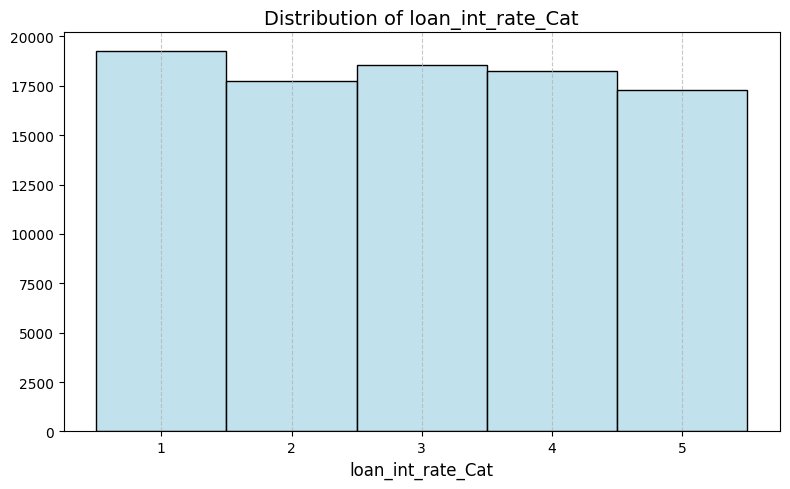

In [60]:
processed_combined_df["loan_int_rate_Cat"] = pd.qcut(processed_combined_df["loan_int_rate"],
                                              q=5,
                                              labels=[1, 2, 3, 4, 5])

plt.figure(figsize=(8, 5))
sns.histplot(data=processed_combined_df, x="loan_int_rate_Cat", color="lightblue", edgecolor="black")

plt.title("Distribution of loan_int_rate_Cat", fontsize=14)
plt.xlabel("loan_int_rate_Cat", fontsize=12)
plt.ylabel("")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [61]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(processed_combined_df, processed_combined_df["loan_int_rate_Cat"]):
    start_train_set = processed_combined_df.iloc[train_index]
    start_test_set = processed_combined_df.iloc[test_index]

## Scale and Ecode

In [62]:
# Now we should remove the loan_int_rate_Cat attribute so the data is back to its original state:
for set_ in (start_train_set, start_test_set): 
    set_.drop("loan_int_rate_Cat", axis=1, inplace=True)

In [63]:
df_train_new = start_train_set.drop("loan_status", axis=1)
df_train_label_new = start_train_set["loan_status"].copy()

In [64]:
list_feature_num_robust = ["PT_person_income","PT_person_emp_length", "PT_loan_amnt",  "loan_int_rate"]
list_feature_num_stand = ["PT_cb_person_cred_hist_length", "PT_person_age", "PT_loan_percent_income"]
list_feature_cat_onehot = ["person_home_ownership", "loan_intent", "loan_grade"]
list_feature_cat_keep = ["cb_person_default_on_file"]

In [65]:
num_robust_transformer = Pipeline(steps=[
    ("scaler", RobustScaler())
])

num_stand_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

cat_onehot_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

cat_keep_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent"))
])

In [66]:
preprocessor = ColumnTransformer(transformers=[
    ("num_robust", num_robust_transformer, list_feature_num_robust),
    ("num_standard", num_stand_transformer, list_feature_num_stand),
    ("cat_onehot", cat_onehot_transformer, list_feature_cat_onehot),
    ("cat_keep", cat_keep_transformer, list_feature_cat_keep),
])

preprocessor.fit(df_train_new)

ColumnTransformer(transformers=[('num_robust',
                                 Pipeline(steps=[('scaler', RobustScaler())]),
                                 ['PT_person_income', 'PT_person_emp_length',
                                  'PT_loan_amnt', 'loan_int_rate']),
                                ('num_standard',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['PT_cb_person_cred_hist_length',
                                  'PT_person_age', 'PT_loan_percent_income']),
                                ('cat_onehot',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['person_home_ownership', 'loan_intent',
                                  'loan_grade']),
                                ('cat_keep',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['cb_person_default_on_file'])])

In [67]:
df_train_new_prepared = preprocessor.transform(df_train_new)
list_feature_prepared = preprocessor.get_feature_names_out().tolist()
list_feature_prepared

['num_robust__PT_person_income',
 'num_robust__PT_person_emp_length',
 'num_robust__PT_loan_amnt',
 'num_robust__loan_int_rate',
 'num_standard__PT_cb_person_cred_hist_length',
 'num_standard__PT_person_age',
 'num_standard__PT_loan_percent_income',
 'cat_onehot__person_home_ownership_MORTGAGE',
 'cat_onehot__person_home_ownership_OTHER',
 'cat_onehot__person_home_ownership_OWN',
 'cat_onehot__person_home_ownership_RENT',
 'cat_onehot__loan_intent_DEBTCONSOLIDATION',
 'cat_onehot__loan_intent_EDUCATION',
 'cat_onehot__loan_intent_HOMEIMPROVEMENT',
 'cat_onehot__loan_intent_MEDICAL',
 'cat_onehot__loan_intent_PERSONAL',
 'cat_onehot__loan_intent_VENTURE',
 'cat_onehot__loan_grade_A',
 'cat_onehot__loan_grade_B',
 'cat_onehot__loan_grade_C',
 'cat_onehot__loan_grade_D',
 'cat_onehot__loan_grade_E',
 'cat_onehot__loan_grade_F',
 'cat_onehot__loan_grade_G',
 'cat_keep__cb_person_default_on_file']

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Define Metric</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Define Metric
    </h1>
</div>

| Metric        | Definition                                                  | Meaning in Attrition Context                                          |
| ------------- | ----------------------------------------------------------- | --------------------------------------------------------------------- |
| **Recall**    | $\frac{TP}{TP + FN}$                                        | **Most important** – how many true leavers you can catch              |
| **Precision** | $\frac{TP}{TP + FP}$                                        | Among predicted leavers, how many are actually correct                |
| **Accuracy**  | $\frac{TP + TN}{Total}$                                     | Can be misleading with imbalanced data (e.g., <20% attrition)         |
| **F1-score**  | $\frac{2 \cdot Precision \cdot Recall}{Precision + Recall}$ | Balanced trade-off between Precision and Recall                       |
| **AUC-ROC**   | Area under ROC Curve                                        | Measures ability to distinguish leavers vs. stayers at all thresholds |

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Comparison Models</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Comparison Models
    </h1>
</div>

In [68]:
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier, RidgeClassifierCV
from catboost import CatBoostClassifier

seed = 42
max_iter = 50000

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
models = [
    LinearSVC(max_iter=max_iter, random_state=seed, class_weight="balanced"),    
    SVC(kernel="rbf", random_state=seed, class_weight="balanced"),
    KNeighborsClassifier(metric="minkowski", p=2, n_neighbors=5),
    GaussianNB(),
    LogisticRegression(solver="liblinear", max_iter=max_iter, random_state=seed, class_weight="balanced"),
    DecisionTreeClassifier(max_depth=5, random_state=seed, class_weight="balanced"),
    RandomForestClassifier(n_estimators=100, random_state=seed, class_weight="balanced"),
    ExtraTreesClassifier(random_state=seed, class_weight="balanced"),
    AdaBoostClassifier(random_state=seed),
    XGBClassifier(
        n_estimators=2000, max_depth=4, eval_metric="logloss", random_state=seed,
        min_child_weight=2, gamma=0.9, subsample=0.8, colsample_bytree=0.8,
        objective="binary:logistic", nthread=-1, scale_pos_weight=4.9 
    ),
    MLPClassifier(max_iter=max_iter, random_state=seed),
    GradientBoostingClassifier(random_state=seed),
    RidgeClassifier(alpha=1.0, random_state=seed, max_iter=max_iter, class_weight="balanced"),
    RidgeClassifierCV(alphas=[0.1, 0.5, 1.0], cv=kfold, class_weight="balanced"),
    CatBoostClassifier(verbose=0, random_seed=seed, scale_pos_weight=4.9),
    BaggingClassifier(random_state=seed)
]

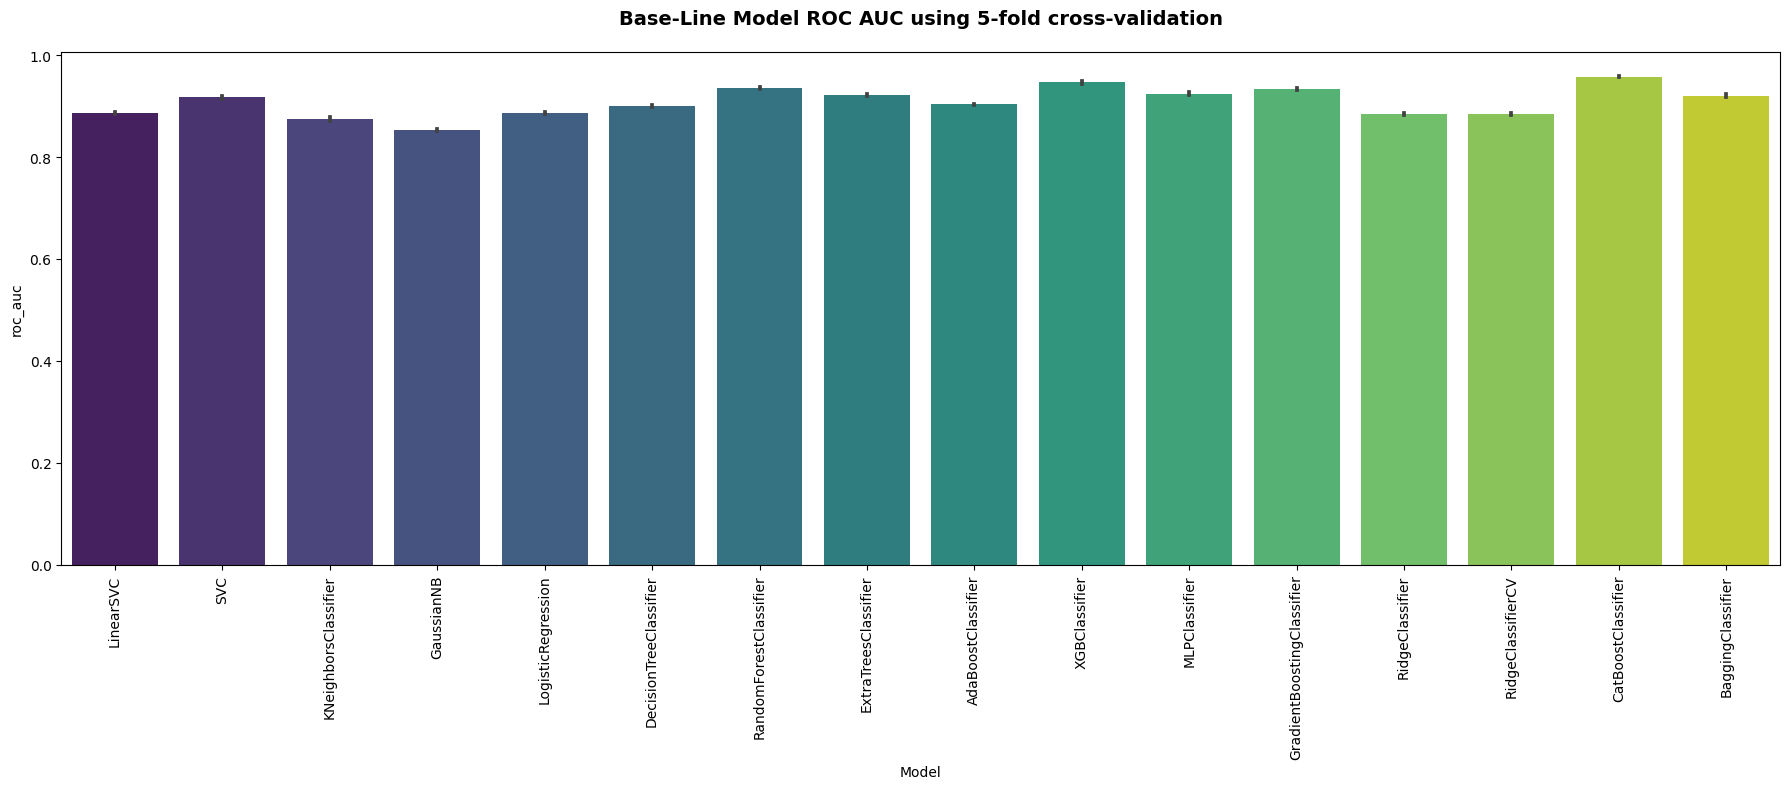

Mean  Standard Deviation
model_name                                              
CatBoostClassifier          0.957489            0.001369
XGBClassifier               0.946383            0.002945
RandomForestClassifier      0.935775            0.002501
GradientBoostingClassifier  0.934099            0.002421
MLPClassifier               0.924277            0.003064
ExtraTreesClassifier        0.921179            0.002530
BaggingClassifier           0.920508            0.003205
SVC                         0.917520            0.003880
AdaBoostClassifier          0.903232            0.001745
DecisionTreeClassifier      0.900060            0.003034
LogisticRegression          0.885686            0.002505
LinearSVC                   0.885465            0.002572
RidgeClassifier             0.885017            0.002580
RidgeClassifierCV           0.885017            0.002580
KNeighborsClassifier        0.873803            0.005128
GaussianNB                  0.853480            0.002875

In [69]:
def generate_baseline_results(models = models, X = df_train_new_prepared, y = df_train_label_new,
                              metric = "roc_auc", cv = kfold, plot_result = False):
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        model_scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
        for fold_idx, score in enumerate(model_scores):
            entries.append((model_name, fold_idx, score))
        cv_df = pd.DataFrame(entries, columns=["model_name", "fold_id", "roc_auc_score"])

    # Summary
    mean = cv_df.groupby("model_name")["roc_auc_score"].mean()
    std = cv_df.groupby("model_name")["roc_auc_score"].std()

    baseline_result = pd.concat([mean, std], axis=1, ignore_index=True)
    baseline_result.columns = ["Mean", "Standard Deviation"]

    # Sort by roc_auc
    baseline_result.sort_values(by=["Mean"], ascending=False, inplace=True)   

    if plot_result:
        plt.figure(figsize=(18, 8))
        sns.barplot(x="model_name", y="roc_auc_score", data=cv_df, palette="viridis")
        plt.title("Base-Line Model ROC AUC using 5-fold cross-validation", fontsize=14, weight="bold", pad=20)
        plt.xlabel("Model")
        plt.ylabel("roc_auc")
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

        return baseline_result
    else:
        return baseline_result

generate_baseline_results(plot_result = True)

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Hyperparameter tuning</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Hyperparameter tuning
    </h1>
</div>

In [70]:
def shap_plot(model, X_test, list_feature):    
     # https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137/
    if hasattr(X_test, "toarray"):
        X_test = X_test.toarray()
    X_test_sample = pd.DataFrame(X_test, columns=list_feature)
    explainer = shap.Explainer(model.predict, X_test_sample)
    shap_values = explainer(X_test_sample)
    shap.summary_plot(shap_values, X_test_sample)

In [71]:
def plot_ROC_confusionMatrix(estimator, X_val, y_val, figsize):
    y_pred_prob = estimator.predict_proba(X_val)[:, 1]  # Probability of positive class
    y_pred = estimator.predict(X_val)

    fig, ax = plt.subplots(nrows=2, ncols=2, sharey=False, figsize=figsize)
    
    # Plot 1    
    # Calculate ROC
    fpr, tpr, _ = roc_curve(y_val, y_pred_prob)
    rocScore = roc_auc_score(y_val, y_pred_prob)

    ax[0, 0].plot(fpr, tpr, label=f"{estimator.__class__.__name__} (AUC = {rocScore:.2f})")
    ax[0, 0].plot([0, 1], [0, 1], "b--")
    ax[0, 0].set_xlabel("False Positive Rate")
    ax[0, 0].set_ylabel("True Positive Rate")
    ax[0, 0].set_title(f"ROC ({estimator.__class__.__name__})", weight="bold")
    ax[0, 0].legend()

    # Plot 2
    confusionMatrix = confusion_matrix(y_val, y_pred)
    sns.heatmap(confusionMatrix, annot=True, fmt="d", cmap="Blues", ax=ax[0, 1])
    ax[0, 1].set_title(f"Confusion Matrix ({estimator.__class__.__name__})", weight="bold")
    ax[0, 1].set_xlabel("Prediction")
    ax[0, 1].set_ylabel("Actual")

    # plot 3
    precision, recall, thresholds_pr = precision_recall_curve(y_val, y_pred_prob)
    pr_auc = auc(recall, precision)
    ax[1, 0].plot(recall, precision, label=f"PR Curve (AUC = {pr_auc:.3f})")
    ax[1, 0].set_xlabel("Recall")
    ax[1, 0].set_ylabel("Precision")
    ax[1, 0].set_title("Precision-Recall Curve")
    ax[1, 0].legend()
    
    ax.flat[-1].set_visible(False)

    plt.tight_layout()
    plt.show()

    print(classification_report(y_val, y_pred))

In [72]:
# Function to evaluate models
from sklearn.utils.validation import check_is_fitted
from sklearn.exceptions import NotFittedError

def is_model_fitted(model):
    try:
        check_is_fitted(model)
        return True
    except NotFittedError:
        return False

def evaluate_model(model, X_train, X_val, y_train, y_val, figsize = (15, 6), show_shap_plot = False):
    if is_model_fitted(model) == False:
        model.fit(X_train, y_train)
    print(f"Evaluating {model.__class__.__name__}...")
    plot_ROC_confusionMatrix(estimator = model, X_val = X_val, y_val = y_val, figsize = figsize)
    if show_shap_plot:
        shap_sample = X_val.iloc[:200] if isinstance(X_val, pd.DataFrame) else X_val[:200]
        shap_plot(model=model, X_test=shap_sample, list_feature=list_feature_prepared)

In [73]:
X_val = start_test_set.drop("loan_status", axis=1)
y_val = start_test_set["loan_status"].copy()
X_val_prepared = preprocessor.transform(X_val)

## CatBoostClassifier

In [74]:
def objective(trial):
    params = {
        "iterations": trial.suggest_int("iterations", 500, 2000),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "depth": trial.suggest_int("depth", 4, 10),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1.0, 10.0),
        "random_strength": trial.suggest_float("random_strength", 1e-3, 10.0, log=True),
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0.0, 1.0),
        "border_count": trial.suggest_int("border_count", 32, 255),
        "scale_pos_weight": trial.suggest_float("scale_pos_weight", 1.0, 8.0),
        "verbose": 0,
        "random_seed": seed,
        "eval_metric": "AUC",
        "loss_function": "Logloss",
        "task_type": "CPU" # The eval_metric as AUC does not support GPU.
    }

    model = CatBoostClassifier(**params)

    auc_scores = cross_val_score(model, df_train_new_prepared, df_train_label_new,
                                 cv=kfold, scoring="roc_auc", n_jobs=-1)

    return auc_scores.mean()

study_cb = optuna.create_study(direction="maximize")
study_cb.optimize(objective, n_trials=100, show_progress_bar=True, n_jobs=-1)

  0%|          | 0/100 [00:00<?, ?it/s]

In [75]:
study_cb.best_value

0.9588390229041206

In [76]:
print(study_cb.best_params)

{'iterations': 1164, 'learning_rate': 0.16769744750924048, 'depth': 4, 'l2_leaf_reg': 6.440207555175382, 'random_strength': 0.006006508096701223, 'bagging_temperature': 0.1729326833672844, 'border_count': 217, 'scale_pos_weight': 2.114340698811895}


In [77]:
final_model_cat = CatBoostClassifier(**study_cb.best_params, random_seed=seed,
                                 eval_metric="AUC", verbose=0, loss_function="Logloss")
final_model_cat

Evaluating CatBoostClassifier...


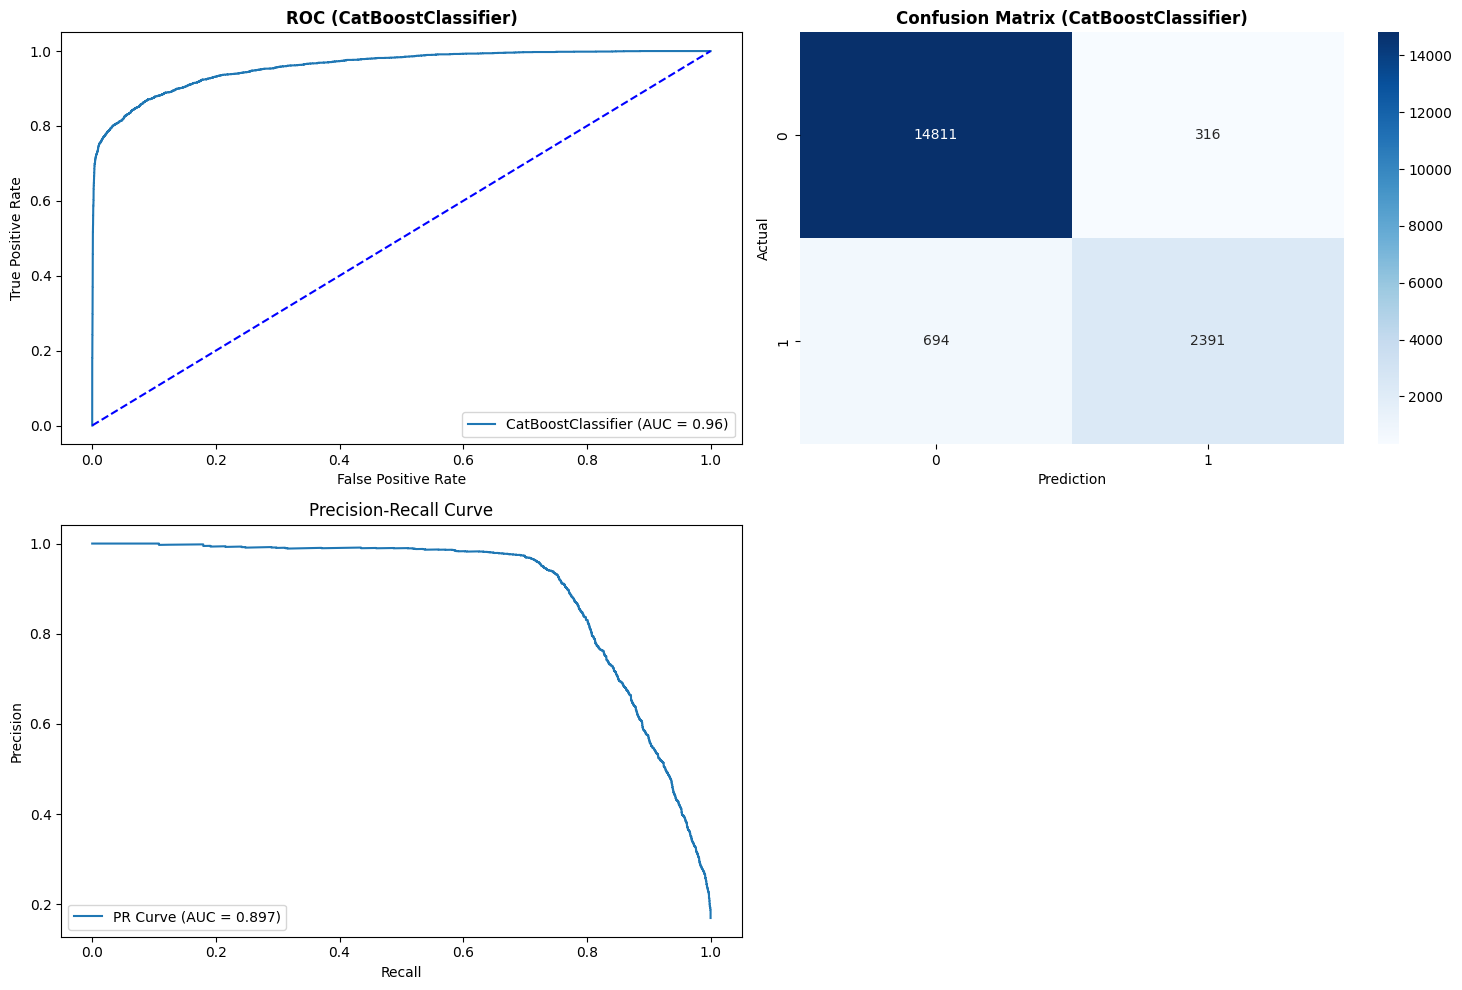

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     15127
           1       0.88      0.78      0.83      3085

    accuracy                           0.94     18212
   macro avg       0.92      0.88      0.90     18212
weighted avg       0.94      0.94      0.94     18212



In [78]:
evaluate_model(model = final_model_cat, X_train=df_train_new_prepared, X_val=X_val_prepared,
               y_train=df_train_label_new, y_val=y_val, figsize=(15, 10))

## XGBClassifier

In [79]:
def objective_xgb(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 500, 1500),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "min_child_weight": trial.suggest_float("min_child_weight", 1, 10),
        "gamma": trial.suggest_float("gamma", 0, 10),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-8, 10.0, log=True),
        "reg_lambda": trial.suggest_float("reg_lambda", 1e-8, 10.0, log=True),
        "scale_pos_weight": trial.suggest_float("scale_pos_weight", 1.0, 10.0),
        "eval_metric": "auc",
        "random_state": seed,
        "n_jobs": -1
    }

    model = XGBClassifier(**params)

    auc_scores = cross_val_score(model, df_train_new_prepared, df_train_label_new,
                                 cv=kfold, scoring="roc_auc")
    return auc_scores.mean()
    
study_xgb = optuna.create_study(direction="maximize")
study_xgb.optimize(objective_xgb, n_trials=100, show_progress_bar=True, n_jobs=-1)

  0%|          | 0/100 [00:00<?, ?it/s]

In [80]:
study_xgb.best_value

0.9575841640023075

In [81]:
study_xgb.best_params

{'n_estimators': 887,
 'learning_rate': 0.039144841886573016,
 'max_depth': 6,
 'min_child_weight': 1.4186515558082802,
 'gamma': 0.1395010096190693,
 'subsample': 0.9147980923517691,
 'colsample_bytree': 0.5904934712097667,
 'reg_alpha': 6.624553543547731e-08,
 'reg_lambda': 2.871151877300295e-05,
 'scale_pos_weight': 1.2400136919916709}

In [82]:
final_model_xgb = XGBClassifier(**study_xgb.best_params, random_state=seed,eval_metric="logloss")
final_model_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5904934712097667, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, feature_weights=None,
              gamma=0.1395010096190693, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.039144841886573016,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1.4186515558082802, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=887,
              n_jobs=None, num_parallel_tree=None, ...)

Evaluating XGBClassifier...


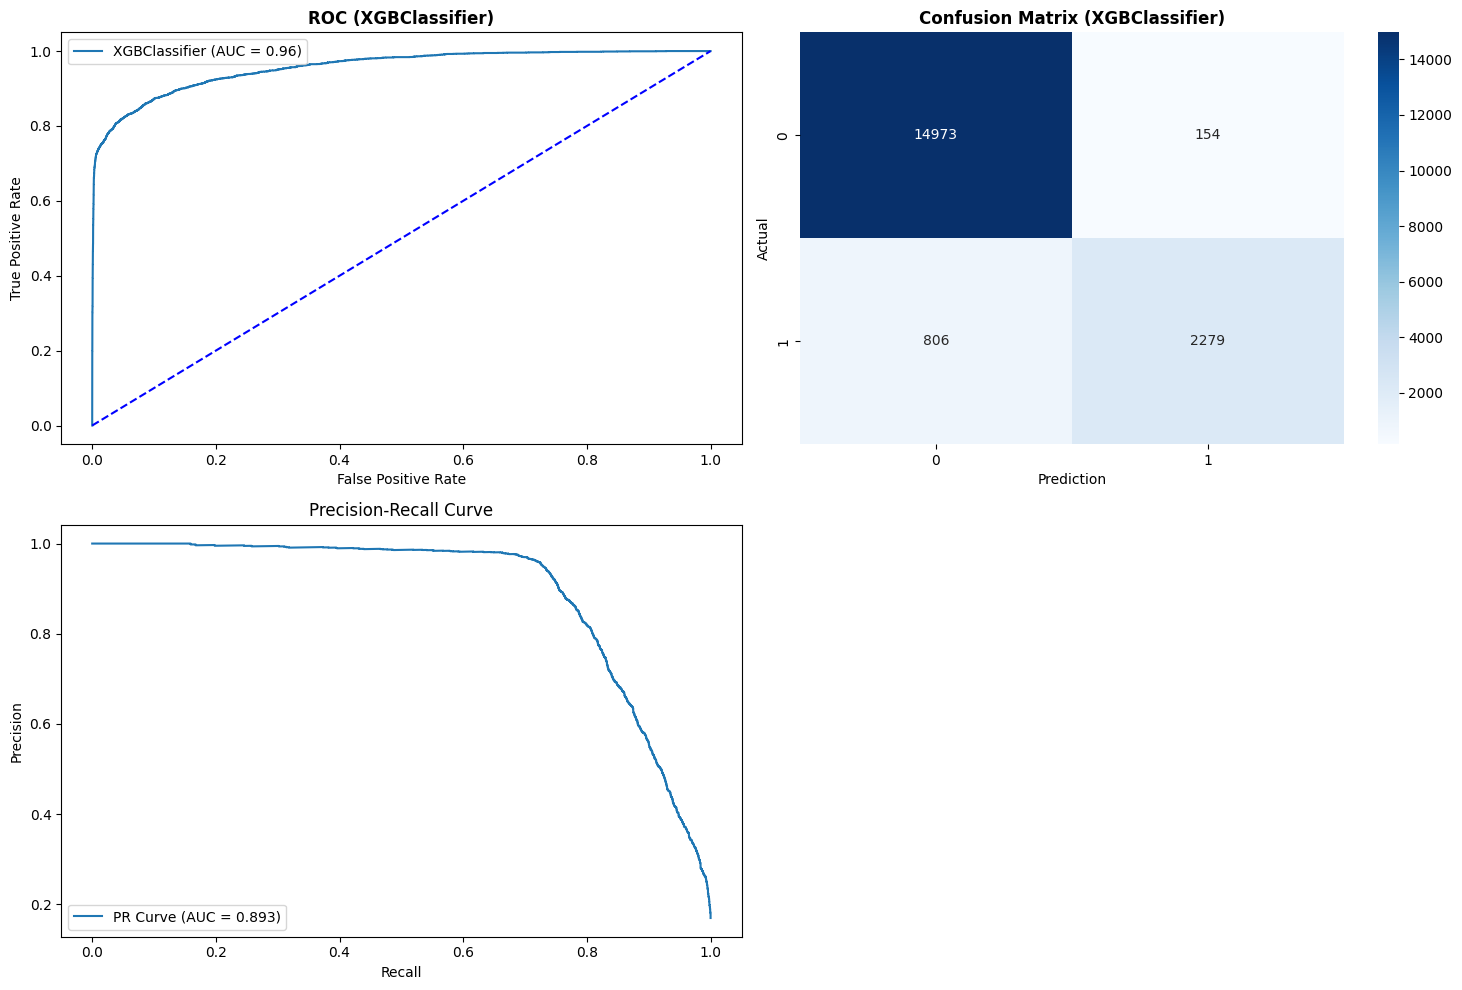

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     15127
           1       0.94      0.74      0.83      3085

    accuracy                           0.95     18212
   macro avg       0.94      0.86      0.90     18212
weighted avg       0.95      0.95      0.94     18212



In [83]:
evaluate_model(model = final_model_xgb, X_train=df_train_new_prepared, X_val=X_val_prepared,
               y_train=df_train_label_new, y_val=y_val, figsize=(15, 10))

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Prepare Final Submission File</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Prepare Final Submission File
    </h1>
</div>


In [84]:
df_test_prepared = preprocessor.transform(processed_test_df)

In [85]:
# Generate predicted probabilities for the test set
y_pred_test_prob_cat = np.round(final_model_cat.predict_proba(df_test_prepared), decimals = 2)
loan_status_cat = y_pred_test_prob_cat[:, 1]

y_pred_test_prob_xgb = np.round(final_model_xgb.predict_proba(df_test_prepared), decimals = 2)
loan_status_xgb = y_pred_test_prob_xgb[:, 1]

loan_status = (loan_status_cat + loan_status_xgb) / 2

# Prepare submission file
submission = pd.DataFrame({
    "id": list_test_id,
    "loan_status": loan_status
})

# Display the first 10 rows of the submission file
print(submission.head(10))

      id  loan_status
0  58645        1.000
1  58646        0.060
2  58647        0.655
3  58648        0.095
4  58649        0.160
5  58650        0.985
6  58651        0.000
7  58652        0.055
8  58653        0.310
9  58654        0.030


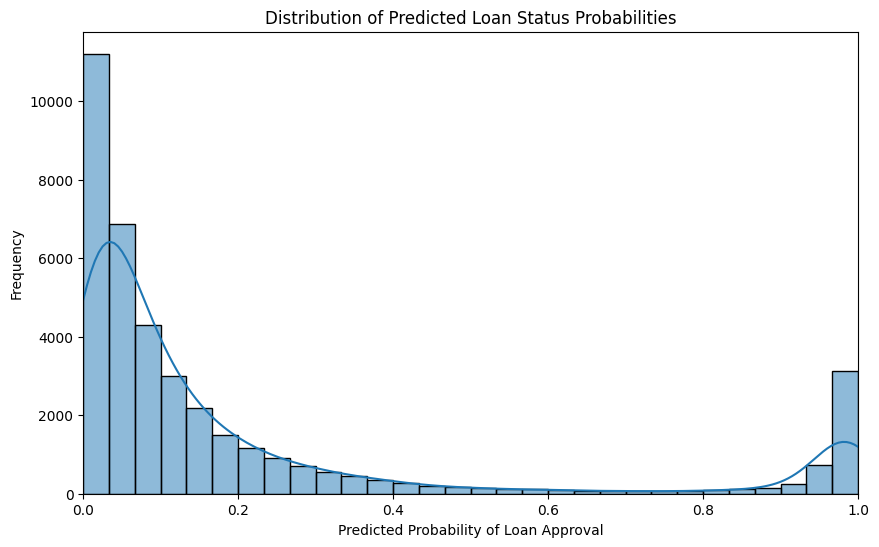

In [86]:
# Plot distribution of predicted probabilities
plt.figure(figsize=(10, 6))
sns.histplot(loan_status, bins=30, kde=True)
plt.title("Distribution of Predicted Loan Status Probabilities")
plt.xlabel("Predicted Probability of Loan Approval")
plt.ylabel("Frequency")
plt.xlim(0, 1)  # Limit x-axis to [0, 1]
plt.show()

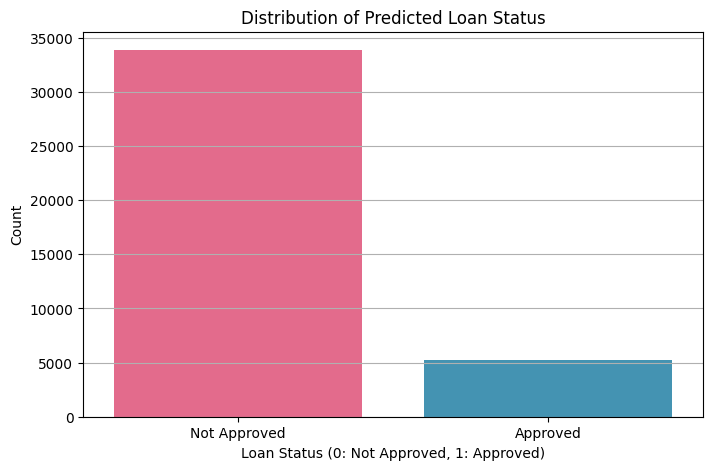

In [87]:
# Convert probabilities to binary predictions using a threshold (e.g., 0.5)
binary_predictions = (loan_status > 0.5).astype(int)

# Plot distribution of binary predictions
plt.figure(figsize=(8, 5))
sns.countplot(x=binary_predictions.flatten(), palette= color(n_colors=2))
plt.title("Distribution of Predicted Loan Status")
plt.xlabel("Loan Status (0: Not Approved, 1: Approved)")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["Not Approved", "Approved"])
plt.grid(axis="y")
plt.show()

In [88]:
# Check for duplicates and validate submission structure
duplicates = submission.duplicated().sum()
num_rows, num_cols = submission.shape

# Display the status
print(f"Number of duplicate rows in submission: {duplicates}")
print(f"Number of rows: {num_rows}, Number of columns: {num_cols}")

# Verify conditions and save if valid
if duplicates == 0 and num_rows == 39098 and num_cols == 2:
    try:
        submission.to_csv("submission.csv", index=False)
        print("Submission file submission.csv created successfully.")
    except Exception as e:
        print(f"An error occurred while saving the submission: {e}")
else:
    print("Submission failed the validation checks.")

Number of duplicate rows in submission: 0
Number of rows: 39098, Number of columns: 2
Submission file submission.csv created successfully.


PermutationExplainer explainer: 301it [00:25,  8.55it/s]


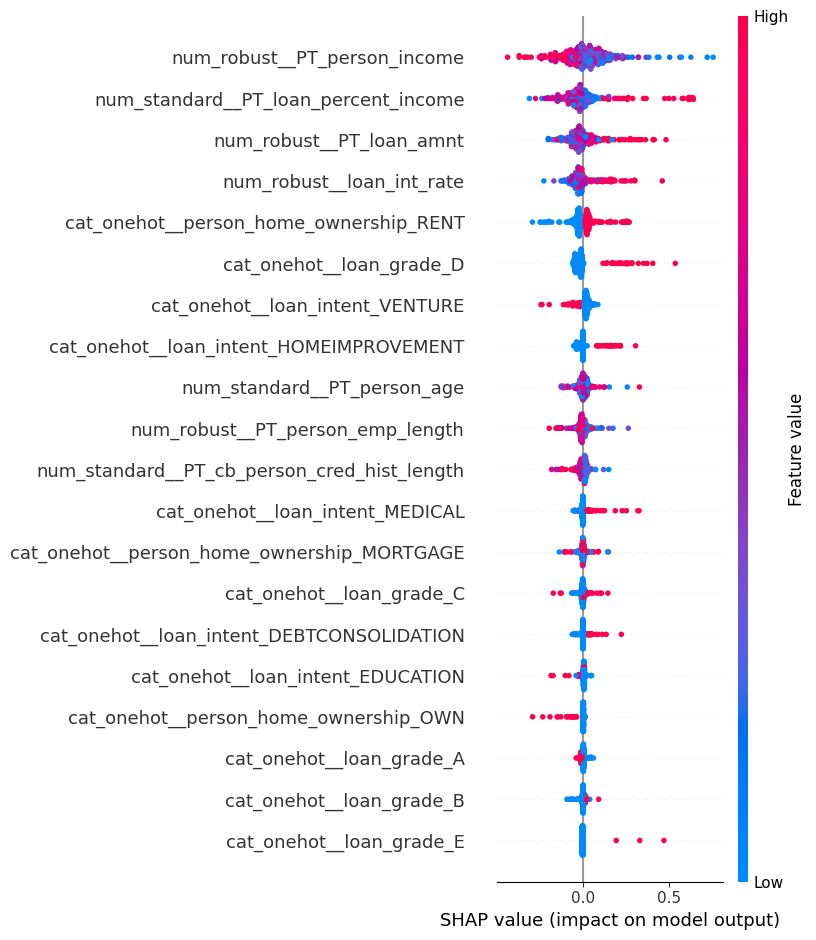

In [89]:
shap_plot(model=final_model_cat, X_test=df_test_prepared[:300], list_feature=list_feature_prepared)

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        🙏 Thanks for Reading! 🚀
    </h1>
    <p style="color: #ffffff; font-size: 18px; text-align: center;">
        Happy Coding! 🙌😊
    </p>
</div>
